<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-(Module-5)-Project:-Credit-Card-Default" data-toc-modified-id="Classification-(Module-5)-Project:-Credit-Card-Default-1">Classification (Module 5) Project: Credit Card Default</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2">Dataset</a></span><ul class="toc-item"><li><span><a href="#text-here" data-toc-modified-id="text-here-2.1">text here</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Initial-observations-based-on-the-above-report-and-tables:" data-toc-modified-id="Initial-observations-based-on-the-above-report-and-tables:-2.1.0.1">Initial observations based on the above report and tables:</a></span></li><li><span><a href="#Based-on-the-above-plots:" data-toc-modified-id="Based-on-the-above-plots:-2.1.0.2">Based on the above plots:</a></span></li><li><span><a href="#Based-on-the-above-matrix:" data-toc-modified-id="Based-on-the-above-matrix:-2.1.0.3">Based on the above matrix:</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-3">Models</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Logistic-Regression.-In-this-section,-we-will-do-the-following:" data-toc-modified-id="Logistic-Regression.-In-this-section,-we-will-do-the-following:-3.0.0.1">Logistic Regression. In this section, we will do the following:</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.2">Findings</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.3">Findings</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.4">Findings</a></span></li><li><span><a href="#Support-Vector-Classification.-In-this-section,-we-will:" data-toc-modified-id="Support-Vector-Classification.-In-this-section,-we-will:-3.0.0.5">Support Vector Classification. In this section, we will:</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.6">Findings</a></span></li><li><span><a href="#Principal-Component-Analysis.-In-this-section,-we-will:" data-toc-modified-id="Principal-Component-Analysis.-In-this-section,-we-will:-3.0.0.7">Principal Component Analysis. In this section, we will:</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.8">Findings</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.9">Findings</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.10">Findings</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.11">Findings</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.0.0.12">Findings</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.0.0.13">Random Forest</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.0.0.14">Conclusion</a></span></li></ul></li></ul></li></ul></li></ul></div>

###### Libraries and Modules

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pickle

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)
import numpy as np
import pandas_profiling

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("GnBu_d")

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, f1_score,precision_recall_fscore_support
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel

import itertools

from statistics import mode
from scipy import stats


import functions as func
%reload_ext autoreload
%autoreload 2

# Classification (Module 5) Project: Credit Card Default

# Dataset

## text here

In [3]:
pwd!

'/Users/valmadrid/DataScienceBootcamp/Projects/Mod5/Credit-Card-Default'

In [4]:
df = pd.read_excel("default of credit card clients.xls", skiprows = 1)
df.head(10)

WARNING *** file size (5539329) not 512 + multiple of sector size (512)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0  1   20000      2    2          1         24   2      2     -1     -1       
1  2   120000     2    2          2         26  -1      2      0      0       
2  3   90000      2    2          2         34   0      0      0      0       
3  4   50000      2    2          1         37   0      0      0      0       
4  5   50000      1    2          1         57  -1      0     -1      0       
5  6   50000      1    1          2         37   0      0      0      0       
6  7   500000     1    1          2         29   0      0      0      0       
7  8   100000     2    2          2         23   0     -1     -1      0       
8  9   140000     2    3          1         28   0      0      2      0       
9  10  20000      1    3          2         35  -2     -2     -2     -2       

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0 -2     -2      3913       3102       689        0          0           
1  0      2      2682       1725       2682       3272       3455        
2  0      0      29239      14027      13559      14331      14948       
3  0      0      46990      48233      49291      28314      28959       
4  0      0      8617       5670       35835      20940      19146       
5  0      0      64400      57069      57608      19394      19619       
6  0      0      367965     412023     445007     542653     483003      
7  0     -1      11876      380        601        221       -159         
8  0      0      11285      14096      12108      12211      11793       
9 -1     -1      0          0          0          0          13007       

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  0          0         689       0         0         0         0          
1  3261       0         1000      1000      1000      0         2000       
2  15549      1518      1500      1000      1000      1000      5000       
3  29547      2000      2019      1200      1100      1069      1000       
4  19131      2000      36681     10000     9000      689       679        
5  20024      2500      1815      657       1000      1000      800        
6  473944     55000     40000     38000     20239     13750     13770      
7  567        380       601       0         581       1687      1542       
8  3719       3329      0         432       1000      1000      1000       
9  13912      0         0         0         13007     1122      0          

   default payment next month  
0  1                           
1  1                           
2  0                           
3  0                           
4  0                           
5  0                           
6  0                           
7  0                           
8  0                           
9  0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
# Rename column headers to indicate months
df.rename(mapper = {"MARRIAGE" : "marital_status", "PAY_0" : "pay_sep", "PAY_2" : "pay_aug", "PAY_3" : "pay_jul", "PAY_4" : "pay_jun",
                    "PAY_5" : "pay_may", "PAY_6" : "pay_apr", "BILL_AMT1" : "bill_amt_sep", "BILL_AMT2" : "bill_amt_aug", "BILL_AMT3" : "bill_amt_jul",
                    "BILL_AMT4" : "bill_amt_jun", "BILL_AMT5" : "bill_amt_may", "BILL_AMT6" : "bill_amt_apr", "PAY_AMT1" : "pay_amt_sep",
                    "PAY_AMT2" : "pay_amt_aug", "PAY_AMT3" : "pay_amt_jul", "PAY_AMT4" : "pay_amt_jun", "PAY_AMT5" : "pay_amt_may",
                    "PAY_AMT6" : "pay_amt_apr", "default payment next month":"default_payment_next_month"}, axis = 1, inplace = True)
df.columns = df.columns.map(lambda x: x.lower())

# Descriptive statistics
df.describe(include = "all").T

count           mean            std       min  \
id                          30000.0  15000.500000   8660.398374    1.0        
limit_bal                   30000.0  167484.322667  129747.661567  10000.0    
sex                         30000.0  1.603733       0.489129       1.0        
education                   30000.0  1.853133       0.790349       0.0        
marital_status              30000.0  1.551867       0.521970       0.0        
age                         30000.0  35.485500      9.217904       21.0       
pay_sep                     30000.0 -0.016700       1.123802      -2.0        
pay_aug                     30000.0 -0.133767       1.197186      -2.0        
pay_jul                     30000.0 -0.166200       1.196868      -2.0        
pay_jun                     30000.0 -0.220667       1.169139      -2.0        
pay_may                     30000.0 -0.266200       1.133187      -2.0        
pay_apr                     30000.0 -0.291100       1.149988      -2.0        
bill_amt_sep                30000.0  51223.330900   73635.860576  -165580.0   
bill_amt_aug                30000.0  49179.075167   71173.768783  -69777.0    
bill_amt_jul                30000.0  47013.154800   69349.387427  -157264.0   
bill_amt_jun                30000.0  43262.948967   64332.856134  -170000.0   
bill_amt_may                30000.0  40311.400967   60797.155770  -81334.0    
bill_amt_apr                30000.0  38871.760400   59554.107537  -339603.0   
pay_amt_sep                 30000.0  5663.580500    16563.280354   0.0        
pay_amt_aug                 30000.0  5921.163500    23040.870402   0.0        
pay_amt_jul                 30000.0  5225.681500    17606.961470   0.0        
pay_amt_jun                 30000.0  4826.076867    15666.159744   0.0        
pay_amt_may                 30000.0  4799.387633    15278.305679   0.0        
pay_amt_apr                 30000.0  5215.502567    17777.465775   0.0        
default_payment_next_month  30000.0  0.221200       0.415062       0.0        

                                 25%       50%        75%        max  
id                          7500.75   15000.5   22500.25   30000.0    
limit_bal                   50000.00  140000.0  240000.00  1000000.0  
sex                         1.00      2.0       2.00       2.0        
education                   1.00      2.0       2.00       6.0        
marital_status              1.00      2.0       2.00       3.0        
age                         28.00     34.0      41.00      79.0       
pay_sep                    -1.00      0.0       0.00       8.0        
pay_aug                    -1.00      0.0       0.00       8.0        
pay_jul                    -1.00      0.0       0.00       8.0        
pay_jun                    -1.00      0.0       0.00       8.0        
pay_may                    -1.00      0.0       0.00       8.0        
pay_apr                    -1.00      0.0       0.00       8.0        
bill_amt_sep                3558.75   22381.5   67091.00   964511.0   
bill_amt_aug                2984.75   21200.0   64006.25   983931.0   
bill_amt_jul                2666.25   20088.5   60164.75   1664089.0  
bill_amt_jun                2326.75   19052.0   54506.00   891586.0   
bill_amt_may                1763.00   18104.5   50190.50   927171.0   
bill_amt_apr                1256.00   17071.0   49198.25   961664.0   
pay_amt_sep                 1000.00   2100.0    5006.00    873552.0   
pay_amt_aug                 833.00    2009.0    5000.00    1684259.0  
pay_amt_jul                 390.00    1800.0    4505.00    896040.0   
pay_amt_jun                 296.00    1500.0    4013.25    621000.0   
pay_amt_may                 252.50    1500.0    4031.50    426529.0   
pay_amt_apr                 117.75    1500.0    4000.00    528666.0   
default_payment_next_month  0.00      0.0       0.00       1.0

In [7]:
# Run a profiling for the initial checks
creditcard_report = df.profile_report(title="Credit Card Clients Detailed Profiling Report", correlation_threshold_pearson = 1, sort = "None")
creditcard_report.to_file(output_file="creditcard.html")
creditcard_report

#### Initial observations based on the above report and tables:

- ***id*** There are no duplicate entries
- ***sex*** There are 18112 (60.4%) female clients. 
- ***education*** Categories 0, 5 and 6 comprise 1.1% of the dataset.
- ***marital_status*** Categories 0 and 3 comprises 0.2% of the dataset.
- ***age*** Clients are from aged 21 to 79.
- ***pay_apr to pay_sep*** Column is both categorical and continuous.
- ***bill_amt_apr to bill_amt_sep*** There are negative amounts: overpayment.
- ***default_payment_next_month*** This will be our target variable. There are 23364 '0' values we will then need to employ the Synthetic Minority Oversampling technique.
- ***default_payment_next_month*** Classes are highly imbalance.  Class 1 comprises 22.1% of the dataset.

Feature Engineering:
- Add % of credit limit used by dividing billed amount as of September 2005 (bill_amt_sep) over limit balance (limit_bal). This can tell us how much is unpaid vs the approved credit limit.
- Separate the categorical and continuous values under pay_apr to pay_sep. 
- Use PCA to transform highly correlated columns 'bill_amt_apr' to 'bill_amt_sep' and 'pay_amt_apr' to 'pay_amt_sep'.

In [81]:
ccard = df.copy()

ccard["age_cat"] = ccard["age"].map(lambda x: "20-29" if x < 30 else (
    "30-39" if x < 40 else ("40-49" if x < 50 else ("50-59"
                                                    if x < 60 else "60 up"))))

ccard["edu_cat"] = ccard["education"].map(lambda x: x if x < 5 else 0)

ccard["limit_used_sep"] = ccard["bill_amt_sep"] / ccard["limit_bal"]

pay_cols = [
    col for col in ccard.columns if len(col) == 7 and col.startswith("pay_")
]

for col in pay_cols:
    ccard[col + "_cat"] = ccard[col].map(lambda x: x if x < 1 else 1)

for col in pay_cols:
    ccard[col + "_default"] = ccard[col].map(lambda x: x if x > 0 else 0)

ccard["pay_weighted_ave_6"] = round(ccard["pay_sep_default"] * .5 +
                                      ccard["pay_aug_default"] * .1 +
                                      ccard["pay_jul_default"] * .1 +
                                      ccard["pay_jun_default"] * .1 +
                                      ccard["pay_may_default"] * .1 +
                                      ccard["pay_apr_default"] * .1)

ccard["pay_weighted_ave_3"] = round(ccard["pay_sep_default"] * .5 +
                                      ccard["pay_aug_default"] * .25 +
                                      ccard["pay_jul_default"] * .25)

ccard.head(5)

id  limit_bal  sex  education  marital_status  age  pay_sep  pay_aug  \
0  1   20000      2    2          1               24   2        2         
1  2   120000     2    2          2               26  -1        2         
2  3   90000      2    2          2               34   0        0         
3  4   50000      2    2          1               37   0        0         
4  5   50000      1    2          1               57  -1        0         

   pay_jul  pay_jun  pay_may  pay_apr  bill_amt_sep  bill_amt_aug  \
0 -1       -1       -2       -2        3913          3102           
1  0        0        0        2        2682          1725           
2  0        0        0        0        29239         14027          
3  0        0        0        0        46990         48233          
4 -1        0        0        0        8617          5670           

   bill_amt_jul  bill_amt_jun  bill_amt_may  bill_amt_apr  pay_amt_sep  \
0  689           0             0             0             0             
1  2682          3272          3455          3261          0             
2  13559         14331         14948         15549         1518          
3  49291         28314         28959         29547         2000          
4  35835         20940         19146         19131         2000          

   pay_amt_aug  pay_amt_jul  pay_amt_jun  pay_amt_may  pay_amt_apr  \
0  689          0            0            0            0             
1  1000         1000         1000         0            2000          
2  1500         1000         1000         1000         5000          
3  2019         1200         1100         1069         1000          
4  36681        10000        9000         689          679           

   default_payment_next_month age_cat  edu_cat  limit_used_sep  pay_sep_cat  \
0  1                           20-29   2        0.195650        1             
1  1                           20-29   2        0.022350       -1             
2  0                           30-39   2        0.324878        0             
3  0                           30-39   2        0.939800        0             
4  0                           50-59   2        0.172340       -1             

   pay_aug_cat  pay_jul_cat  pay_jun_cat  pay_may_cat  pay_apr_cat  \
0  1           -1           -1           -2           -2             
1  1            0            0            0            1             
2  0            0            0            0            0             
3  0            0            0            0            0             
4  0           -1            0            0            0             

   pay_sep_default  pay_aug_default  pay_jul_default  pay_jun_default  \
0  2                2                0                0                 
1  0                2                0                0                 
2  0                0                0                0                 
3  0                0                0                0                 
4  0                0                0                0                 

   pay_may_default  pay_apr_default  pay_weighted_ave_6  pay_weighted_ave_3  
0  0                0                1.0                 2.0                 
1  0                2                0.0                 0.0                 
2  0                0                0.0                 0.0                 
3  0                0                0.0                 0.0                 
4  0                0                0.0                 0.0

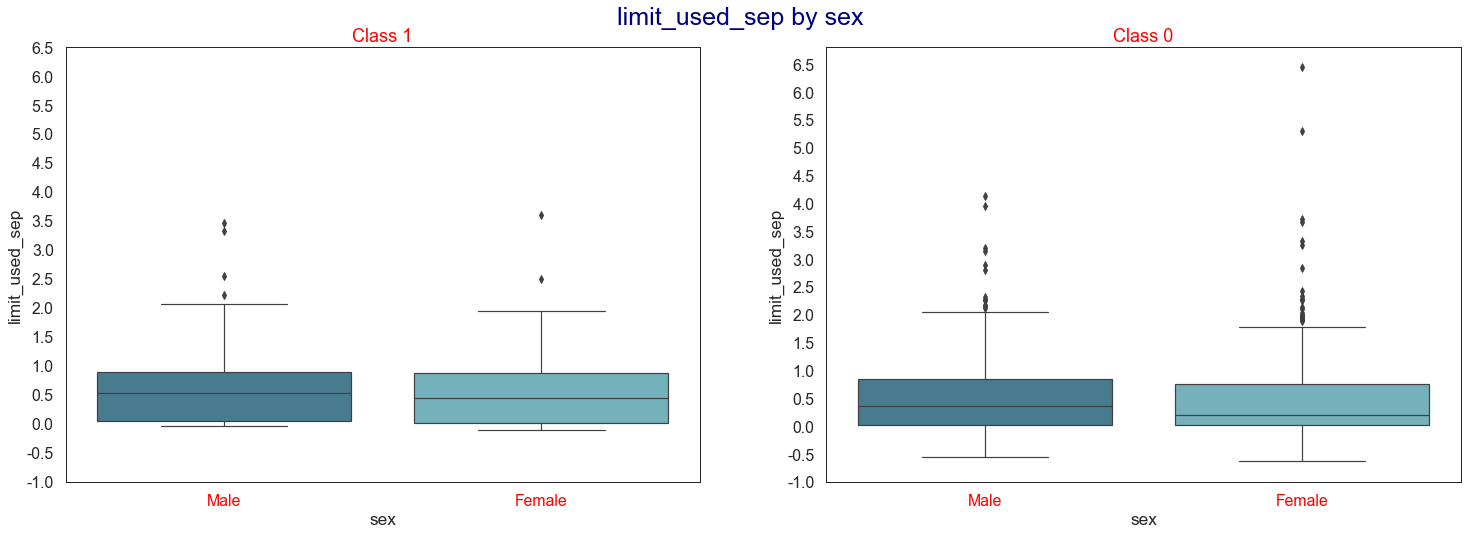

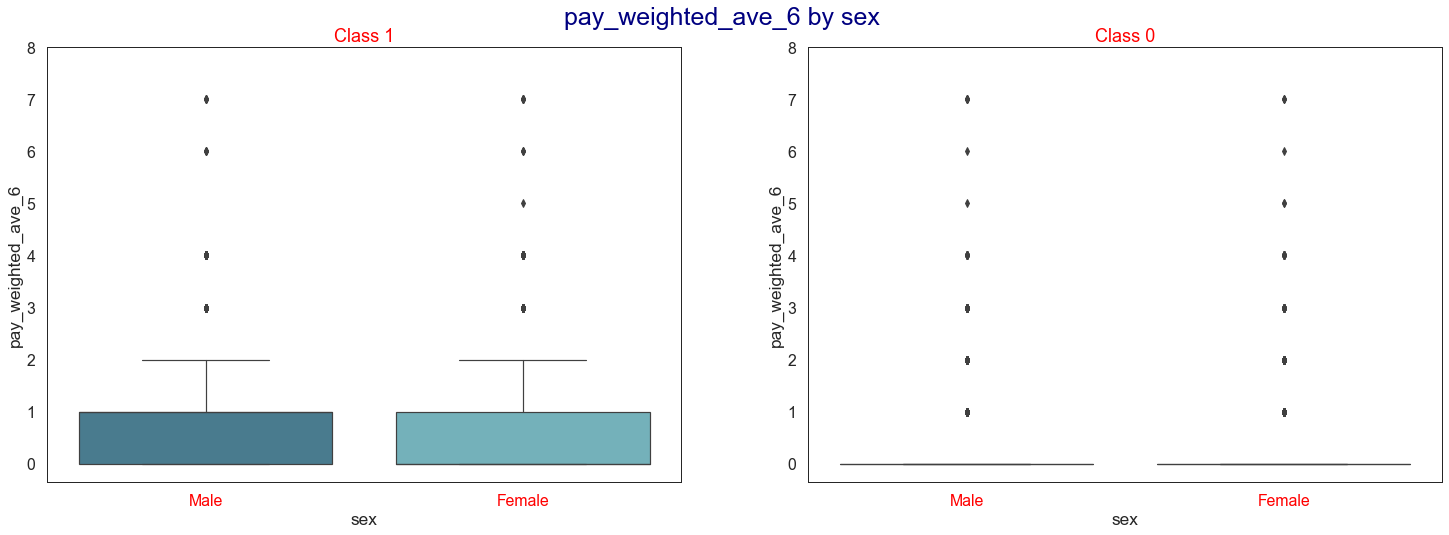

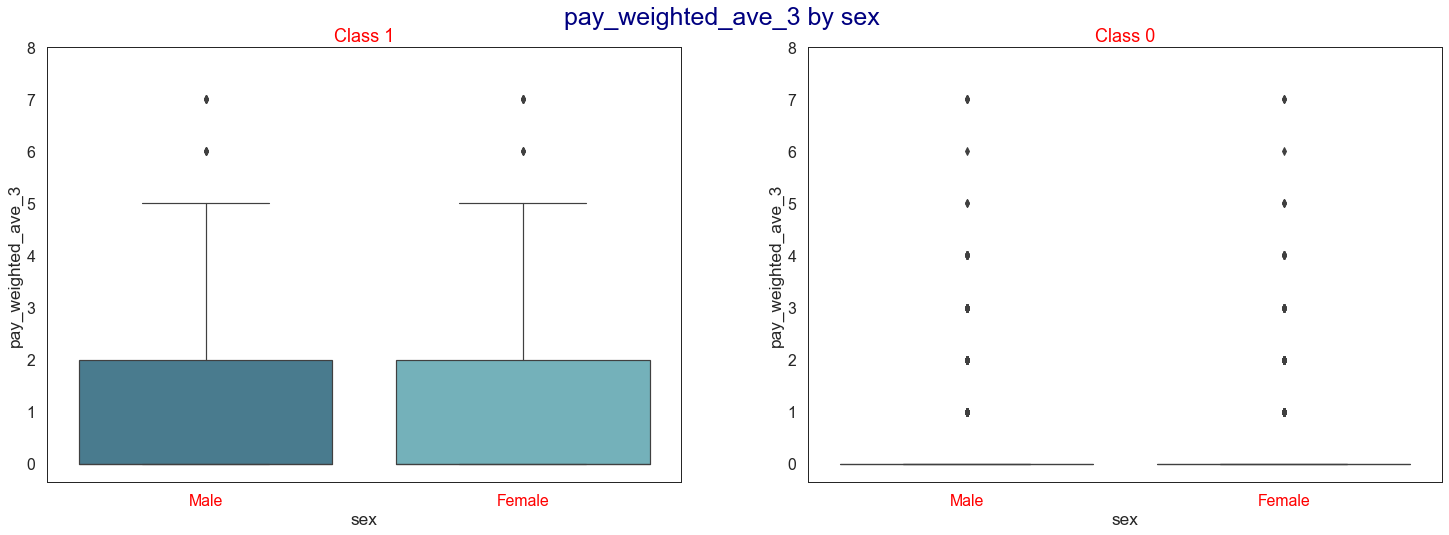

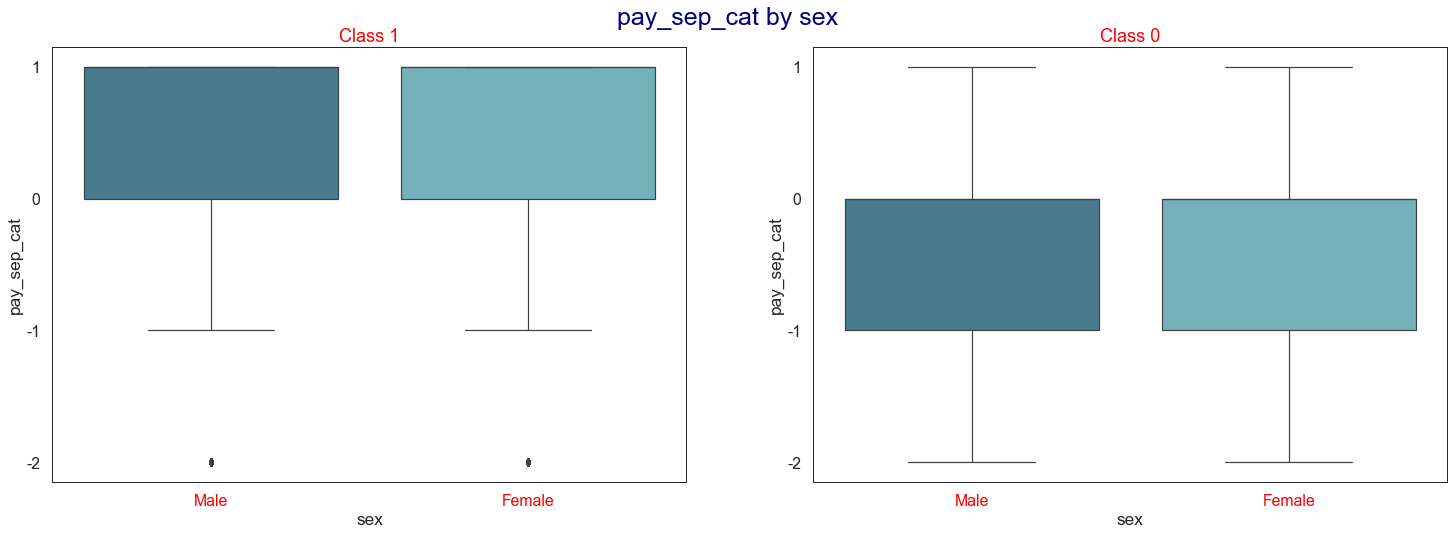

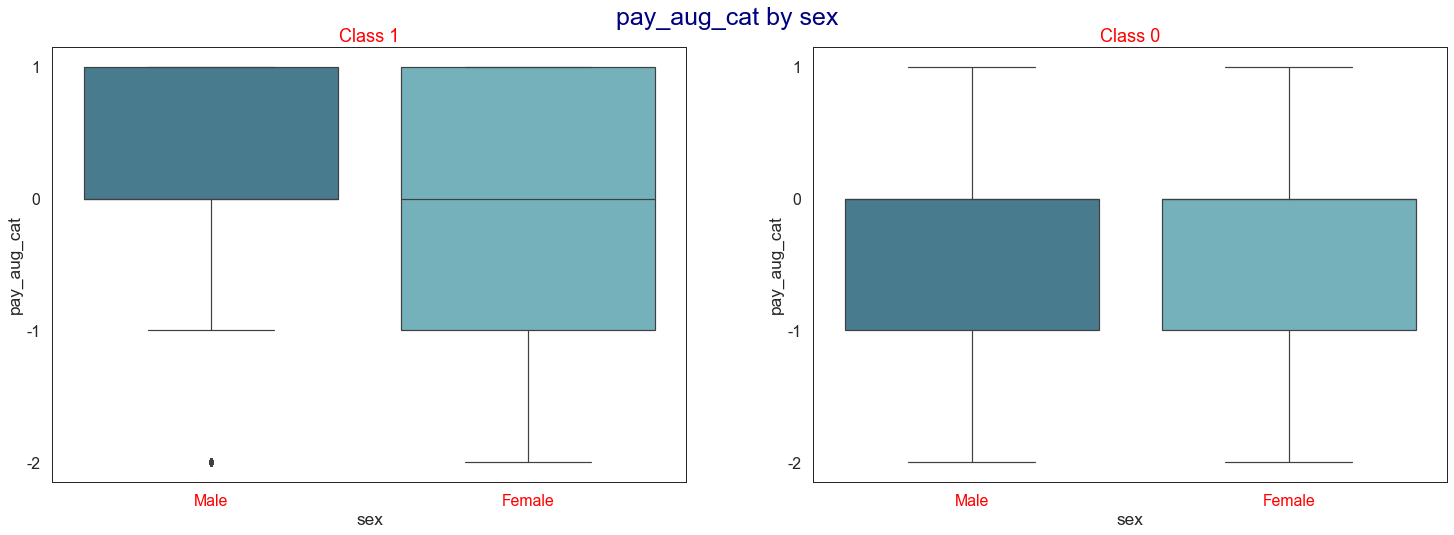

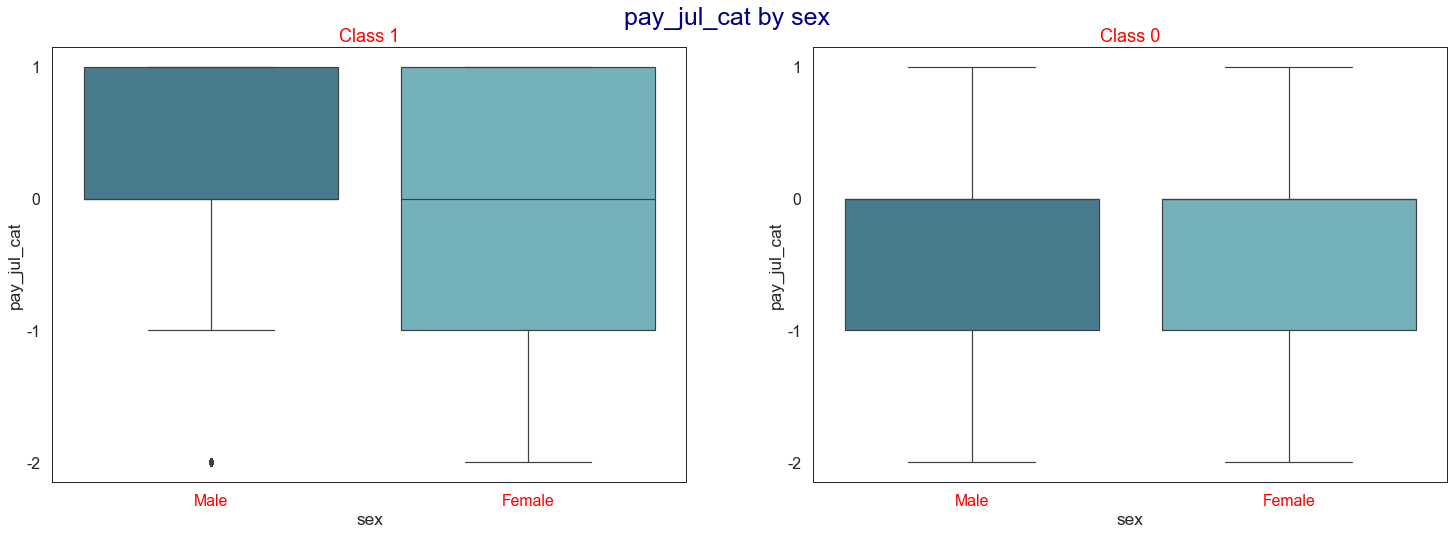

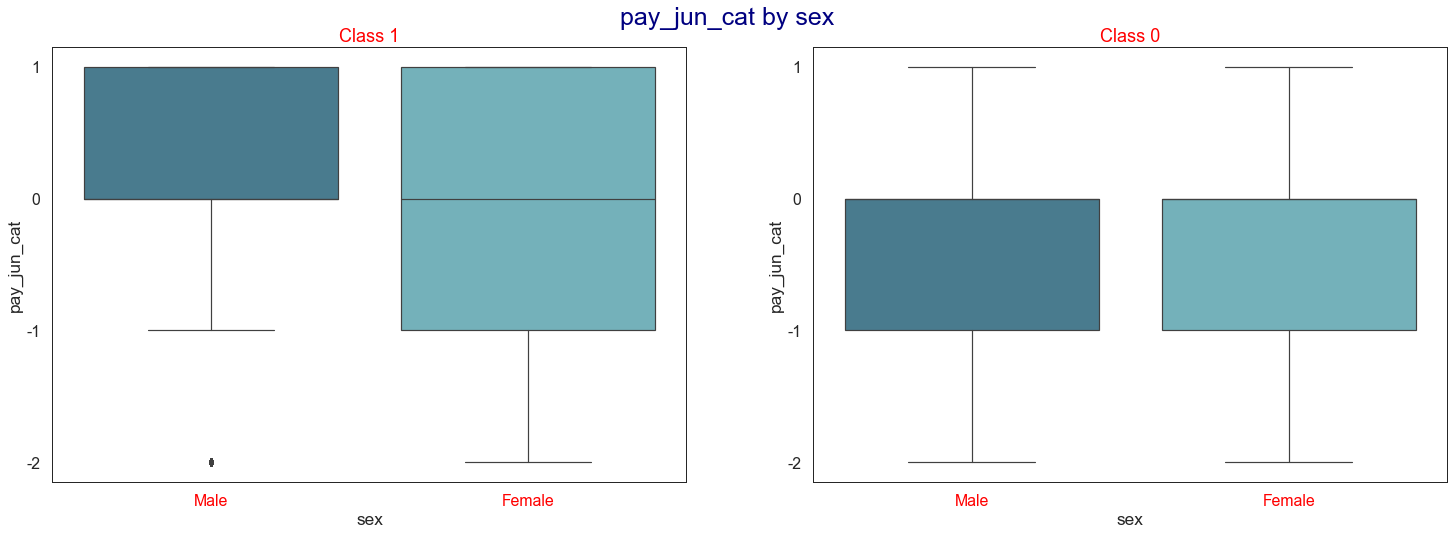

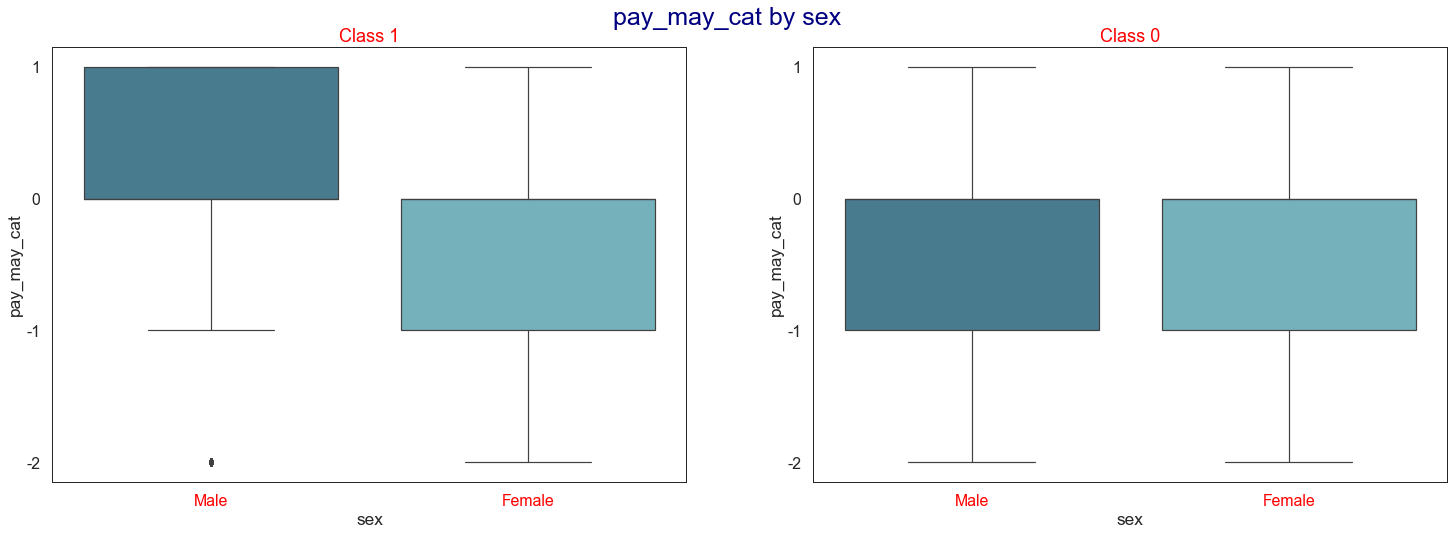

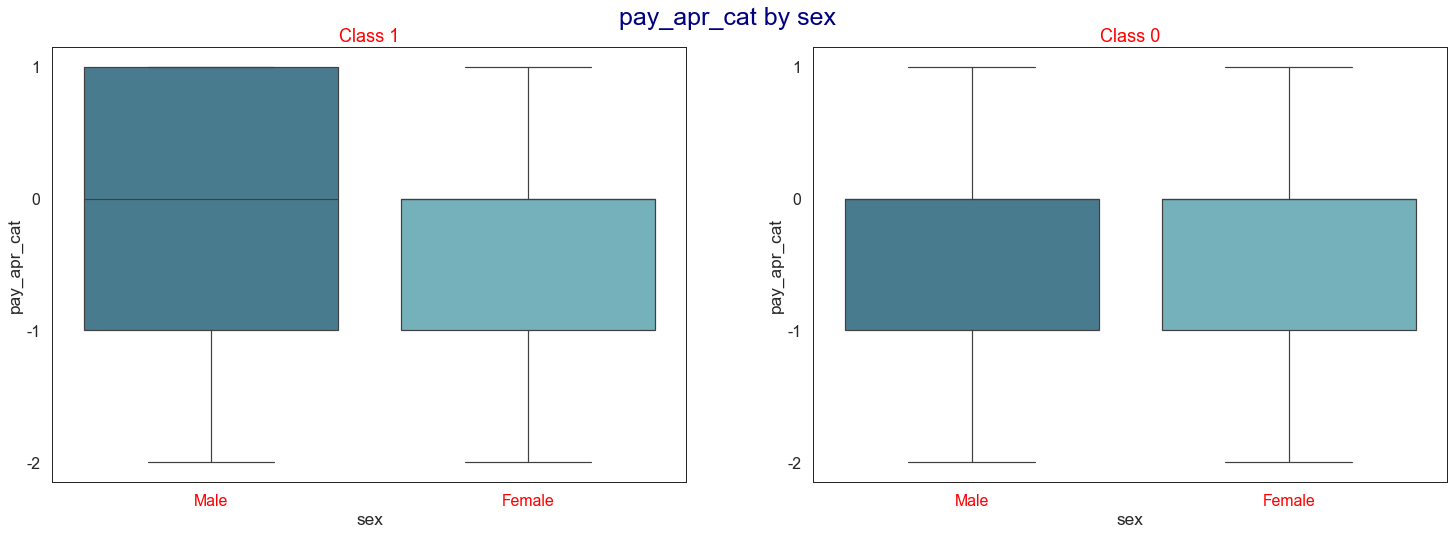

In [75]:
cols = ["limit_used_sep", "pay_weighted_ave_6", "pay_weighted_ave_3","pay_sep_cat", "pay_aug_cat", "pay_jul_cat", "pay_jun_cat", "pay_may_cat", "pay_apr_cat"]

for i, col in enumerate(cols):
    fig = plt.figure(figsize=(25, 8))
    for j, class_ in enumerate([1, 0]):
        ax = fig.add_subplot(1, 2, j + 1)
        sns.boxplot(x="sex",
                    y=col,
                    data=ccard.query("default_payment_next_month == @class_"),
                    palette="GnBu_d",
                    ax=ax)
        if col == "limit_used_sep":
            plt.yticks(np.arange(-1, 7, 0.5),np.arange(-1, 7, 0.5))
        elif col in ["pay_weighted_ave_6", "pay_weighted_ave_3"]:
            plt.yticks(range(0,9), range(0,9))
        else:
            plt.yticks(range(-2,2), range(-2,2))
        plt.xticks(range(0,2), ["Male", "Female"], color="red")
        plt.title("Class {}".format(class_),fontsize=18, color="red")
    fig.suptitle("{} by sex".format(col), fontsize=25, y=0.95, color="navy")
    plt.show();

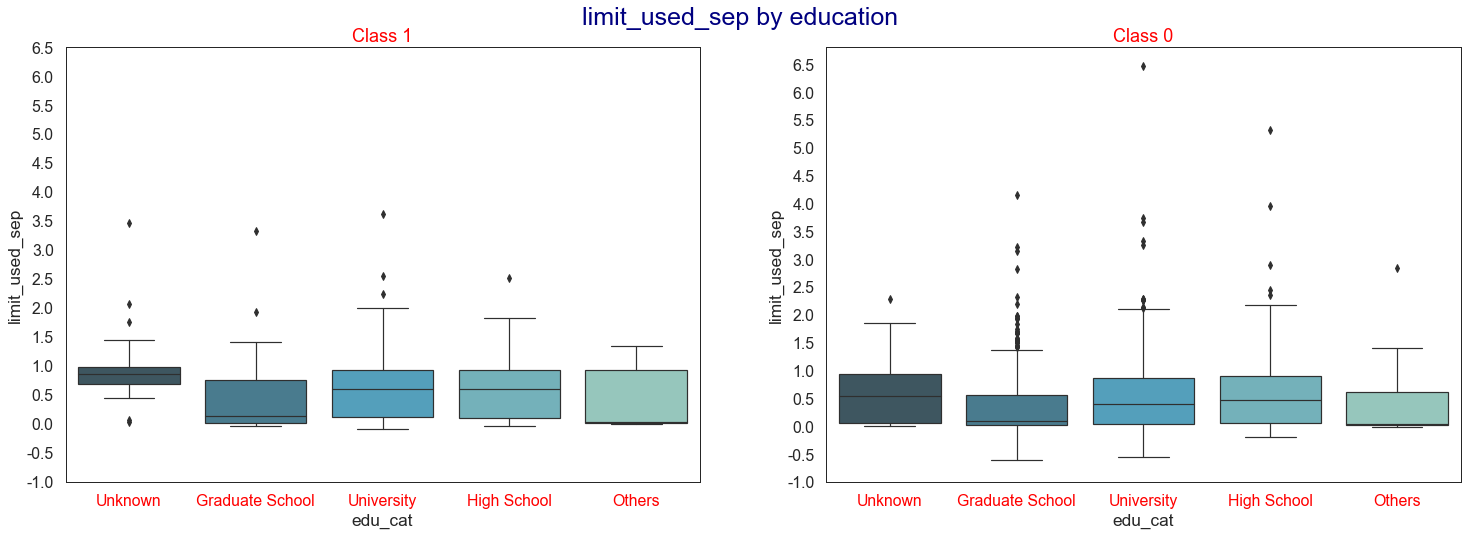

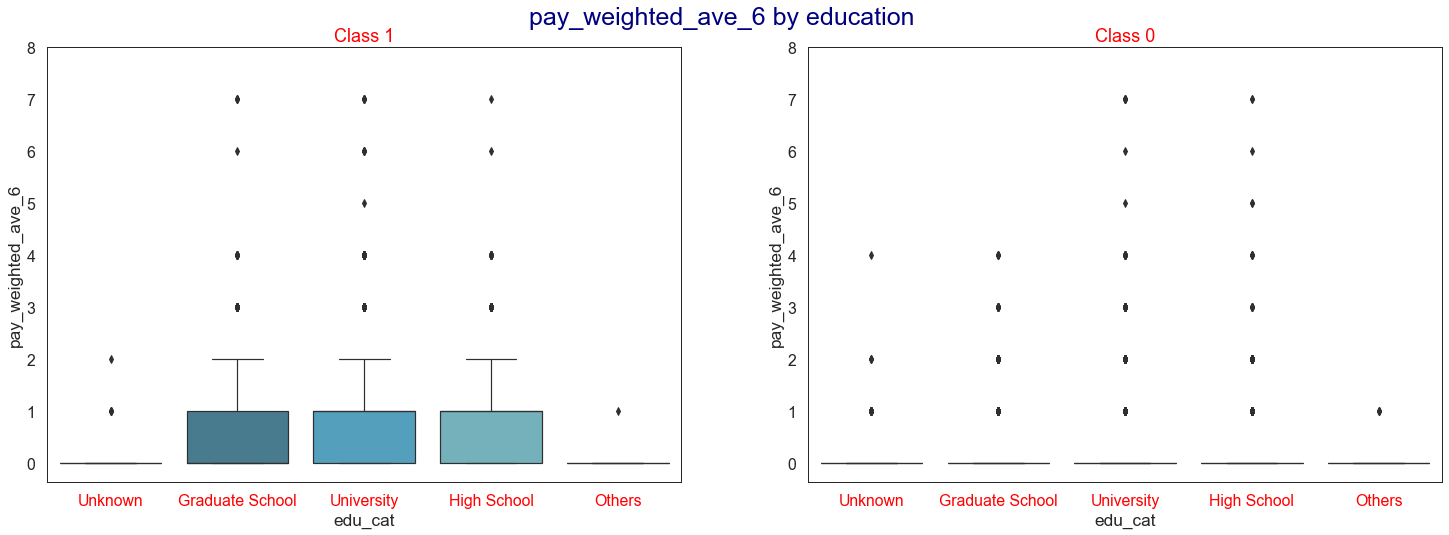

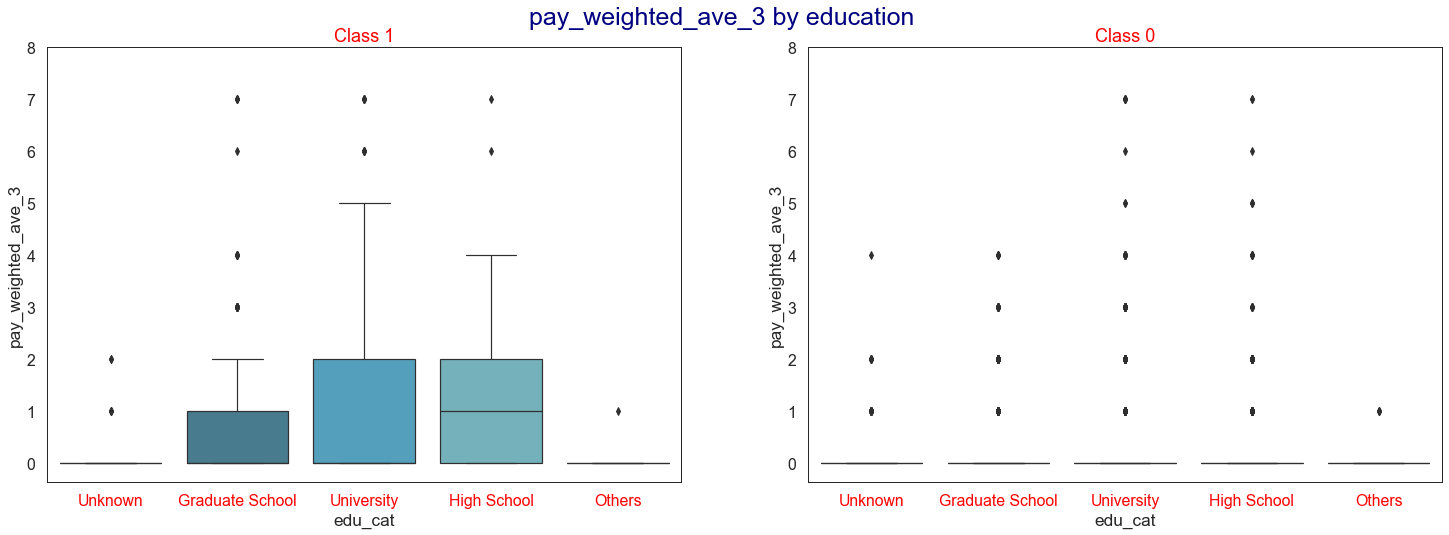

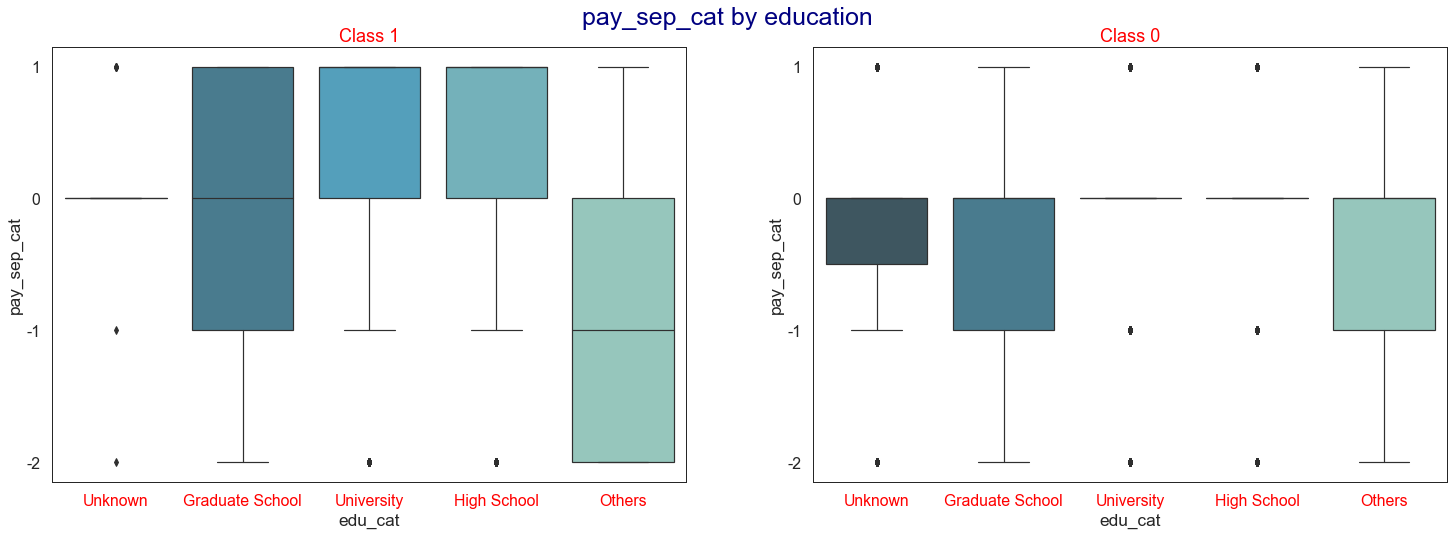

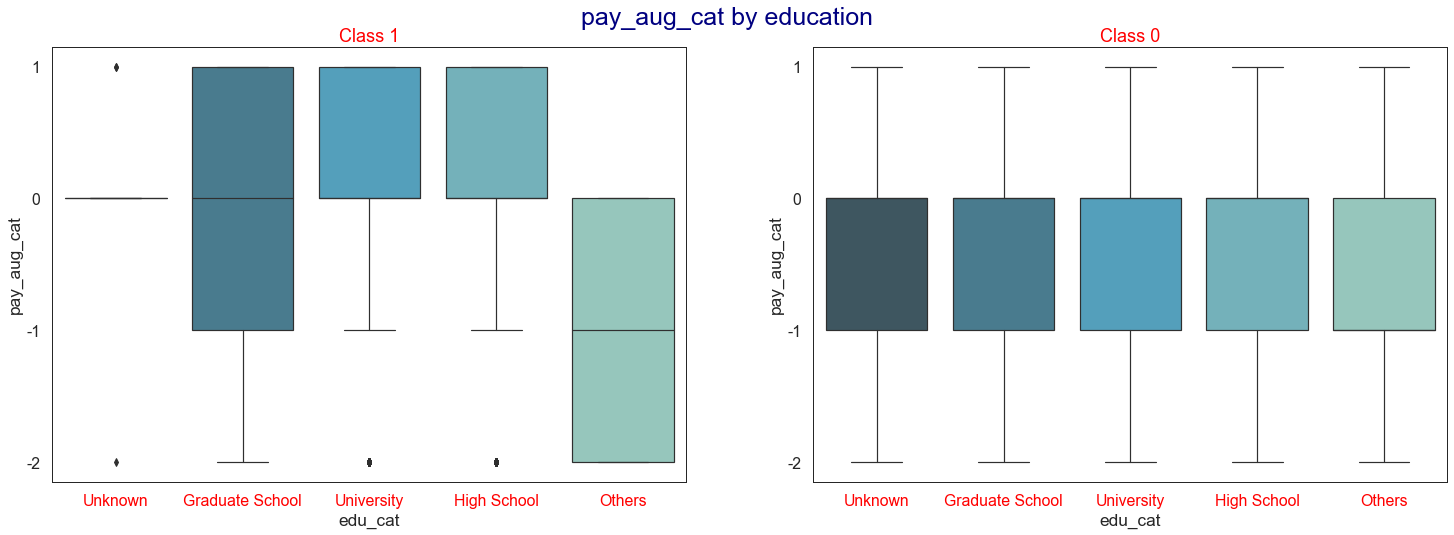

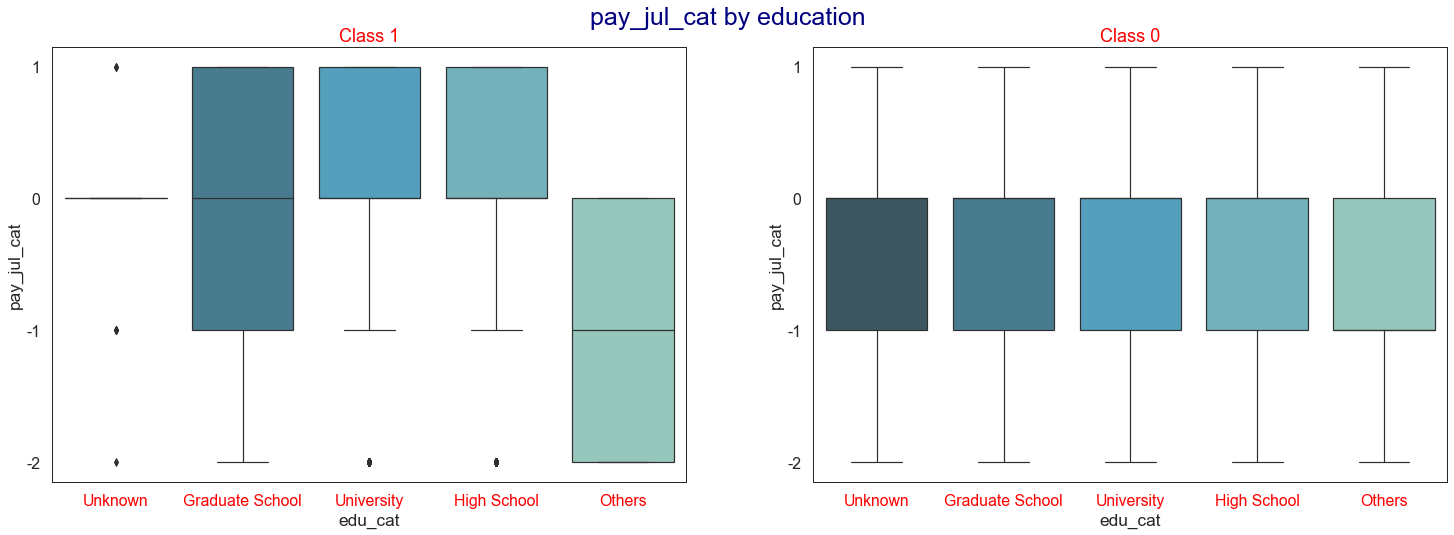

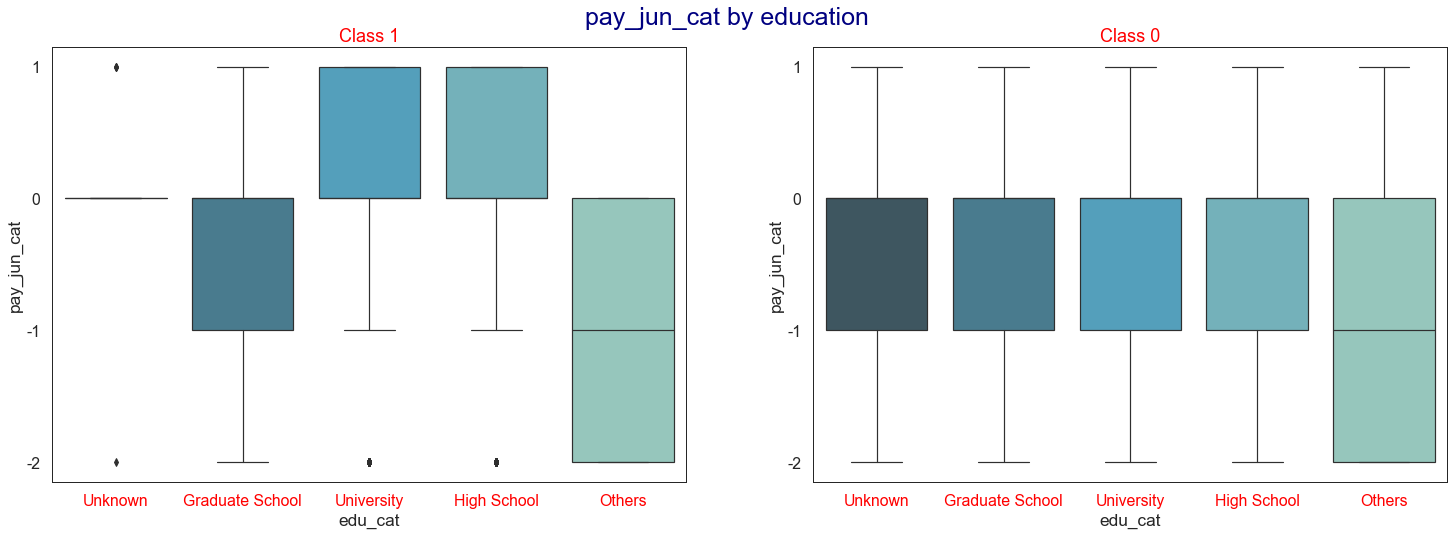

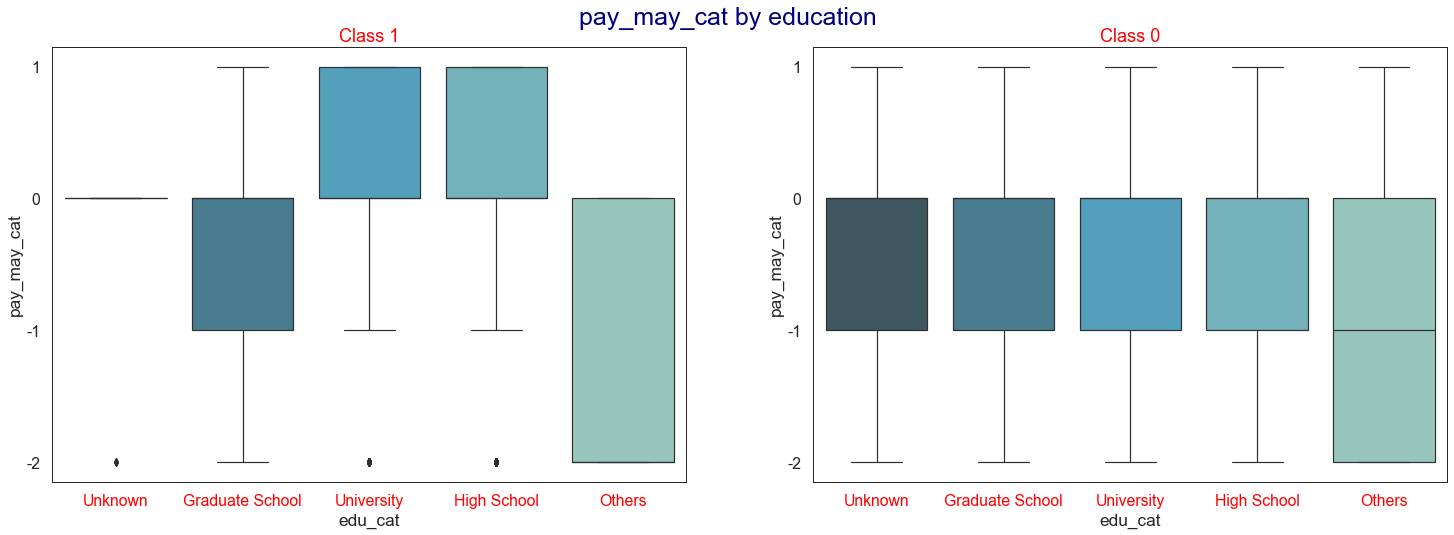

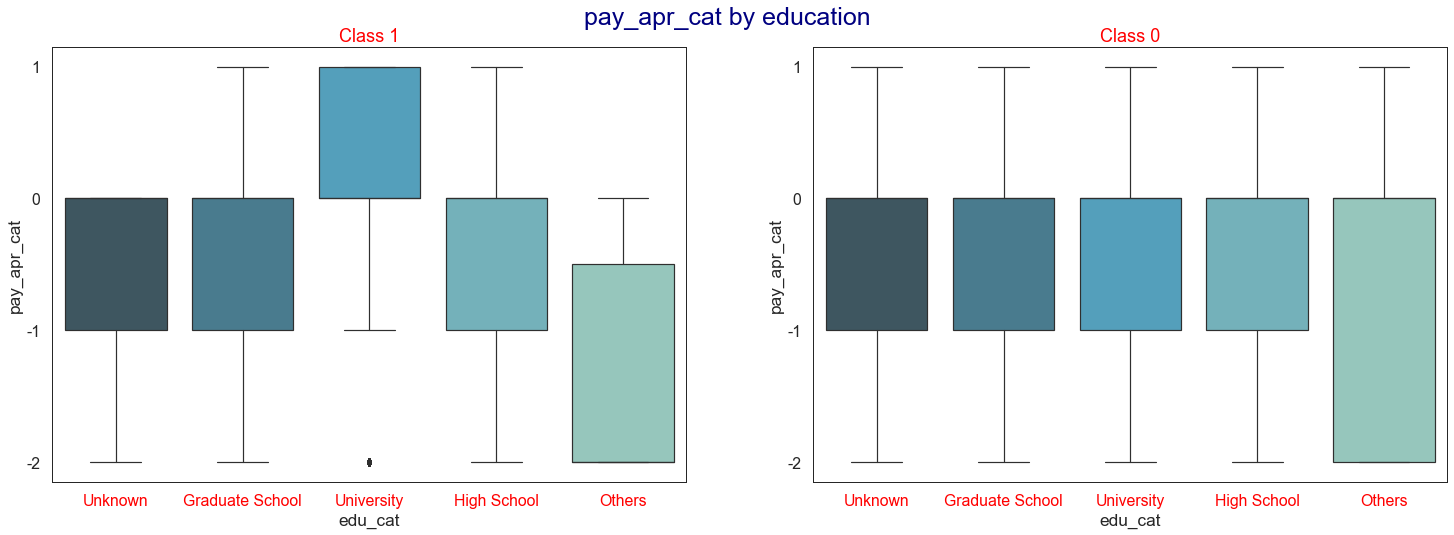

In [84]:
cols = ["limit_used_sep", "pay_weighted_ave_6", "pay_weighted_ave_3","pay_sep_cat", "pay_aug_cat", "pay_jul_cat", "pay_jun_cat", "pay_may_cat", "pay_apr_cat"]

for i, col in enumerate(cols):
    fig = plt.figure(figsize=(25, 8))
    for j, class_ in enumerate([1, 0]):
        ax = fig.add_subplot(1, 2, j + 1)
        sns.boxplot(x="edu_cat",
                    y=col,
                    data=ccard.query("default_payment_next_month == @class_"),
                    palette="GnBu_d",
                    ax=ax)
        if col == "limit_used_sep":
            plt.yticks(np.arange(-1, 7, 0.5),np.arange(-1, 7, 0.5))
        elif col in ["pay_weighted_ave_6", "pay_weighted_ave_3"]:
            plt.yticks(range(0,9), range(0,9))
        else:
            plt.yticks(range(-2,2), range(-2,2))
        plt.xticks(range(0,5), ["Unknown", "Graduate School","University", "High School","Others"], color="red")
        plt.title("Class {}".format(class_),fontsize=18, color="red")
    fig.suptitle("{} by education".format(col), fontsize=25, y=0.95, color="navy")
    plt.show();

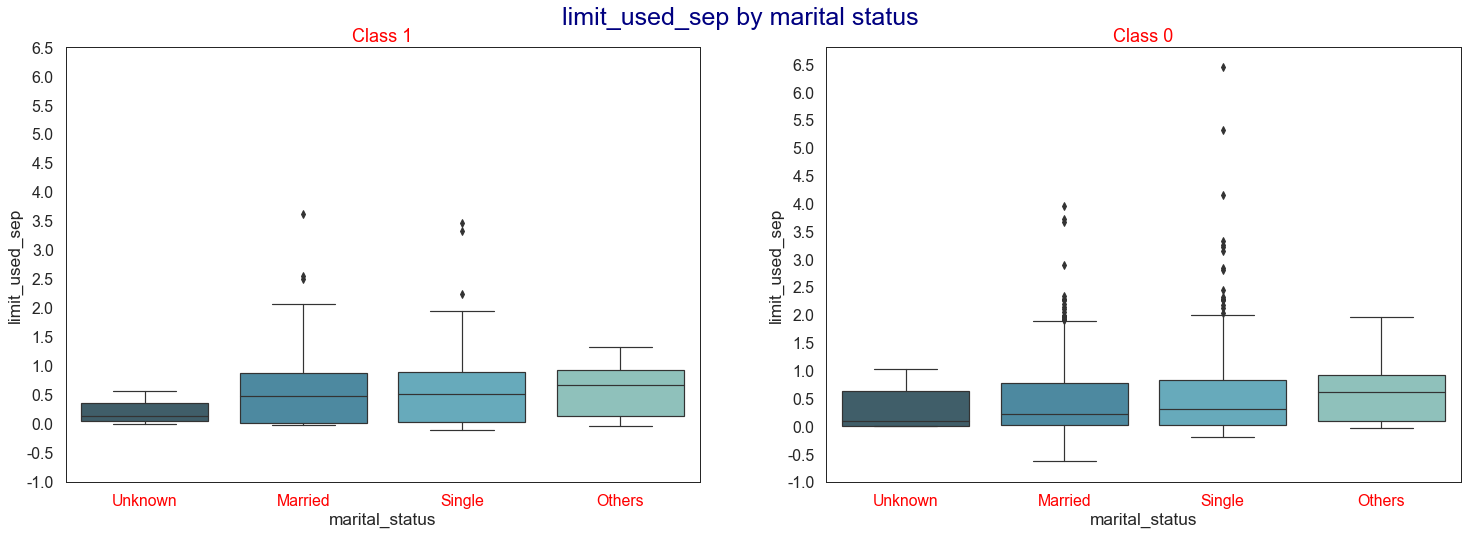

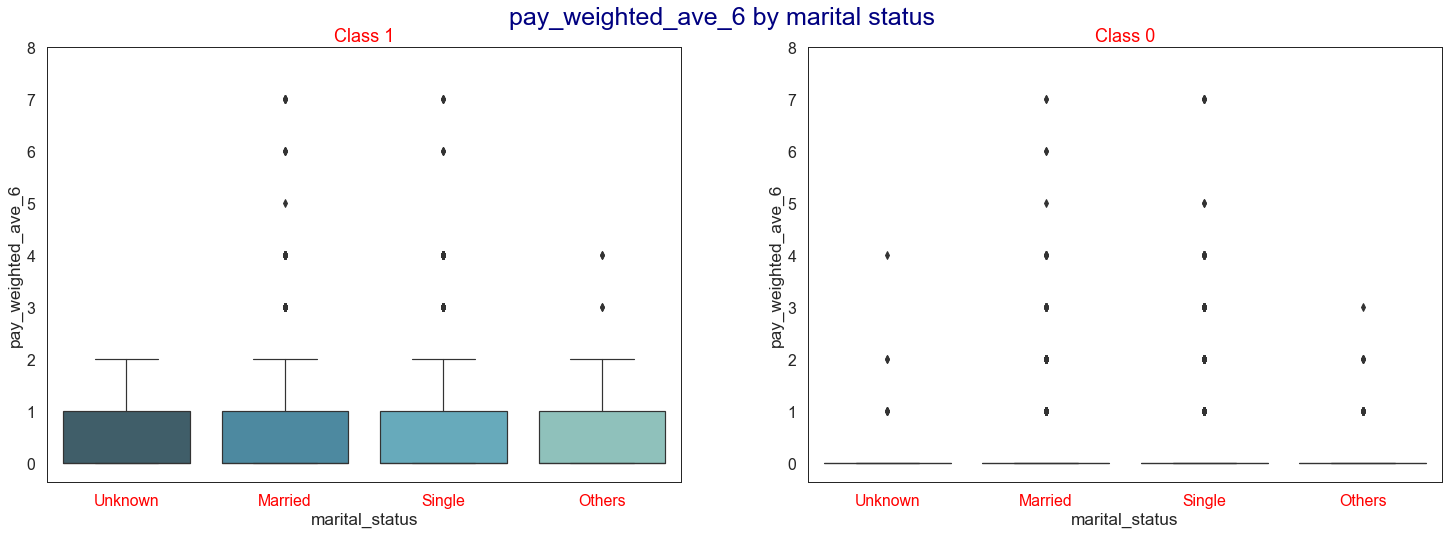

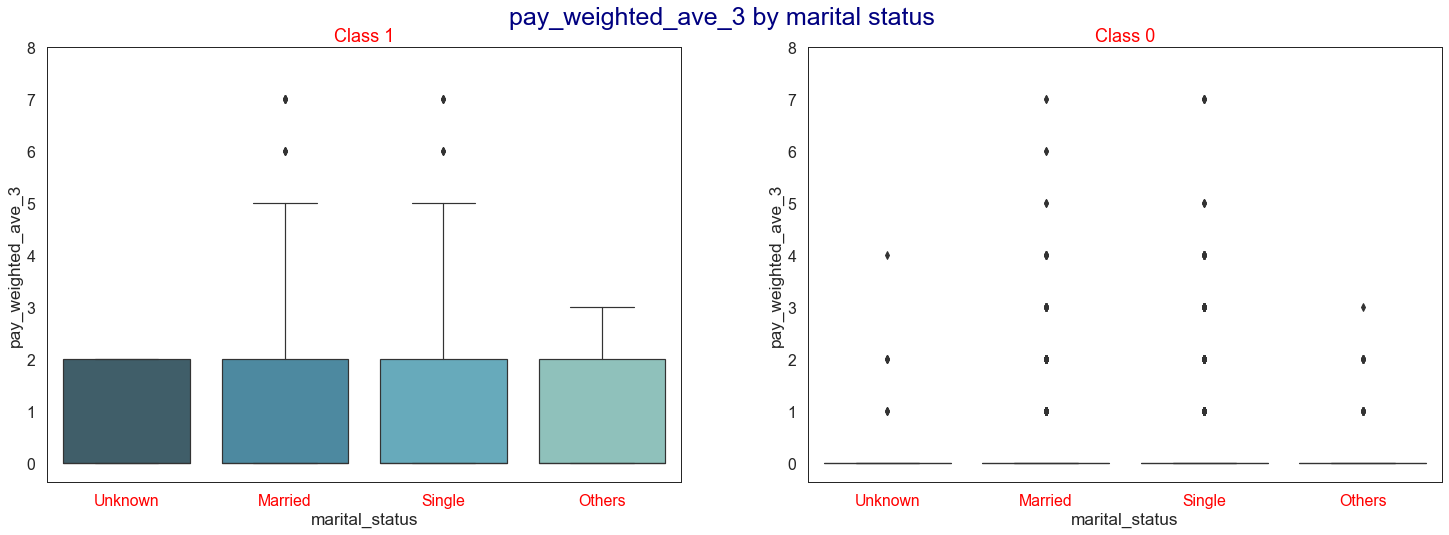

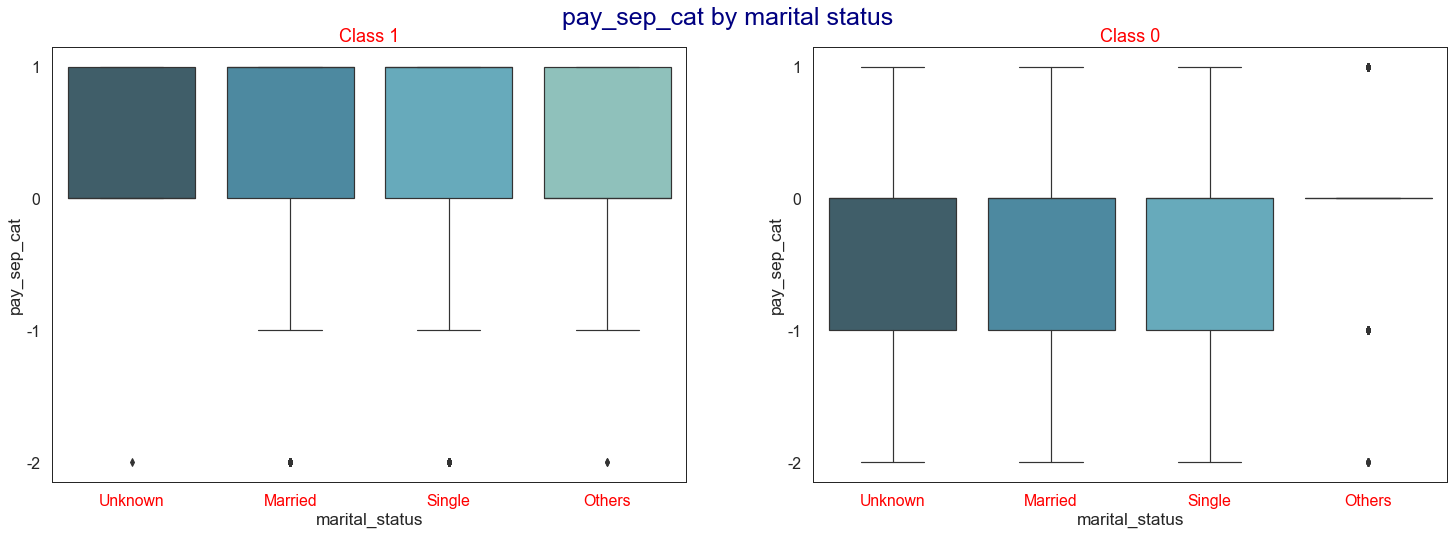

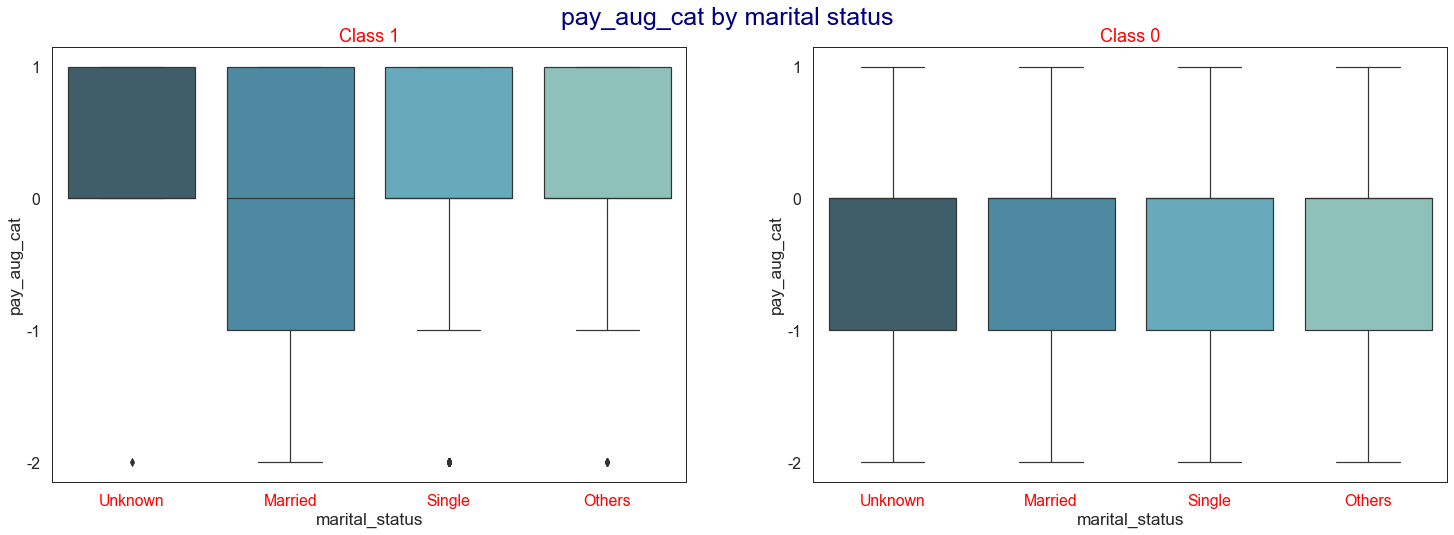

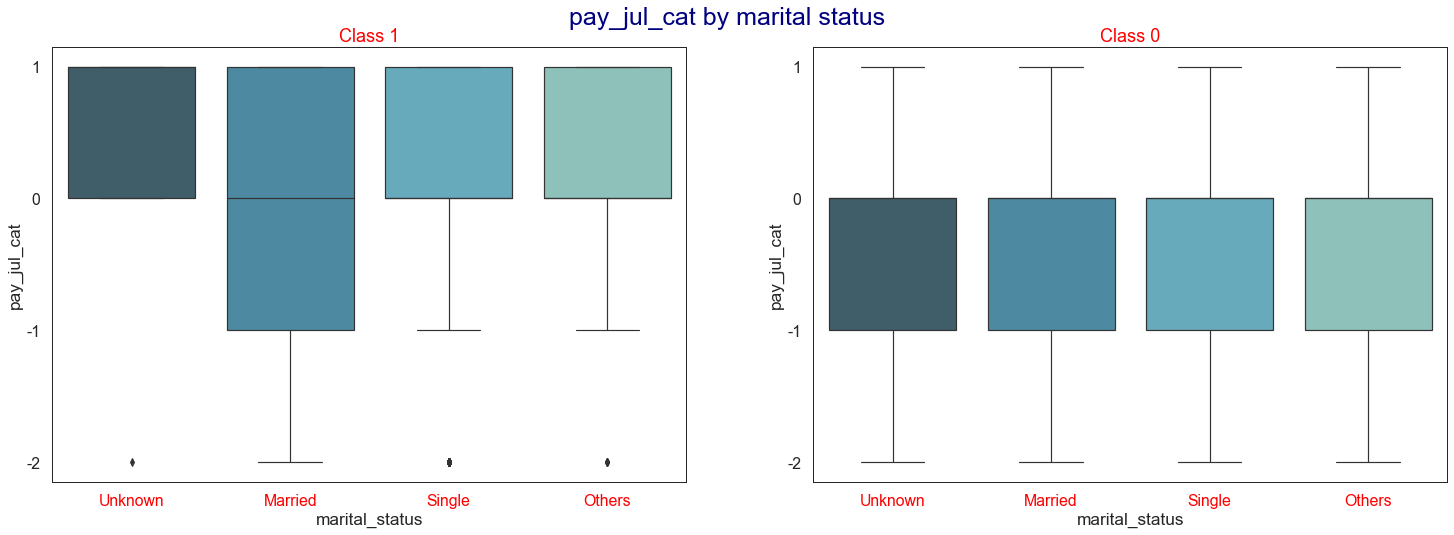

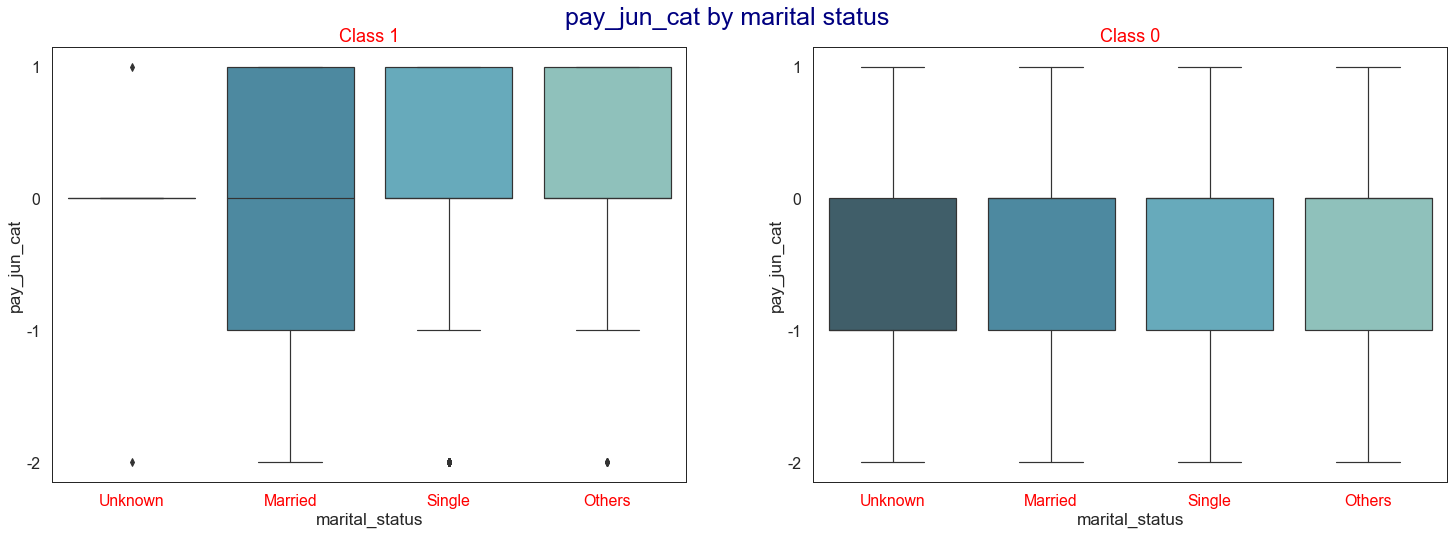

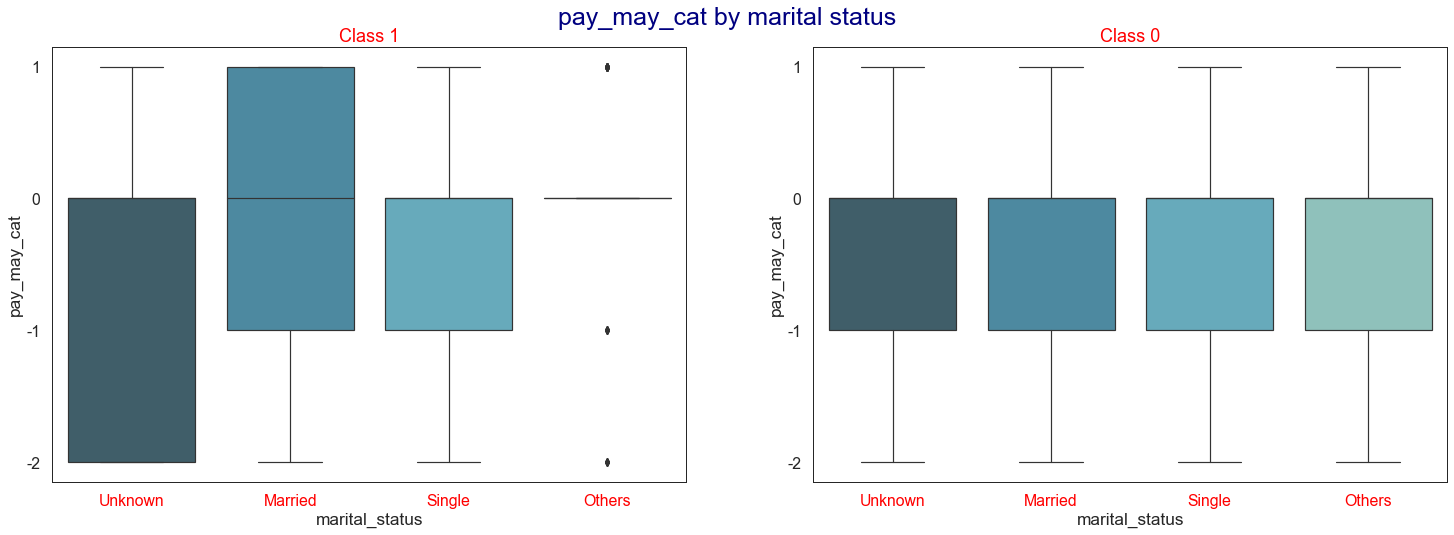

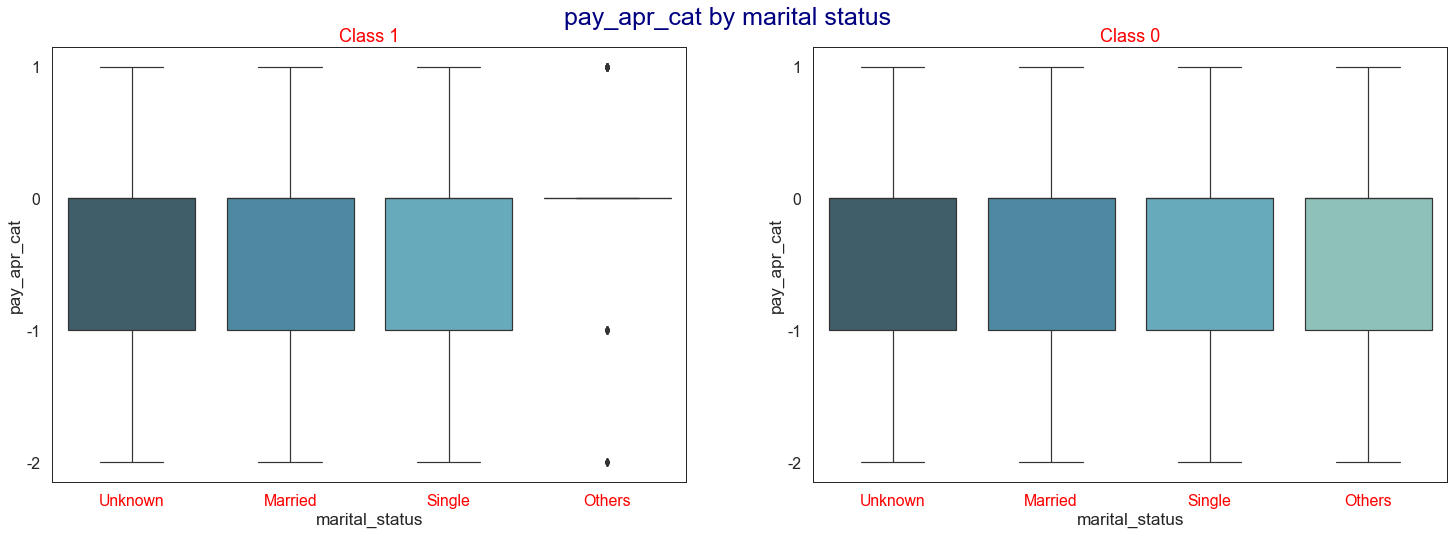

In [87]:
cols = ["limit_used_sep", "pay_weighted_ave_6", "pay_weighted_ave_3","pay_sep_cat", "pay_aug_cat", "pay_jul_cat", "pay_jun_cat", "pay_may_cat", "pay_apr_cat"]

for i, col in enumerate(cols):
    fig = plt.figure(figsize=(25, 8))
    for j, class_ in enumerate([1, 0]):
        ax = fig.add_subplot(1, 2, j + 1)
        sns.boxplot(x="marital_status",
                    y=col,
                    data=ccard.query("default_payment_next_month == @class_"),
                    palette="GnBu_d",
                    ax=ax)
        if col == "limit_used_sep":
            plt.yticks(np.arange(-1, 7, 0.5),np.arange(-1, 7, 0.5))
        elif col in ["pay_weighted_ave_6", "pay_weighted_ave_3"]:
            plt.yticks(range(0,9), range(0,9))
        else:
            plt.yticks(range(-2,2), range(-2,2))
        plt.xticks(range(0,4), ["Unknown", "Married","Single","Others"], color="red")
        plt.title("Class {}".format(class_),fontsize=18, color="red")
    fig.suptitle("{} by marital status".format(col), fontsize=25, y=0.95, color="navy")
    plt.show();

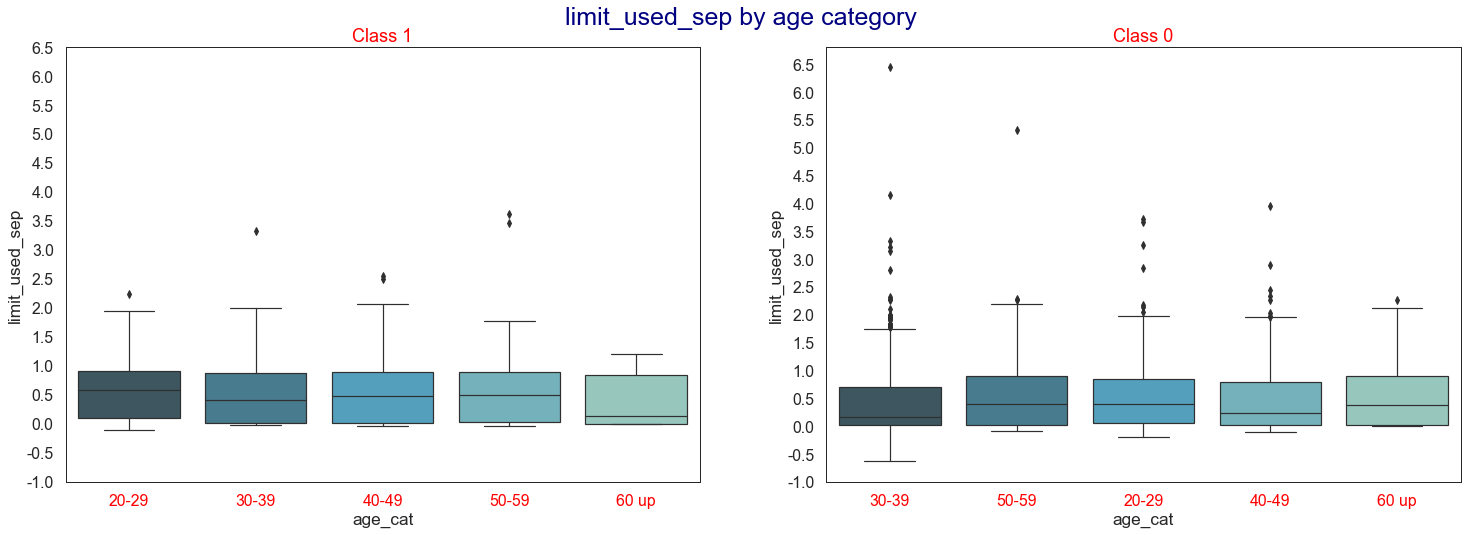

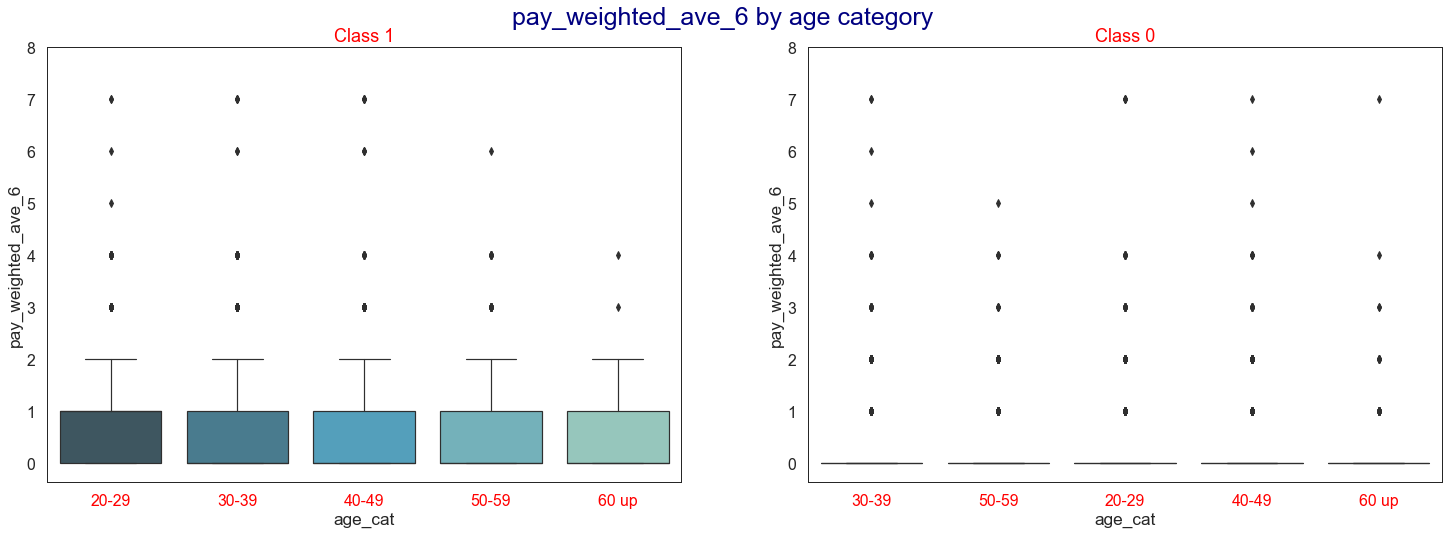

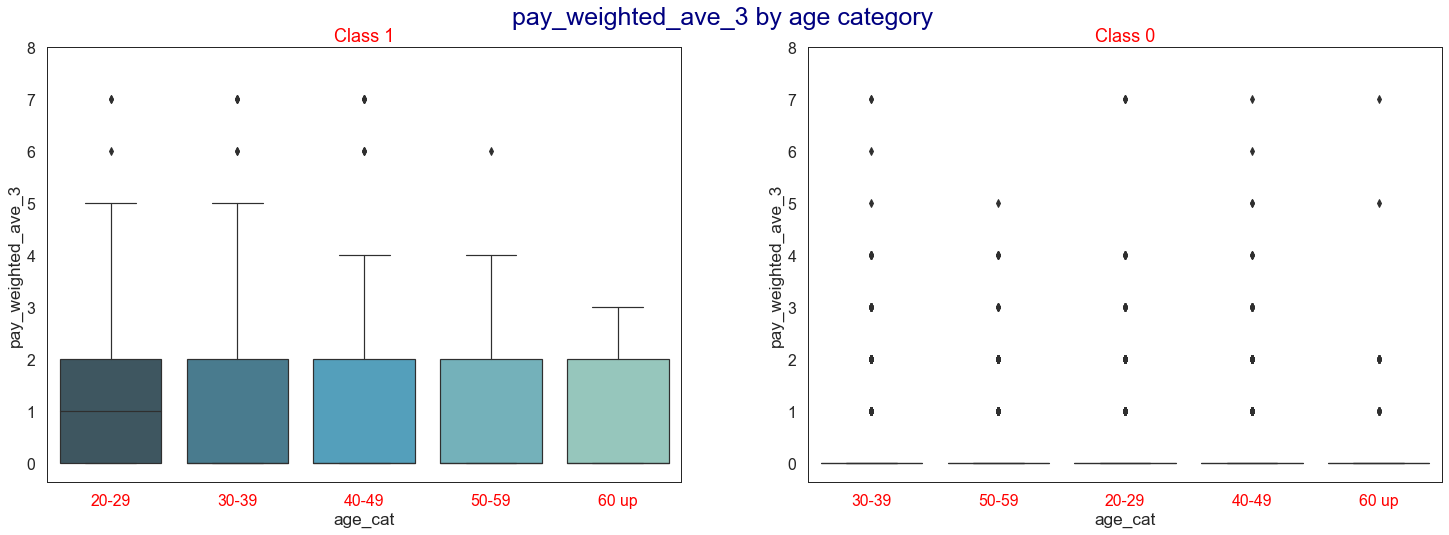

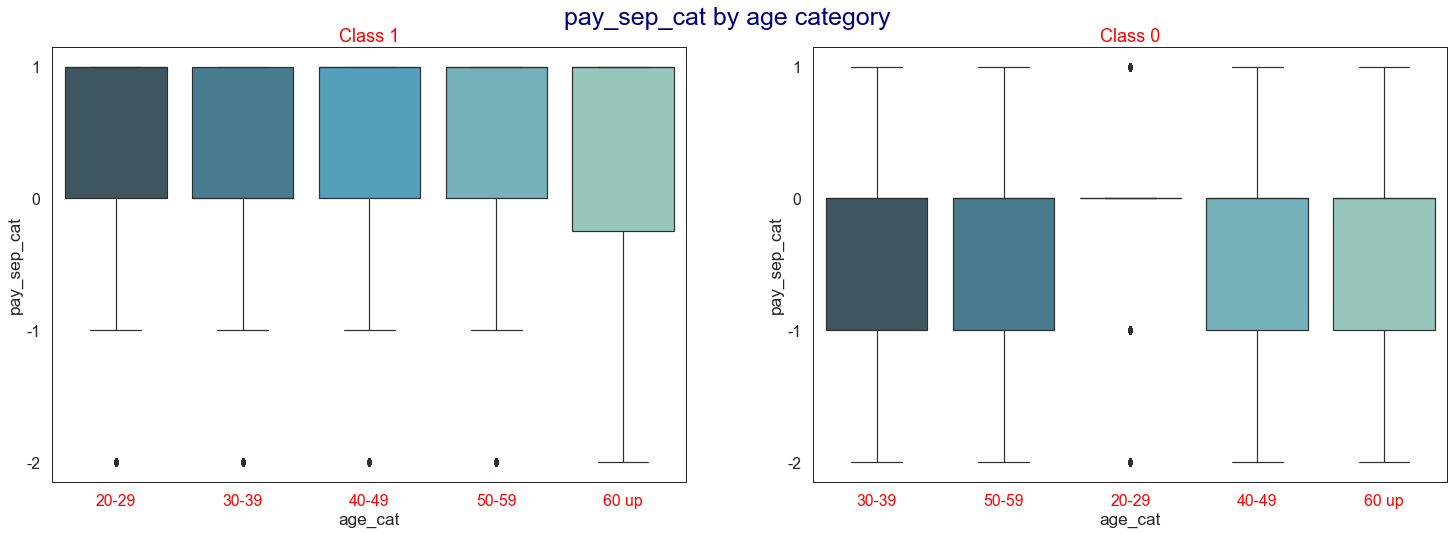

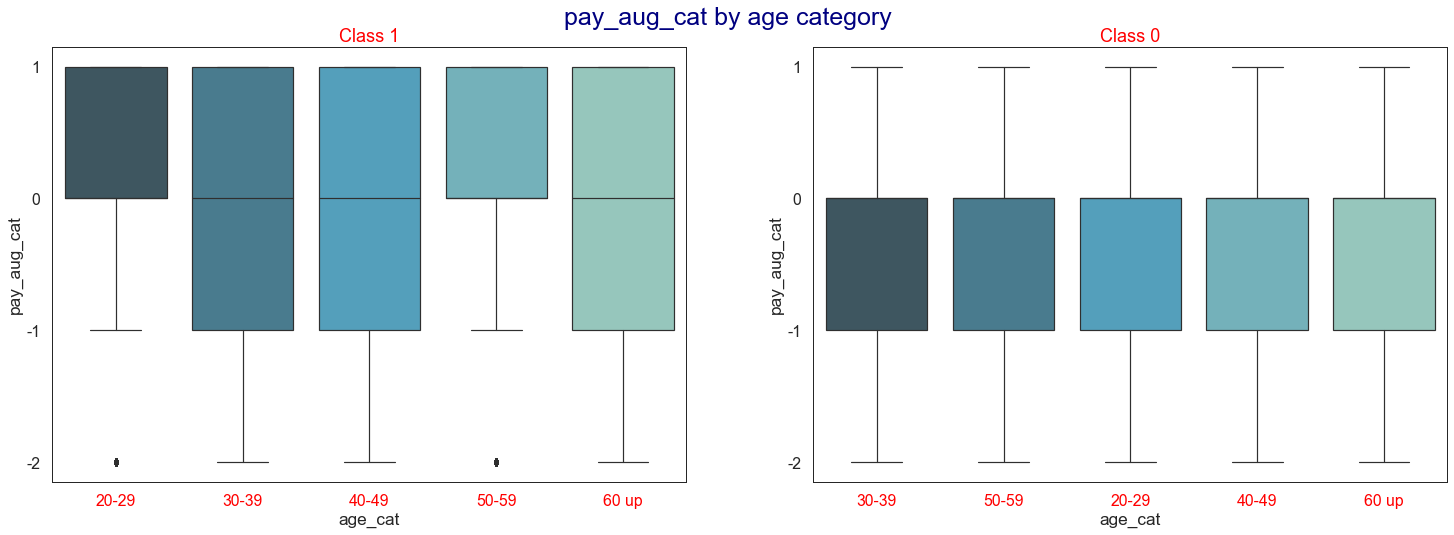

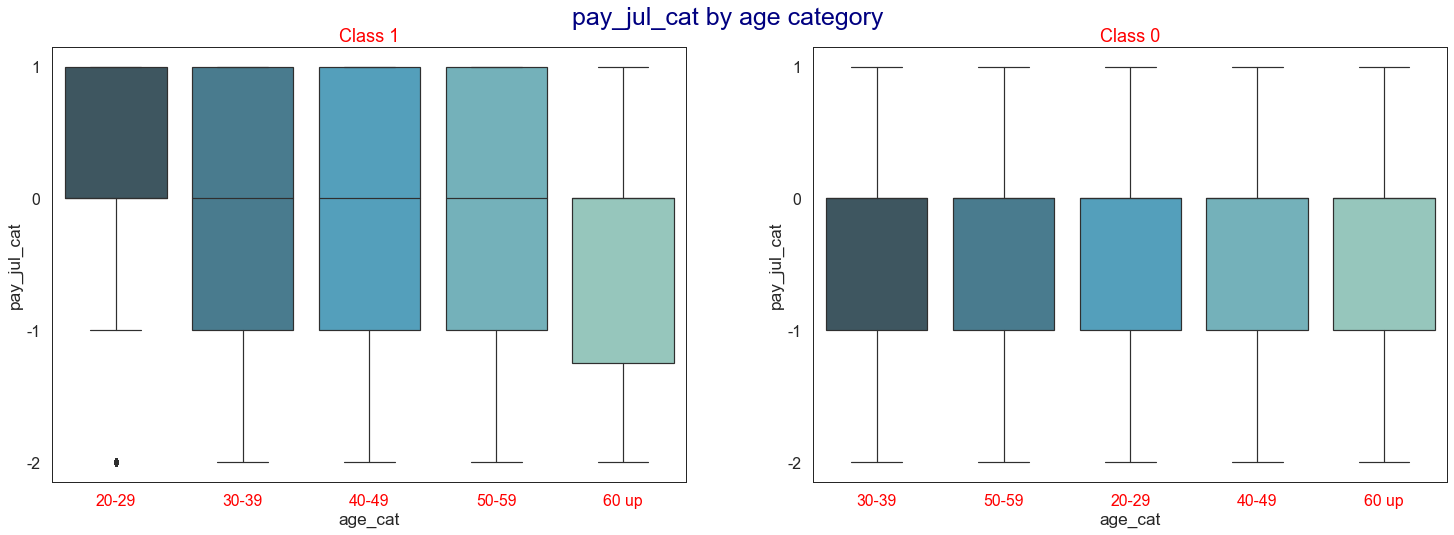

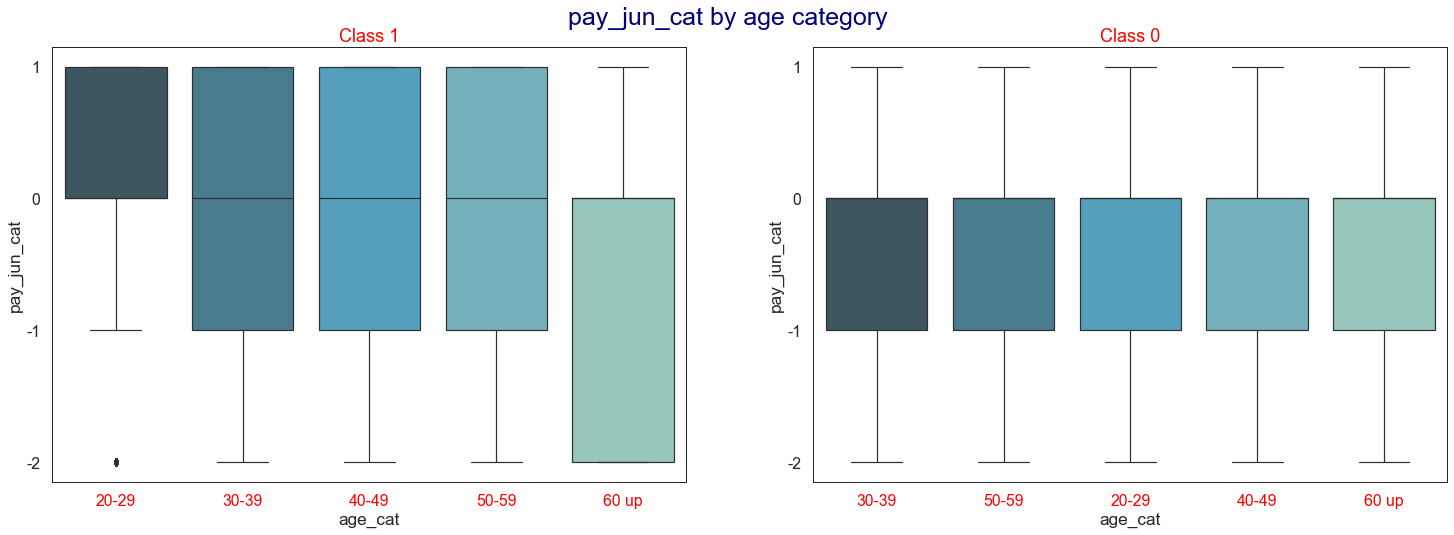

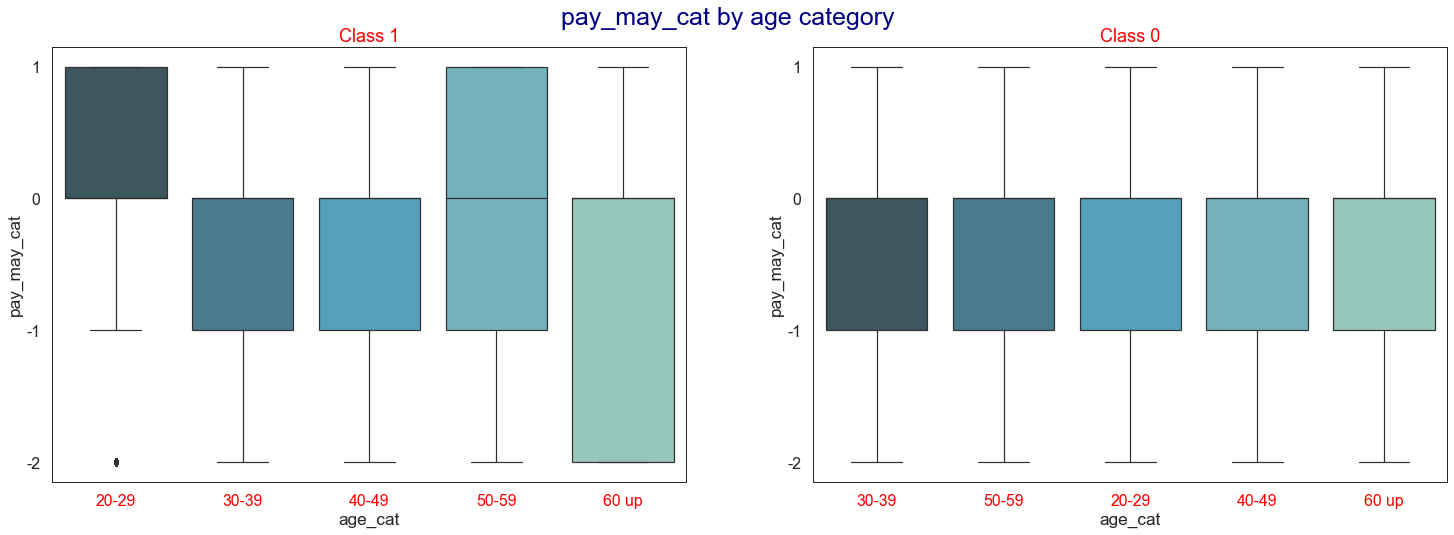

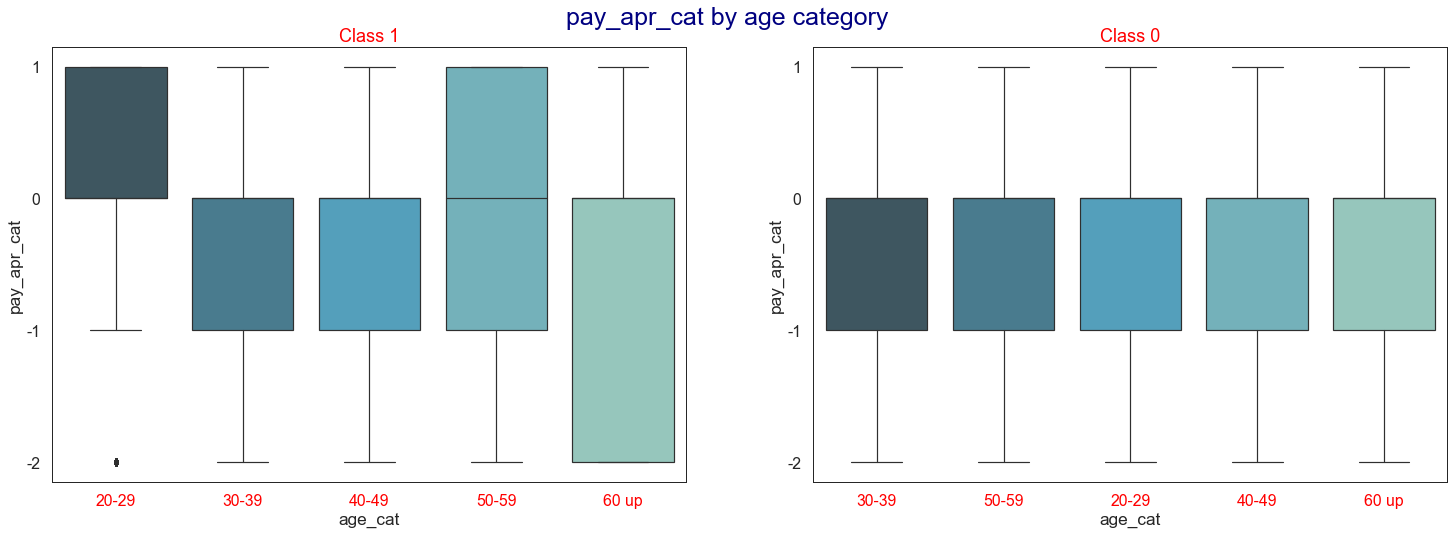

In [77]:
cols = ["limit_used_sep", "pay_weighted_ave_6", "pay_weighted_ave_3","pay_sep_cat", "pay_aug_cat", "pay_jul_cat", "pay_jun_cat", "pay_may_cat", "pay_apr_cat"]

for i, col in enumerate(cols):
    fig = plt.figure(figsize=(25, 8))
    for j, class_ in enumerate([1, 0]):
        ax = fig.add_subplot(1, 2, j + 1)
        sns.boxplot(x="age_cat",
                    y=col,
                    data=ccard.query("default_payment_next_month == @class_"),
                    palette="GnBu_d",
                    ax=ax)
        if col == "limit_used_sep":
            plt.yticks(np.arange(-1, 7, 0.5),np.arange(-1, 7, 0.5))
        elif col in ["pay_weighted_ave_6", "pay_weighted_ave_3"]:
            plt.yticks(range(0,9), range(0,9))
        else:
            plt.yticks(range(-2,2), range(-2,2))
        plt.xticks(color="red")
        plt.title("Class {}".format(class_),fontsize=18, color="red")
    fig.suptitle("{} by age category".format(col), fontsize=25, y=0.95, color="navy")
    plt.show();

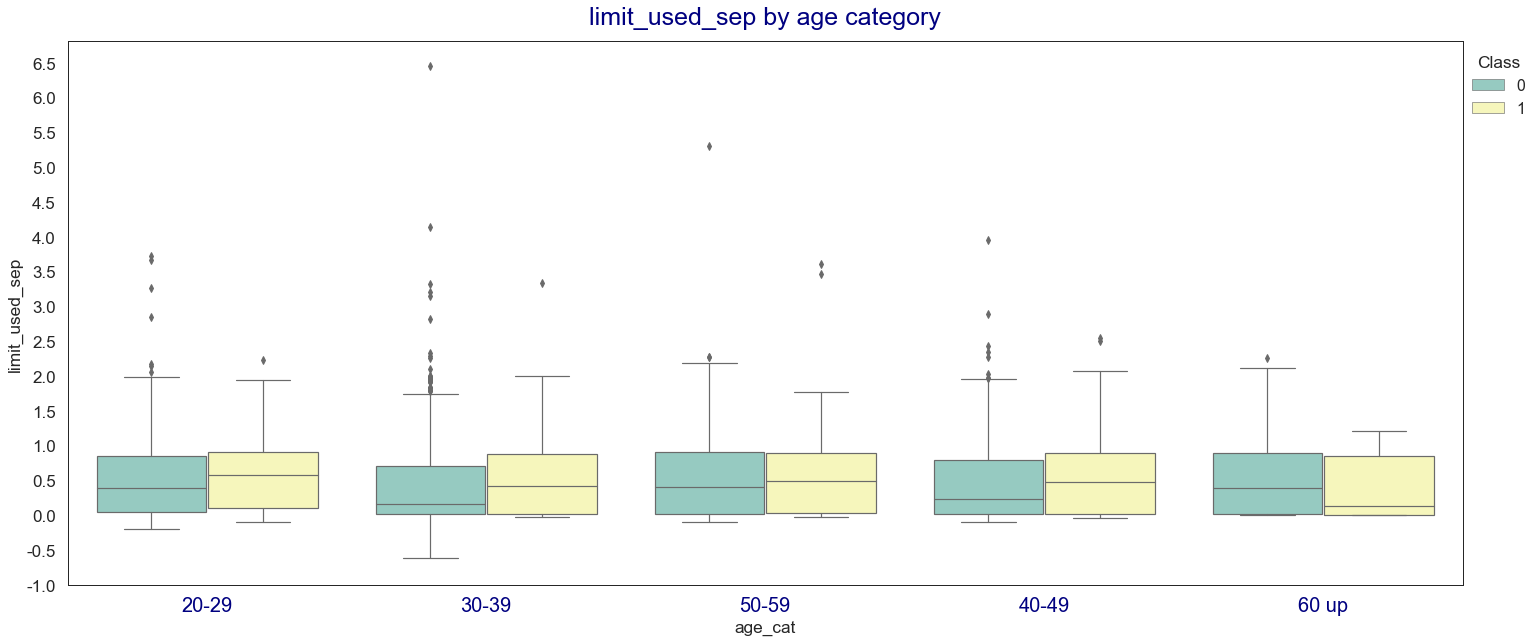

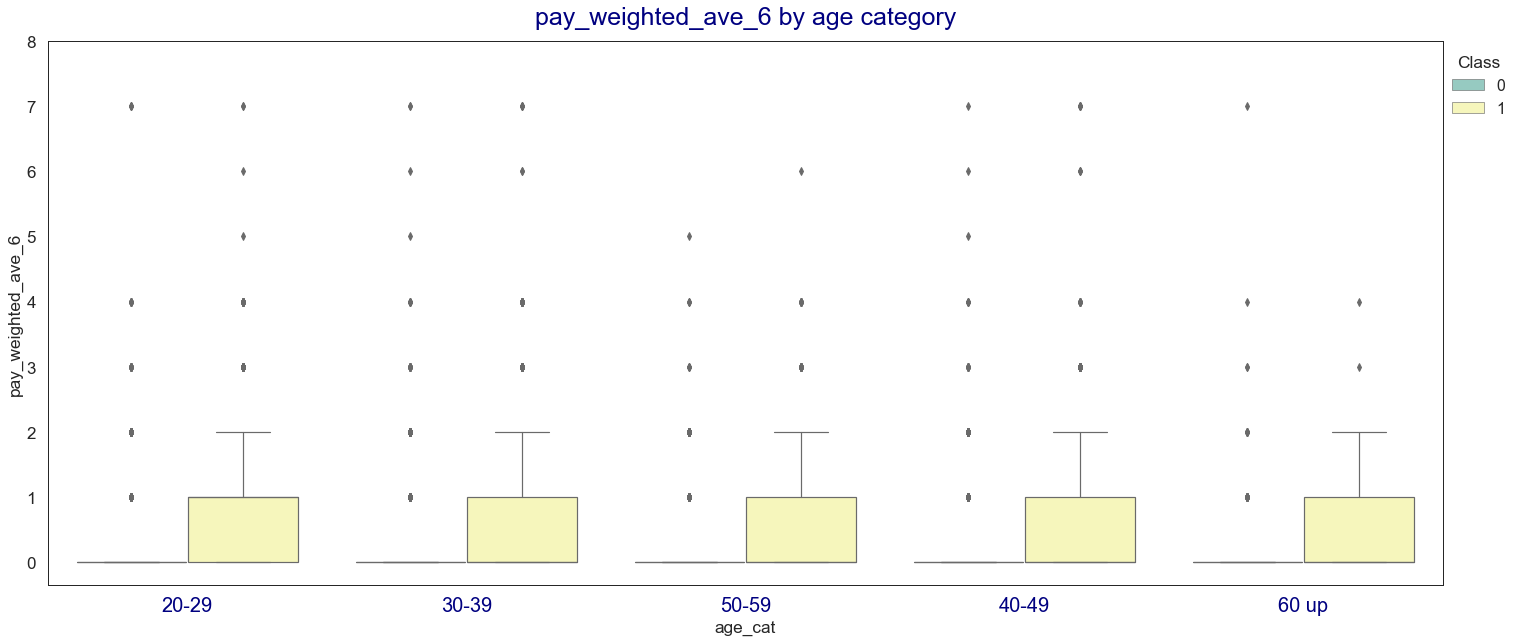

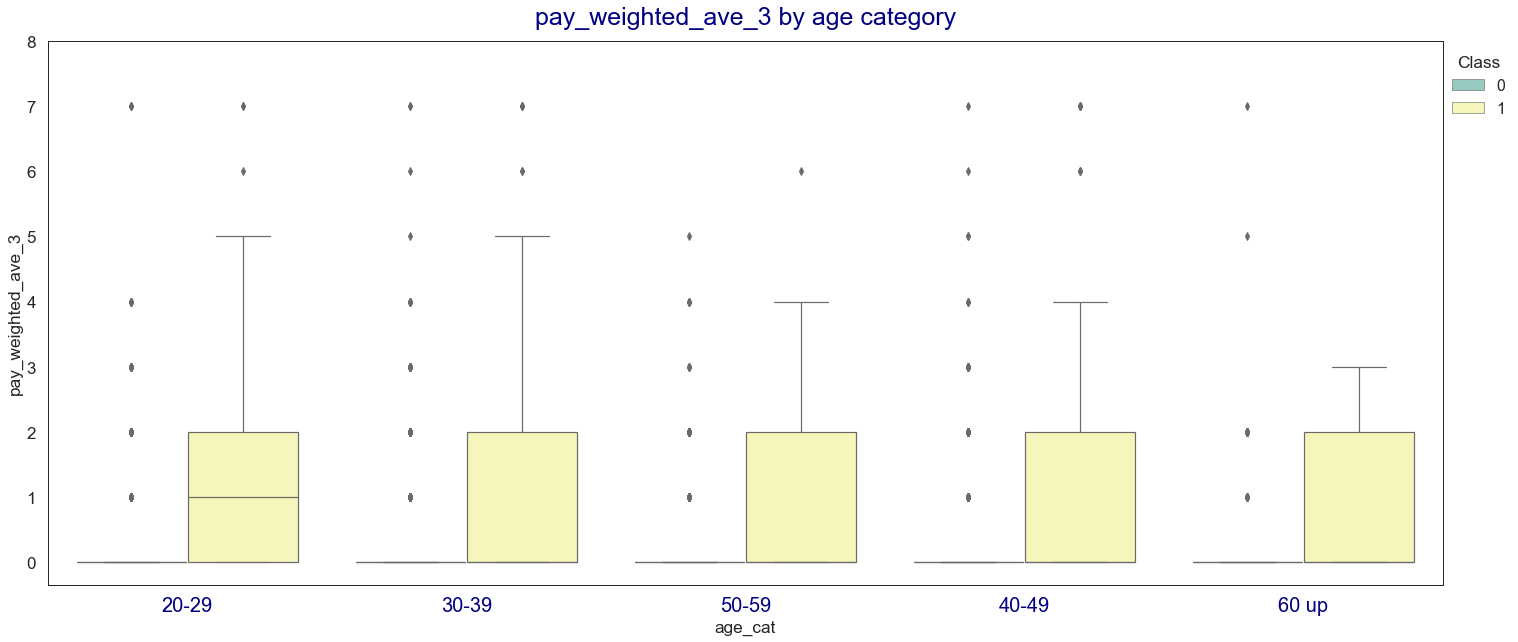

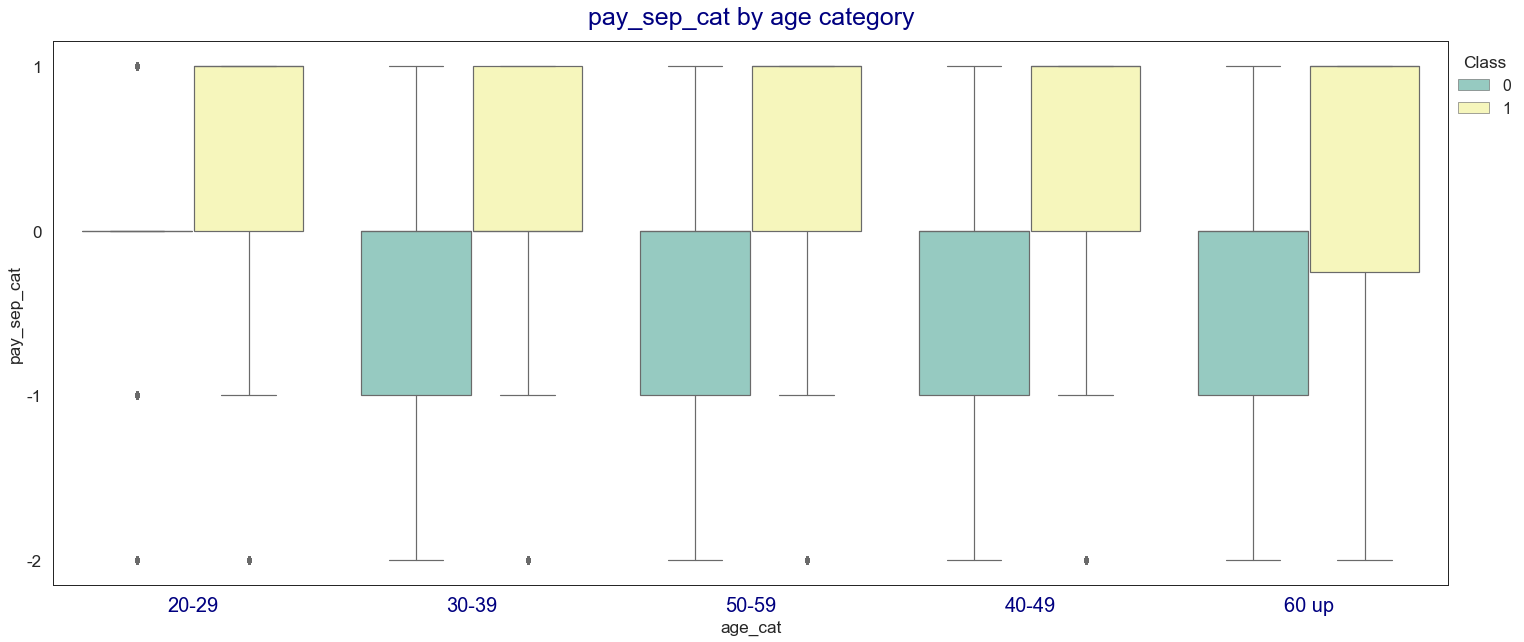

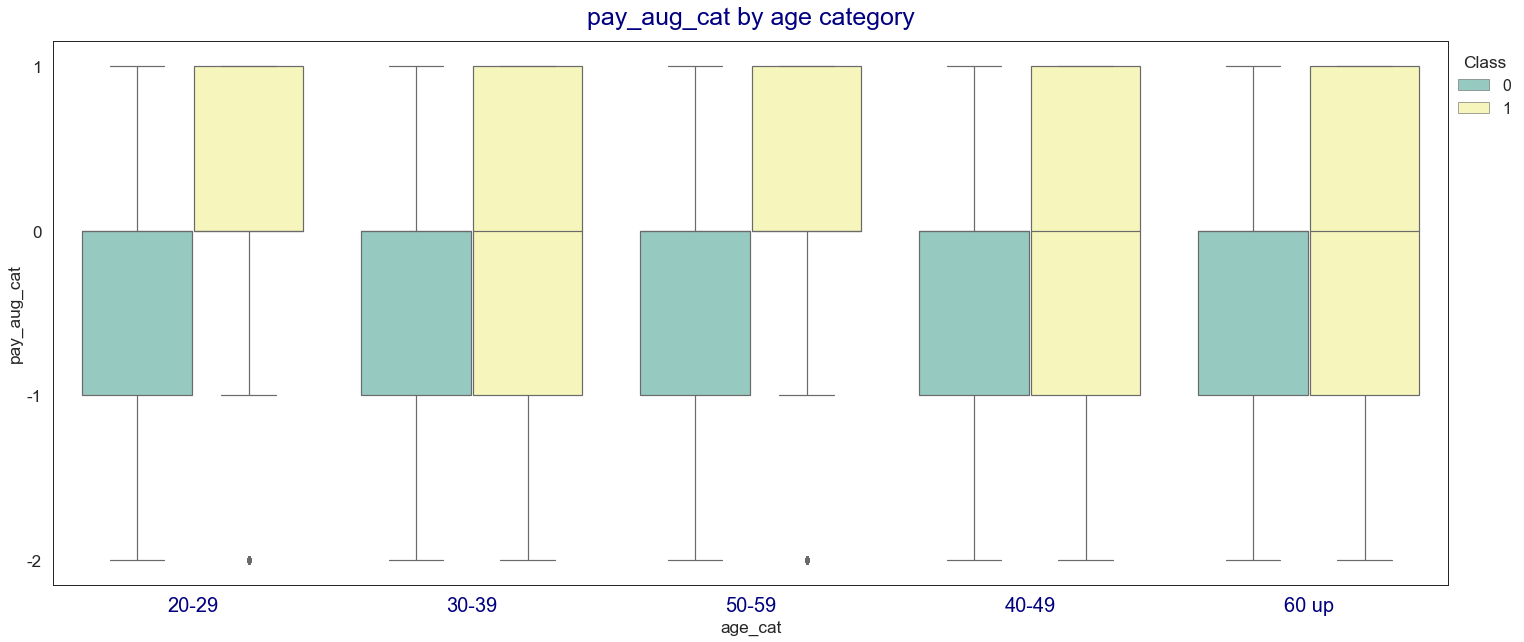

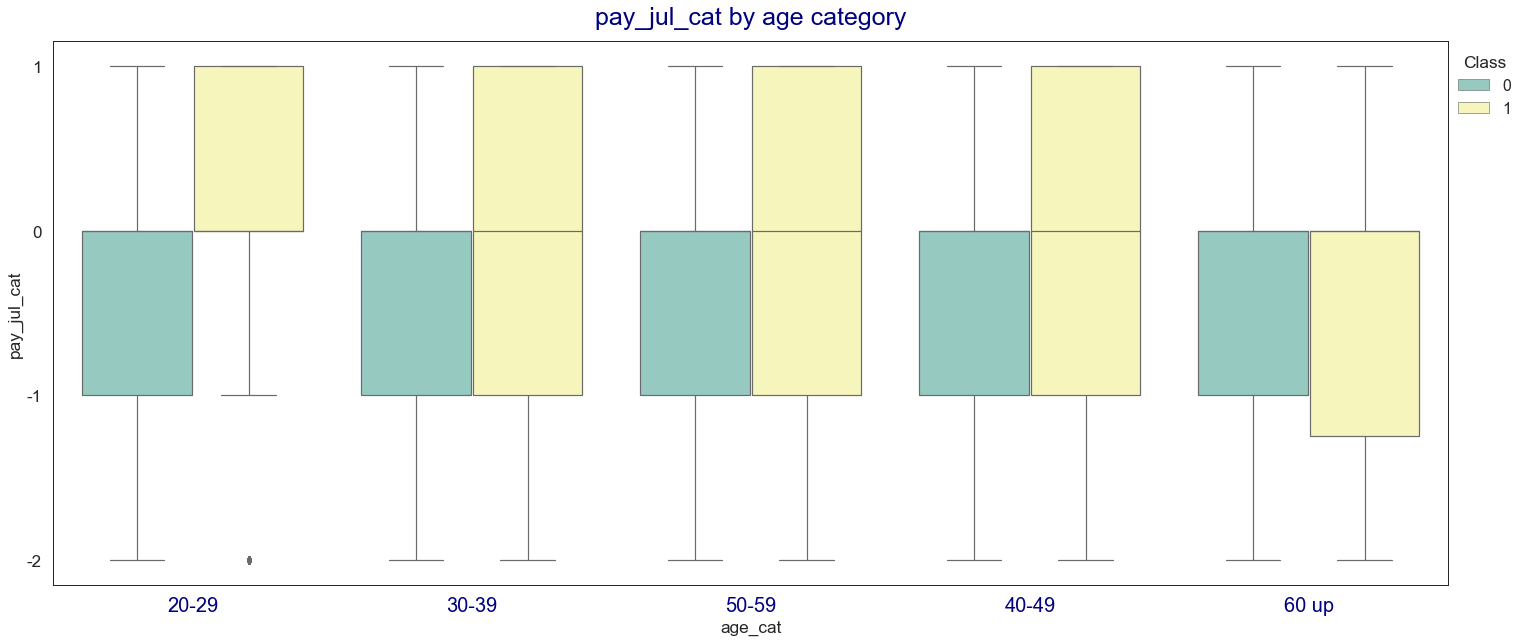

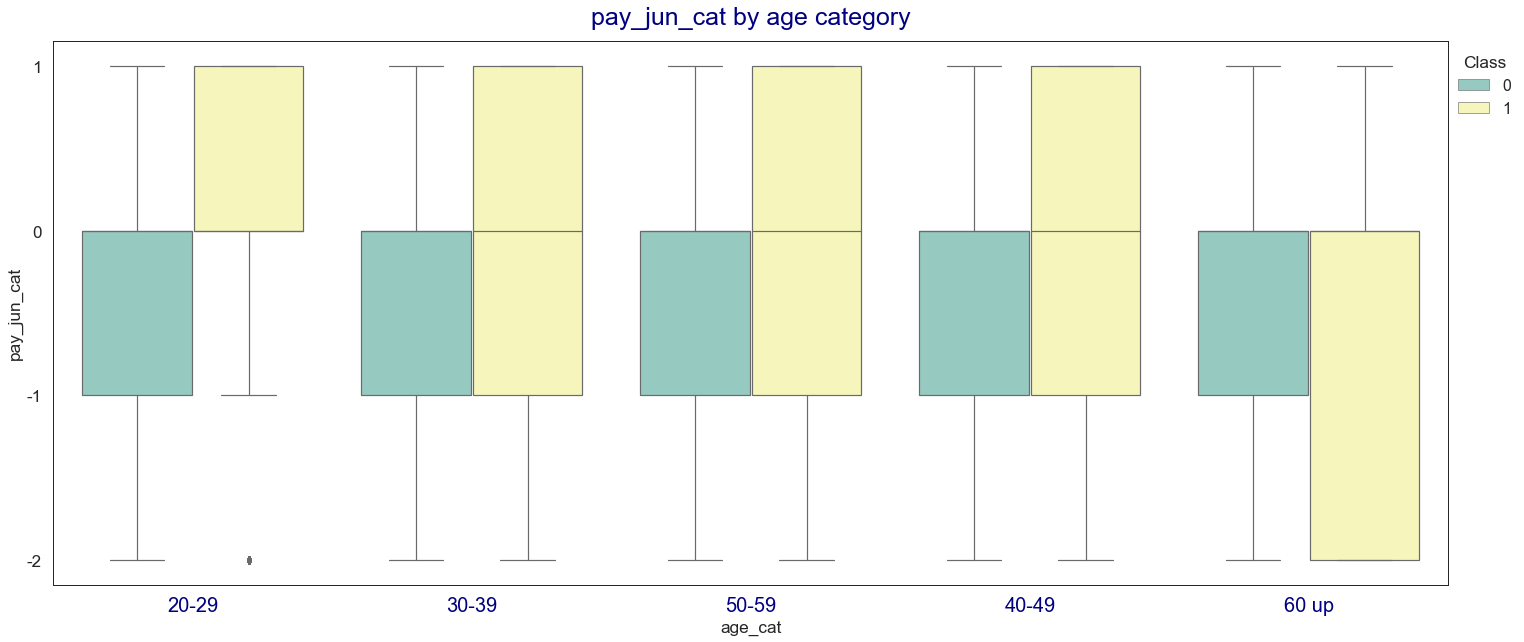

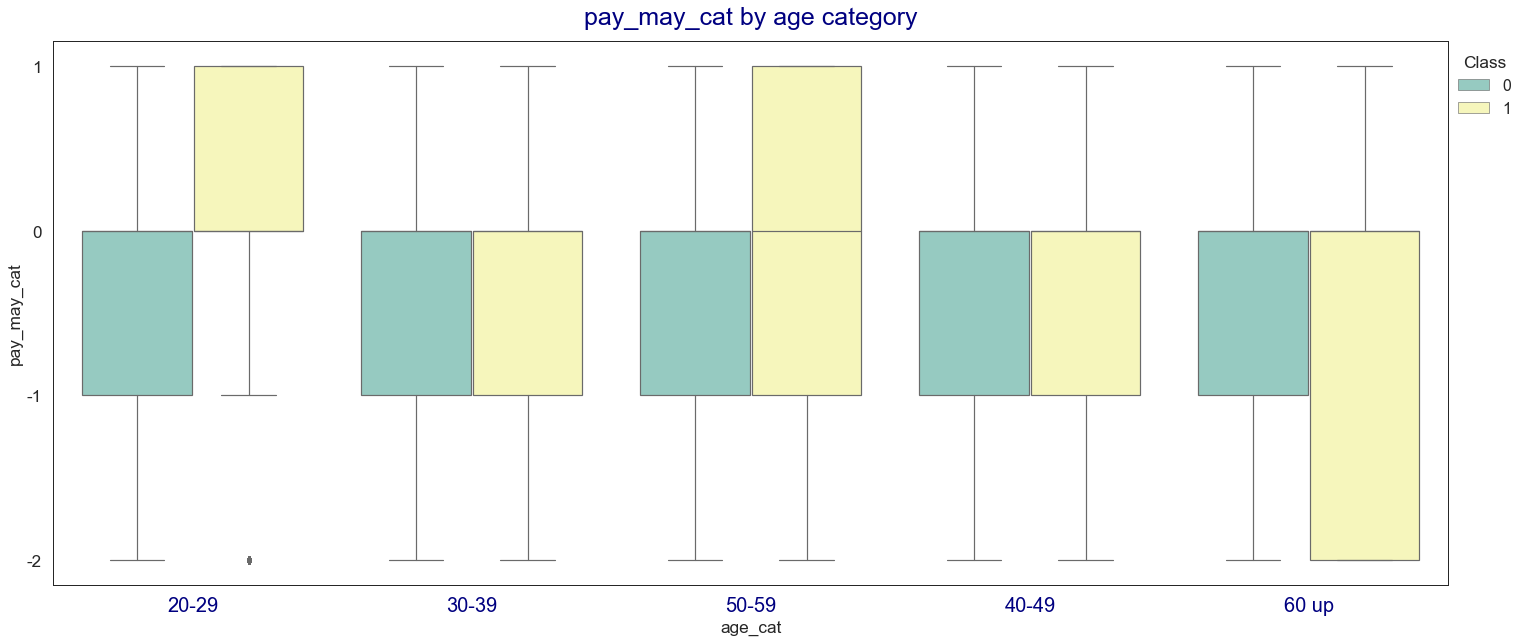

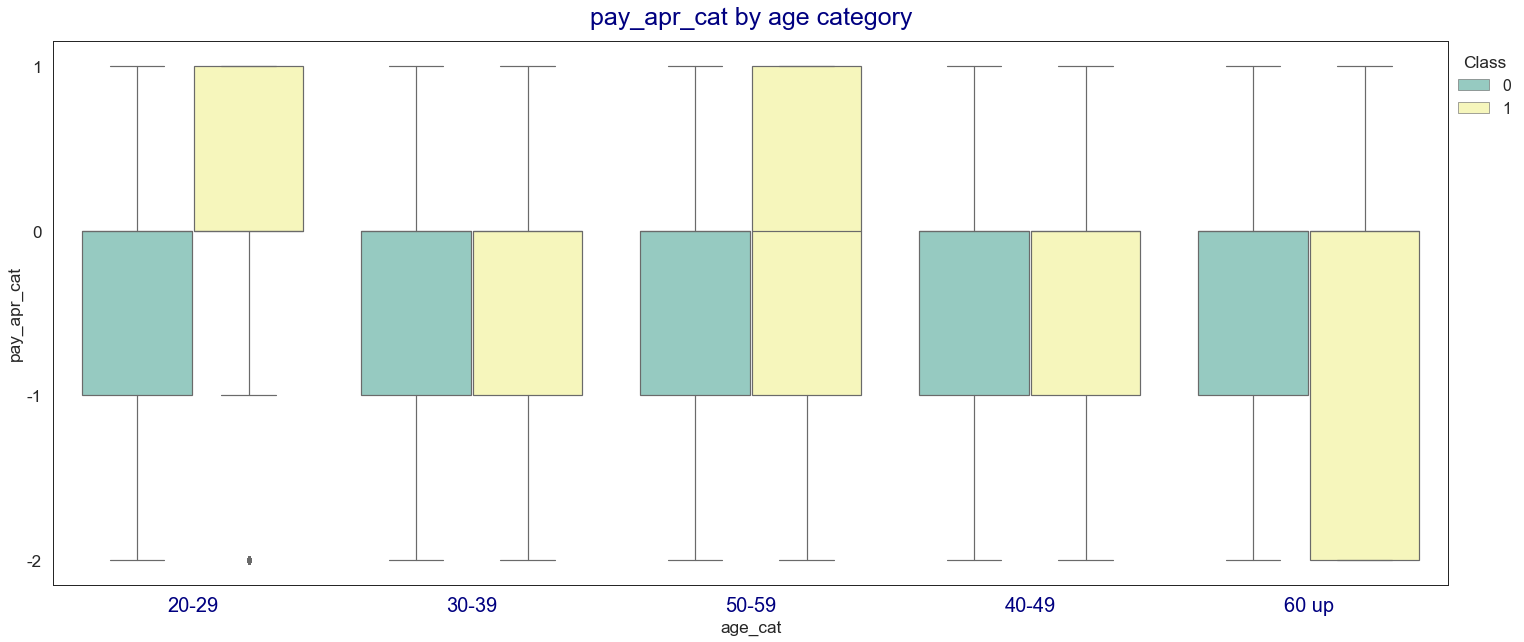

In [157]:
cols = [
    "limit_used_sep", "pay_weighted_ave_6", "pay_weighted_ave_3",
    "pay_sep_cat", "pay_aug_cat", "pay_jul_cat", "pay_jun_cat", "pay_may_cat",
    "pay_apr_cat"
]
for i, col in enumerate(cols):
    plt.figure(figsize=(25, 10))
    sns.boxplot(x="age_cat",
                y=col,
                hue="default_payment_next_month",
                data=ccard,
                palette="Set3")
    if col == "limit_used_sep":
        plt.yticks(np.arange(-1, 7, 0.5), np.arange(-1, 7, 0.5), fontsize=17)
    elif col in ["pay_weighted_ave_6", "pay_weighted_ave_3"]:
        plt.yticks(range(0, 9), range(0, 9), fontsize=17)
    else:
        plt.yticks(range(-2, 2), range(-2, 2), fontsize=17)
    plt.xticks(color="navy", fontsize=20)
    plt.title("{} by age category".format(col),
              fontsize=25,
              y=1.02,
              color="navy")
    plt.legend(loc=0, bbox_to_anchor=(1.055, 1), title="Class")
    plt.show()

In [9]:
# # Delete unknown entries under 'education' and 'marital_status'
# func.delete_entries(df, "education", [5,6,0])
# func.delete_entries(df, "marital_status", [0])
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 25 columns):
id                            29601 non-null int64
limit_bal                     29601 non-null int64
sex                           29601 non-null int64
education                     29601 non-null int64
marital_status                29601 non-null int64
age                           29601 non-null int64
pay_sep                       29601 non-null int64
pay_aug                       29601 non-null int64
pay_jul                       29601 non-null int64
pay_jun                       29601 non-null int64
pay_may                       29601 non-null int64
pay_apr                       29601 non-null int64
bill_amt_sep                  29601 non-null int64
bill_amt_aug                  29601 non-null int64
bill_amt_jul                  29601 non-null int64
bill_amt_jun                  29601 non-null int64
bill_amt_may                  29601 non-null int64
bill_amt_apr            

In [7]:
#Add a column for % of credit limit used by dividing billed amount as of September 2005 (bill_amt_sep) over limit balance (limit_bal).
df["limit_used_sep"] = df["bill_amt_sep"] / df["limit_bal"]

#Add a column for "mode" payment history for the past 3 mos. Otherwise, take pay_sep.
df["pay_mode3"] = pd.Series([])
for i in range(len(df)):
    try:
        df["pay_mode3"].iloc[i] = mode([df["pay_sep"].iloc[i], df["pay_aug"].iloc[i], df["pay_jul"].iloc[i]])
    except:
        df["pay_mode3"].iloc[i] = df["pay_sep"].iloc[i]
    else:
        df["pay_mode3"].iloc[i] = mode([df["pay_sep"].iloc[i], df["pay_aug"].iloc[i], df["pay_jul"].iloc[i]])
df["pay_mode3"] = df["pay_mode3"].astype("int64")

#Add payment history for the past 3 and 6 months.
df["score_3mo"] = round(df["pay_sep"]*.5 + df["pay_aug"]*.25 + df["pay_jul"]*.25)
df["score_6mo"] = round(df["pay_sep"]*.5 + df["pay_aug"]*.1 + df["pay_jul"]*.1 + df["pay_jun"]*.1 + df["pay_may"]*.1 + df["pay_apr"]*.1)
df["score_3mo"] = df["score_3mo"].astype("int64")
df["score_6mo"] = df["score_6mo"].astype("int64")

#Recategorized the pay and age columns
columns = ['pay_mode3','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']
for col in columns:
    df[col+"_cat"] = df[col].map(lambda x: -1 if x<0 else (1 if x>0 else x))

df["age_cat"] = df["age"].map(lambda x: "20-29" if x < 30 else ("30-39" if x < 40 else ("40-49" if x < 50 else ("50-59" if x < 60 else "60 up"))))

df.head()

id  limit_bal  sex  education  marital_status  age  pay_sep  pay_aug  \
0   1      20000    2          2               1   24        2        2   
1   2     120000    2          2               2   26       -1        2   
2   3      90000    2          2               2   34        0        0   
3   4      50000    2          2               1   37        0        0   
4   5      50000    1          2               1   57       -1        0   

   pay_jul  pay_jun  pay_may  pay_apr  bill_amt_sep  bill_amt_aug  \
0       -1       -1       -2       -2          3913          3102   
1        0        0        0        2          2682          1725   
2        0        0        0        0         29239         14027   
3        0        0        0        0         46990         48233   
4       -1        0        0        0          8617          5670   

   bill_amt_jul  bill_amt_jun  bill_amt_may  bill_amt_apr  pay_amt_sep  \
0           689             0             0             0            0   
1          2682          3272          3455          3261            0   
2         13559         14331         14948         15549         1518   
3         49291         28314         28959         29547         2000   
4         35835         20940         19146         19131         2000   

   pay_amt_aug  pay_amt_jul  pay_amt_jun  pay_amt_may  pay_amt_apr  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   default_payment_next_month  limit_used_sep  pay_mode3  score_3mo  \
0                           1        0.195650          2          1   
1                           1        0.022350         -1          0   
2                           0        0.324878          0          0   
3                           0        0.939800          0          0   
4                           0        0.172340         -1         -1   

   score_6mo  pay_mode3_cat  pay_sep_cat  pay_aug_cat  pay_jul_cat  \
0          1              1            1            1           -1   
1          0             -1           -1            1            0   
2          0              0            0            0            0   
3          0              0            0            0            0   
4         -1             -1           -1            0           -1   

   pay_jun_cat  pay_may_cat  pay_apr_cat age_cat  
0           -1           -1           -1   20-29  
1            0            0            1   20-29  
2            0            0            0   30-39  
3            0            0            0   30-39  
4            0            0            0   50-59

In [197]:
df.shape

(29601, 37)

In [164]:
df.to_csv("df.csv", index = False)

In [2]:
df = pd.read_csv("df.csv")

Let's plot our data with the new features added.

======= Defaulters by demographics (past 3 months) =======


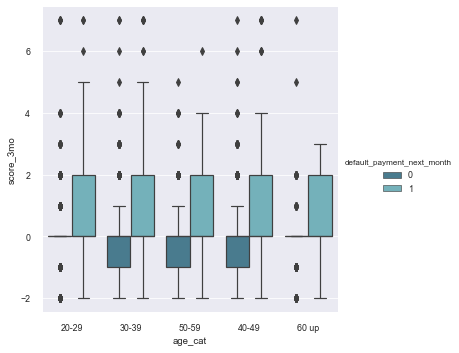

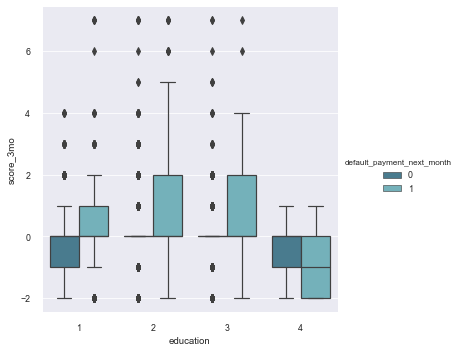

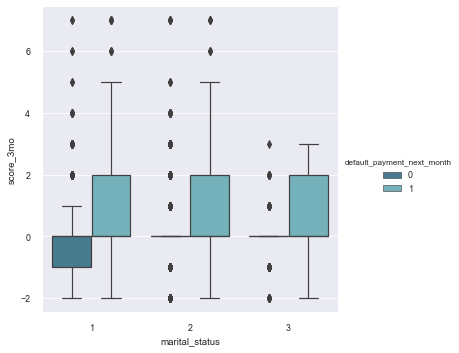

In [194]:
print("======= Defaulters by demographics (past 3 months) =======")
sns.catplot(x="age_cat", y="score_3mo", hue="default_payment_next_month", kind="box", data=df, palette = "GnBu_d");
sns.catplot(x="education", y="score_3mo", hue="default_payment_next_month", kind="box", data=df, palette = "GnBu_d");
sns.catplot(x="marital_status", y="score_3mo", hue="default_payment_next_month", kind="box", data=df, palette = "GnBu_d");

======= Defaulters by demographics (past 6 months) =======


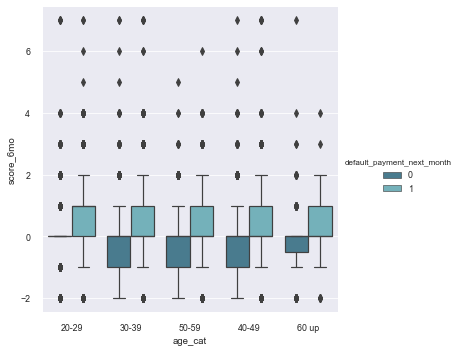

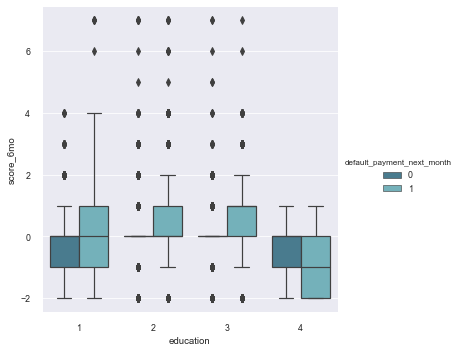

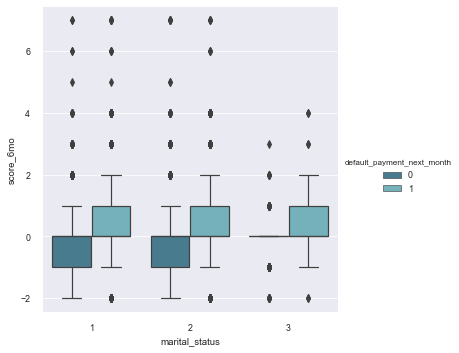

In [193]:
print("======= Defaulters by demographics (past 6 months) =======")
sns.catplot(x="age_cat", y="score_6mo", hue="default_payment_next_month", kind="box", data=df, palette = "GnBu_d");
sns.catplot(x="education", y="score_6mo", hue="default_payment_next_month", kind="box", data=df, palette = "GnBu_d");
sns.catplot(x="marital_status", y="score_6mo", hue="default_payment_next_month", kind="box", data=df, palette = "GnBu_d");

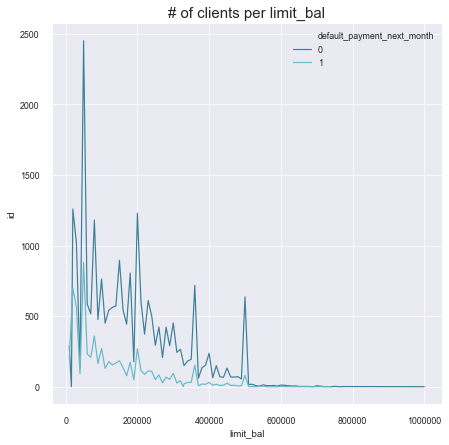

In [189]:
a = df[["id","limit_bal", "default_payment_next_month"]].groupby(["limit_bal", "default_payment_next_month"]).count()
a.reset_index(inplace = True)
plt.figure(figsize = (7,7))
sns.lineplot(x="limit_bal", y="id",hue = "default_payment_next_month", data=a, palette = "GnBu_d");
plt.title("# of clients per limit_bal", fontsize = 15);

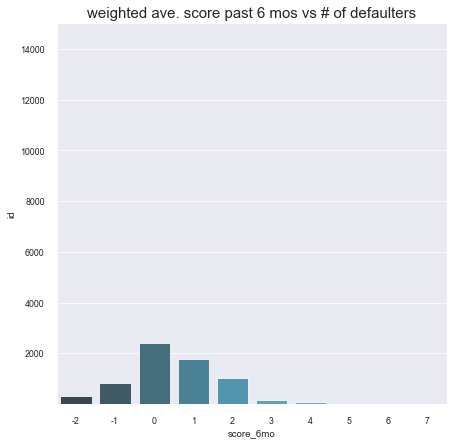

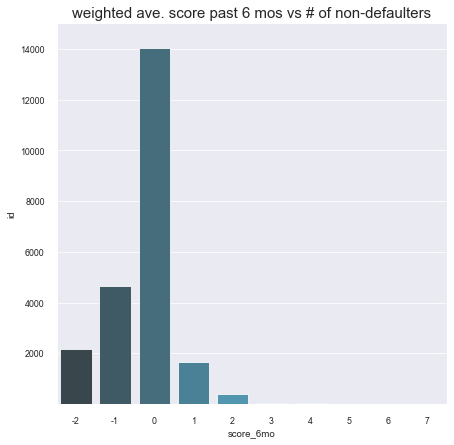

In [191]:
a = df[["id","score_6mo", "default_payment_next_month"]].groupby(["score_6mo", "default_payment_next_month"]).count()
a.reset_index(inplace = True)

plt.figure(figsize = (7,7))
sns.barplot(x="score_6mo", y="id", data=a.query("default_payment_next_month == 1"), palette = "GnBu_d");
plt.ylim((0.0001, 15000));
plt.title("weighted ave. score past 6 mos vs # of defaulters", fontsize = 15);

plt.figure(figsize = (7,7))
sns.barplot(x="score_6mo", y="id", data=a.query("default_payment_next_month == 0"), palette = "GnBu_d");
plt.ylim((0.0001, 15000));
plt.title("weighted ave. score past 6 mos vs # of non-defaulters", fontsize = 15);

======= Credit Limit Exceeded as of September 2005 =======


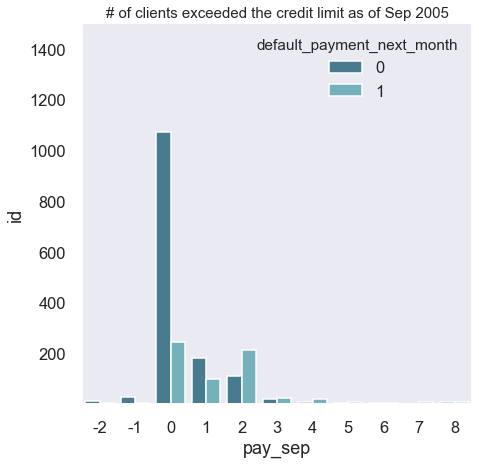

In [3]:
print("======= Credit Limit Exceeded as of September 2005 =======")

a = df.query("limit_used_sep >= 1")[["id","pay_sep", "default_payment_next_month"]].groupby(["pay_sep", "default_payment_next_month"]).count()
a.reset_index(inplace = True)

plt.figure(figsize = (7,7))
sns.barplot(x="pay_sep", y="id", hue = "default_payment_next_month", data=a, palette = "GnBu_d");
plt.ylim((0.0001, 1500));
plt.title("# of clients exceeded the credit limit as of Sep 2005", fontsize = 15);
plt.show();

#### Based on the above plots:

- There are clients with good standing or score that are still classified as defaulters or likely to default (class 1). 
- Those under education "others" have good standing based on the weighted scores. Most of them are classified as 1.
- There are more class 1s with lower credit limit.
- There are clients who have already exceeded their credit limit as of Sep 2005 but still not classified as 1.  Some of them have pay_sep < 1.

In [198]:
#Systematically remove the outliers using z-score.  Here we are removing data outside of +/-3 std

features = ['limit_bal', 'age', 'limit_used_sep',
       'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
       'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug',
       'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'id', 'sex',
       'education', 'marital_status', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr']
df_features = df[features]
df_others = df.drop(features, axis = 1)
df_features_cleaned = df_features[(np.abs(stats.zscore(df_features)) < 3).all(axis = 1)]

df = pd.concat([df_others.default_payment_next_month, df_features_cleaned, df_others.drop(["default_payment_next_month"], axis = 1)], axis = 1, join = "inner")

display(df.shape, df_features.shape, df_features_cleaned.shape, df_others.shape)

(26161, 37)

(29601, 25)

(26161, 25)

(29601, 12)

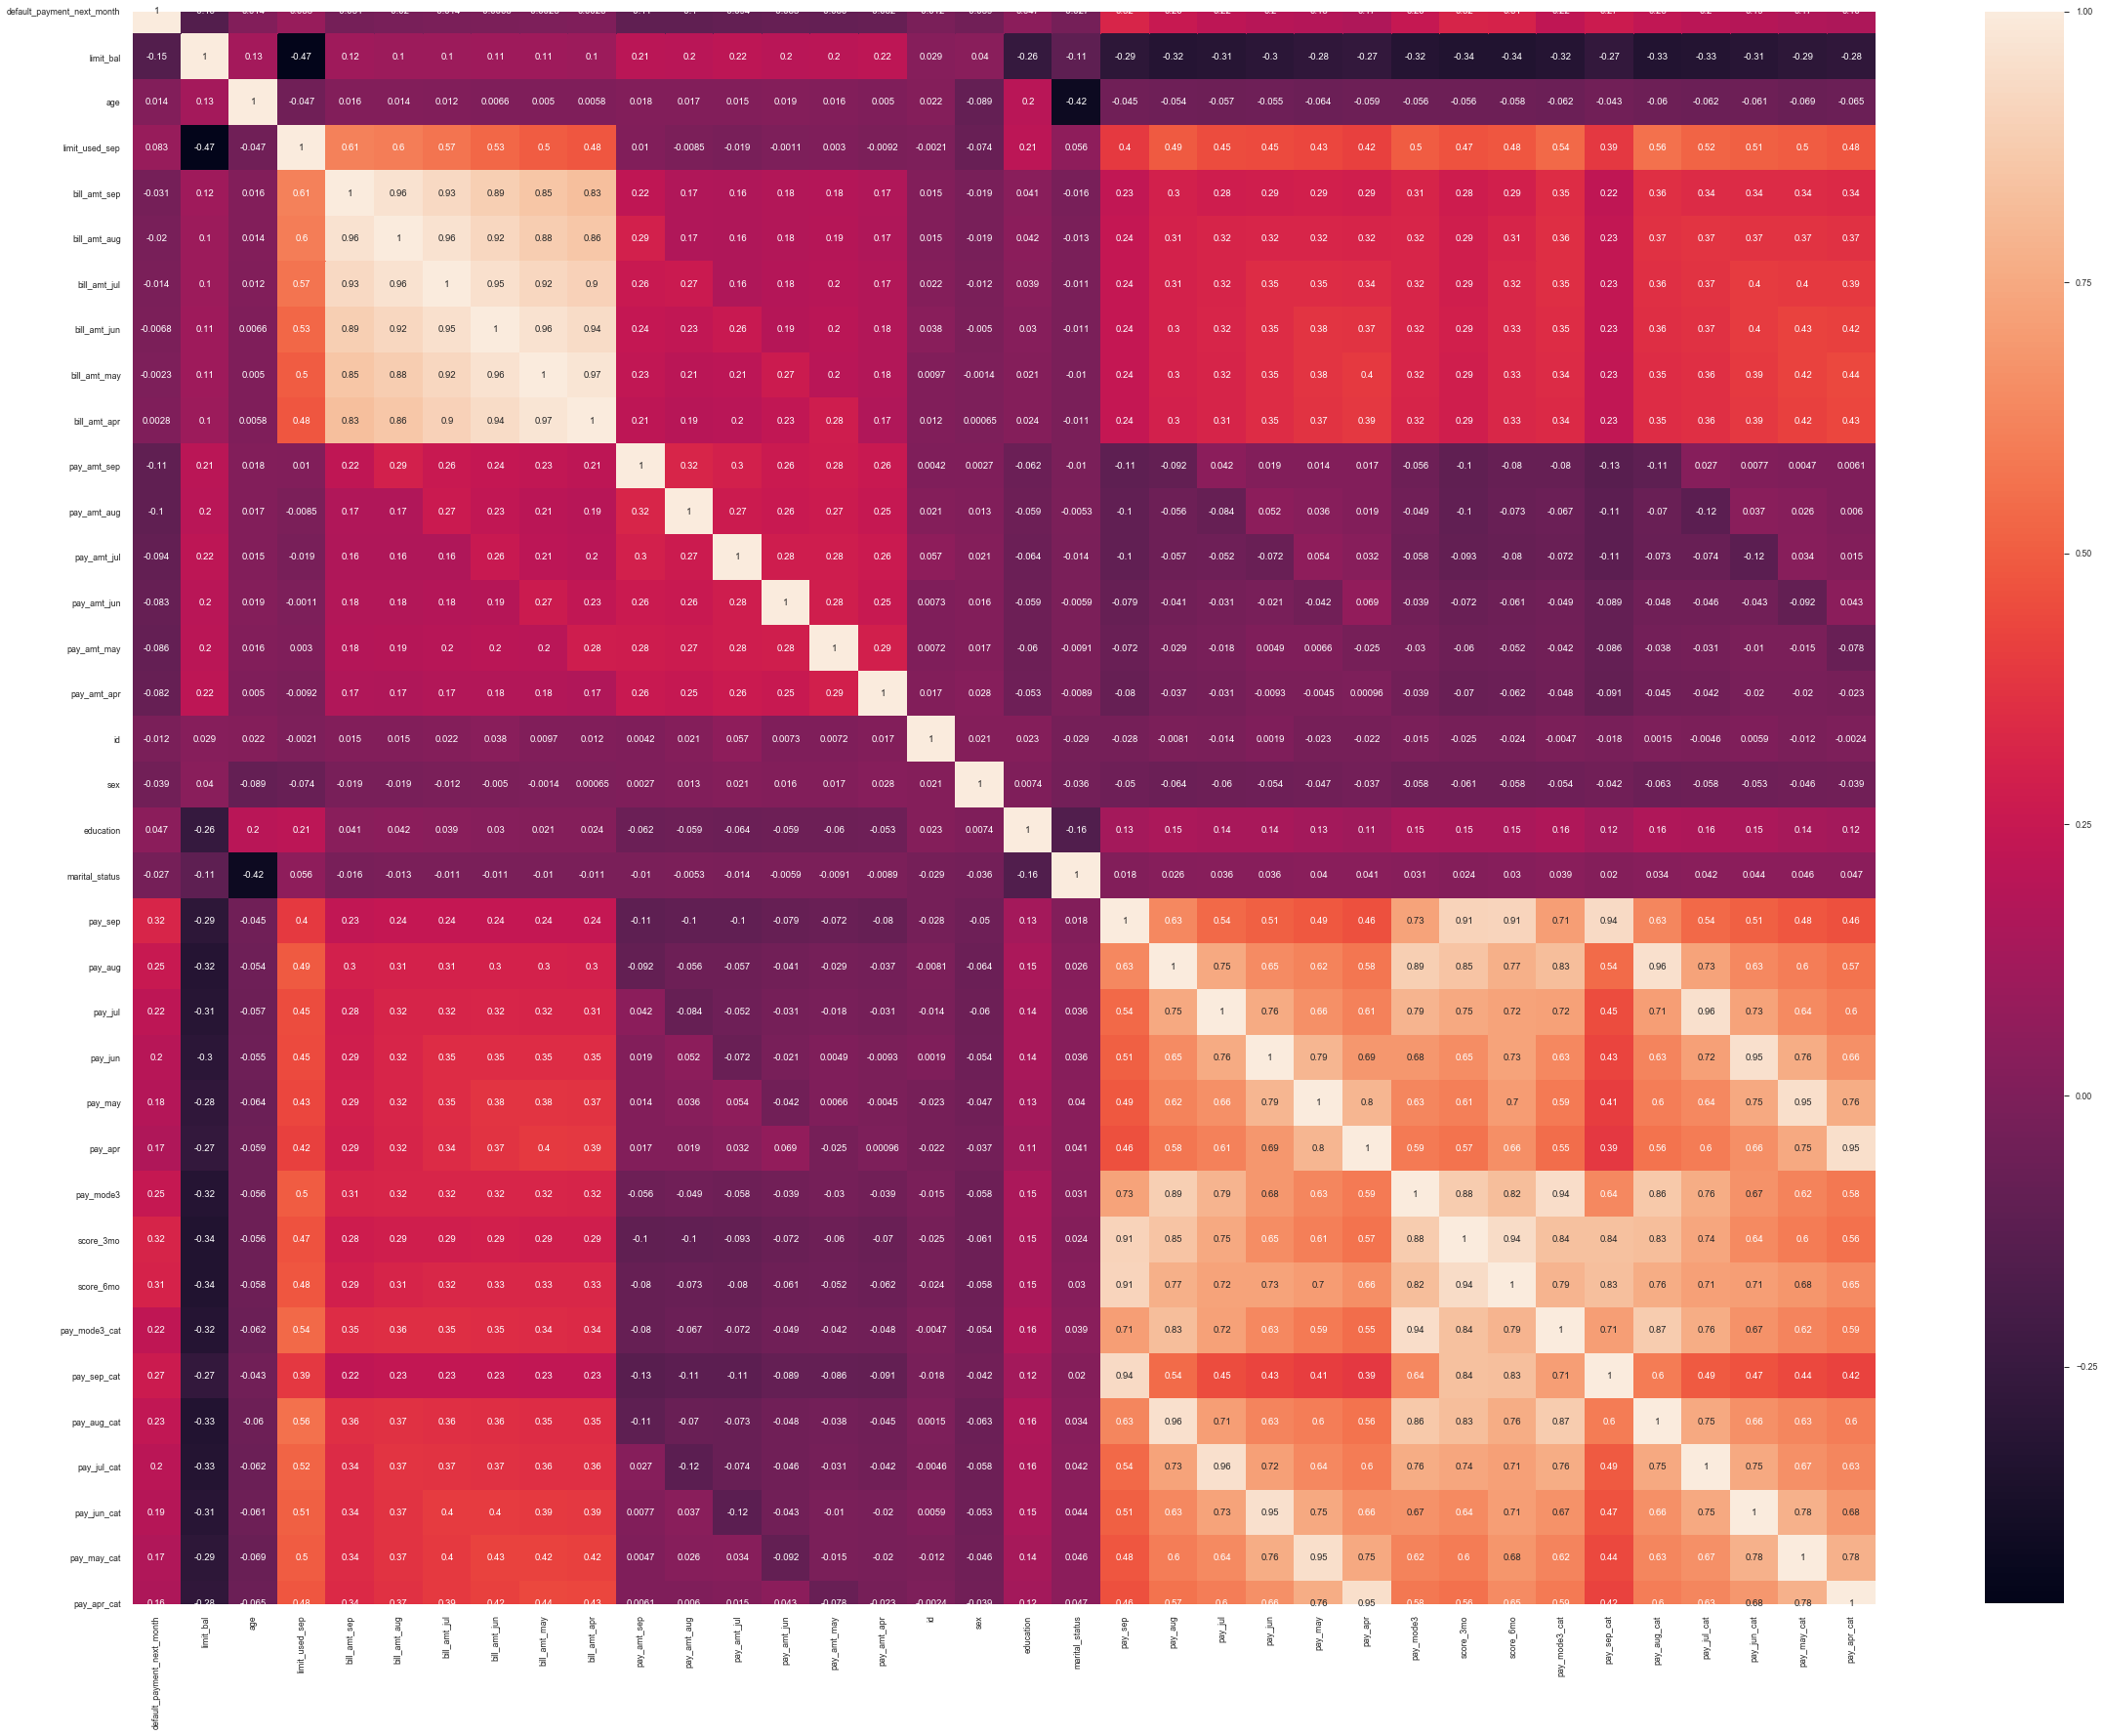

In [199]:
plt.figure(figsize=(40, 30))
sns.heatmap(data = df.corr(), annot=True);

In [200]:
print(df.drop(['pay_mode3', 'pay_mode3_cat', 'pay_sep_cat', 'pay_aug_cat',
       'pay_jul_cat', 'pay_jun_cat', 'pay_may_cat', 'pay_apr_cat', 'age_cat'],
        axis =1).corr()["default_payment_next_month"].sort_values(ascending=False).head(10))
df.drop(['pay_mode3', 'pay_mode3_cat', 'pay_sep_cat', 'pay_aug_cat',
       'pay_jul_cat', 'pay_jun_cat', 'pay_may_cat', 'pay_apr_cat', 'age_cat'],
        axis =1).corr()["default_payment_next_month"].sort_values(ascending=False).tail(5)

default_payment_next_month    1.000000
pay_sep                       0.317985
score_3mo                     0.315280
score_6mo                     0.306942
pay_aug                       0.250402
pay_jul                       0.216461
pay_jun                       0.196594
pay_may                       0.180250
pay_apr                       0.165087
limit_used_sep                0.083146
Name: default_payment_next_month, dtype: float64


pay_amt_may   -0.086105
pay_amt_jul   -0.094239
pay_amt_aug   -0.104902
pay_amt_sep   -0.107151
limit_bal     -0.147644
Name: default_payment_next_month, dtype: float64

#### Based on the above matrix:

-  'default_payment_next_month' has no strong correlation with any of the features.  Top: pay_sep, score_3mo, score_6mo
- 'pay_apr' to 'pay_sep' columns are highly correlated.
- 'bill_amt_apr' to 'bill_amt_sep' columns are highly correlated.

In [201]:
df.to_csv("df_cleaned.csv", index = False)

In [202]:
df = pd.read_csv("df_cleaned.csv")

#  Models

Our goal now is to build a model that can predict if a client will likely to default or not. We will focus on optimising F1 score and Recall:

$$F1 Score = 2 * (Precision * Recall) / (Precision + Recall)$$

$$Recall/TPR = TP / (TP+FN)$$

$$Precision = TP / (TP+FP)$$

Recall matters because of the False Negatives component i.e. predicted to not default but actually will. Not knowing will be risky (and costly) to the bank.

Note that thresholds of the models below will be set to default.  


In [118]:
results = pd.DataFrame(data = None, columns = ["name", "type", "baseline","f1_weighted", "f1_class_1", "precision_recall_auc", "recall"], index = range(0,10))

#### Logistic Regression. In this section, we will do the following:

- Preprocess the dataset:
    - Determine the categorical and continuous features then convert categorical to dummy variables.
    - Split the dataset into train and test.  Use SMOTE to deal with the class imbalance.
- Create a baseline model.
- Use SelectForModel for feature selection then run Logistic Regression again.
- Select features manually and run a model then compare the scores.
- Use GridSearchCV to tune the hyperparamaters.
- Select the best model and do sanity checks.

In [102]:
#Create categorical and continuous features column header lists
cat_columns = ['sex', 'education', 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'score_3mo', 'score_6mo']
cf_columns = ['age','limit_bal','limit_used_sep', 'bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
              'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr']

#Convert cat to dummies, split the data then run SMOTE
X, X_train_rs, X_test, y_train_rs, y_test = func.preprocess_data(df, cat_columns, cf_columns)

#Create a baseline model
logregbase = LogisticRegression()
baseline = cross_val_score(logregbase, X_train_rs, y_train_rs, cv=10, scoring = "f1_weighted")
mean_score = np.mean(baseline)
print(f"Mean Cross Validation Score: {mean_score :.2%}")

dummy variables created
split done
original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
Mean Cross Validation Score: 65.75%


In [104]:
#Convert cat to dummies, split the data then run SMOTE and SelectFromModel
selected, X_train_selected, X_test_selected, y_train, y_test = func.feature_selection_Logistic(df, cat_columns, cf_columns)

dummy variables created
split done
original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
scaling done
18  features selected out of  58


In [105]:
#Selected features by SelectFromModel
selected_list = [key for key, value in selected.items() if value == True]
selected_list

['limit_used_sep',
 'bill_amt_sep',
 'bill_amt_aug',
 'bill_amt_jul',
 'bill_amt_may',
 'bill_amt_apr',
 'pay_amt_sep',
 'pay_amt_aug',
 'pay_amt_jul',
 'pay_amt_may',
 'pay_amt_apr',
 'pay_sep_2',
 'pay_sep_3',
 'pay_aug_0',
 'pay_jul_1',
 'score_3mo_1',
 'score_3mo_3',
 'score_6mo_3']

---------------------------------------------------------------------
F1 score:  0.5066282420749281
Precision-Recall AUC: 0.521654378926123


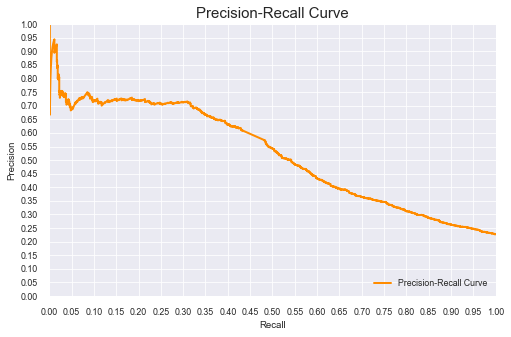

---------------------------------------------------------------------


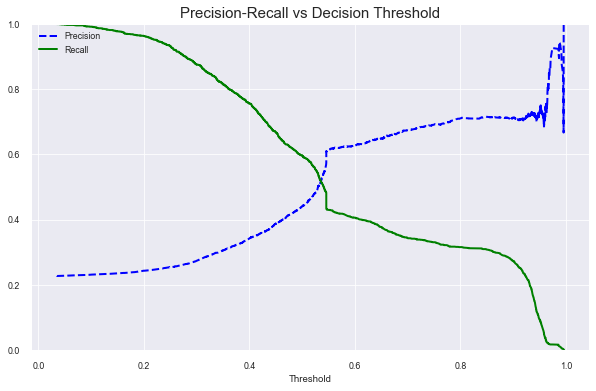

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      5067
           1       0.44      0.60      0.51      1474

    accuracy                           0.74      6541
   macro avg       0.65      0.69      0.66      6541
weighted avg       0.77      0.74      0.75      6541

---------------------------------------------------------------------
Normalized confusion matrix


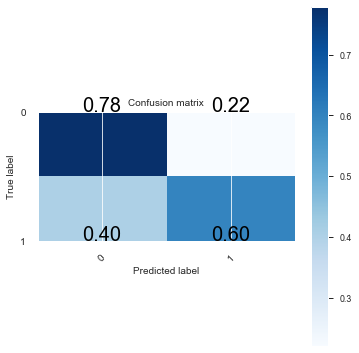

In [106]:
#Run logistic regression using the selected features
func.run_logistic(X_train_selected, X_test_selected, y_train, y_test)

In [119]:
i = 0
results.name[i] = "logreg model A"
results.type[i] = "logistic, 18 features out of 58, default hyperparameters"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.75
results.f1_class_1[i] = 0.51
results.precision_recall_auc[i] = 0.52
results.recall[i] = 0.60
results

name                                               type baseline  \
0  logreg model A  logistic, 18 features out of 58, default hyper...     0.66   
1             NaN                                                NaN      NaN   
2             NaN                                                NaN      NaN   
3             NaN                                                NaN      NaN   
4             NaN                                                NaN      NaN   
5             NaN                                                NaN      NaN   
6             NaN                                                NaN      NaN   
7             NaN                                                NaN      NaN   
8             NaN                                                NaN      NaN   
9             NaN                                                NaN      NaN   

  f1_weighted f1_class_1 precision_recall_auc recall  
0        0.75       0.51                 0.52    0.6  
1         NaN        NaN                  NaN    NaN  
2         NaN        NaN                  NaN    NaN  
3         NaN        NaN                  NaN    NaN  
4         NaN        NaN                  NaN    NaN  
5         NaN        NaN                  NaN    NaN  
6         NaN        NaN                  NaN    NaN  
7         NaN        NaN                  NaN    NaN  
8         NaN        NaN                  NaN    NaN  
9         NaN        NaN                  NaN    NaN

#### Findings

SelectFromModel selected 18 features out of 58. Precision-Recall AUC is 0.52 while recall is .60.  We will call this logreg model A.  Though our logreg model A's F1 weighted is higher than our baseline, it is still not very good at predicting class 1 (refer to classification report above).

We will then try to select features manually and see if the model will improve. This will be our logreg model B.

dummy variables created
split done
original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
scaling done
---------------------------------------------------------------------
F1 score:  0.5323329760628795
Precision-Recall AUC: 0.5213992435369941


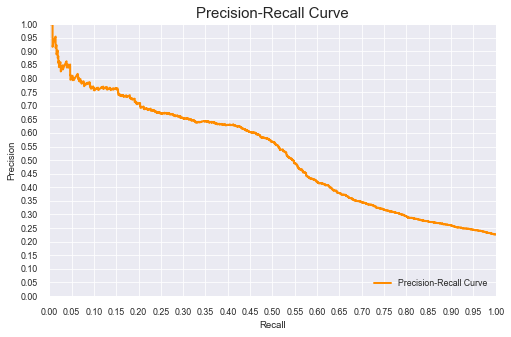

---------------------------------------------------------------------


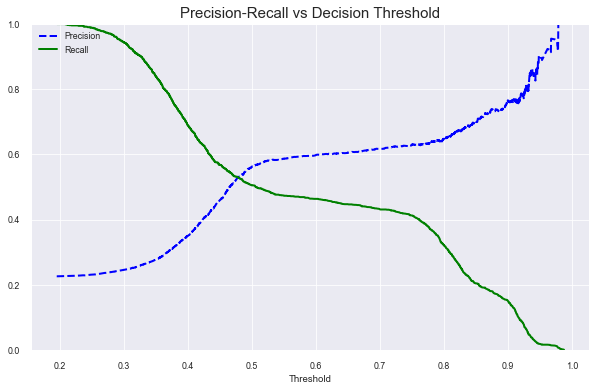

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      5067
           1       0.56      0.51      0.53      1474

    accuracy                           0.80      6541
   macro avg       0.71      0.70      0.70      6541
weighted avg       0.79      0.80      0.80      6541

---------------------------------------------------------------------
Normalized confusion matrix


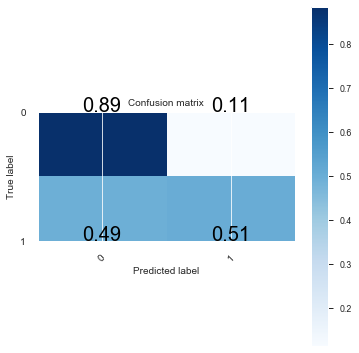

In [108]:
cat_columns = ['sex', 'education', 'marital_status', 'score_3mo', 'score_6mo']
cf_columns = ['age','limit_bal','limit_used_sep']

X, X_train_rs, X_test, y_train_rs, y_test = func.preprocess_data(df, cat_columns, cf_columns)
X_train_scaled, X_test_scaled = func.scale_X(X_train_rs, X_test)
func.run_logistic(X_train_scaled, X_test_scaled, y_train_rs, y_test)

In [120]:
i = 1
results.name[i] = "logreg model B"
results.type[i] = "logistic, manually selected features, default hyperparameters"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.80
results.f1_class_1[i] = 0.53
results.precision_recall_auc[i] = 0.52
results.recall[i] = 0.51
results

name                                               type baseline  \
0  logreg model A  logistic, 18 features out of 58, default hyper...     0.66   
1  logreg model B  logistic, manually selected features, default ...     0.66   
2             NaN                                                NaN      NaN   
3             NaN                                                NaN      NaN   
4             NaN                                                NaN      NaN   
5             NaN                                                NaN      NaN   
6             NaN                                                NaN      NaN   
7             NaN                                                NaN      NaN   
8             NaN                                                NaN      NaN   
9             NaN                                                NaN      NaN   

  f1_weighted f1_class_1 precision_recall_auc recall  
0        0.75       0.51                 0.52    0.6  
1         0.8       0.53                 0.52   0.51  
2         NaN        NaN                  NaN    NaN  
3         NaN        NaN                  NaN    NaN  
4         NaN        NaN                  NaN    NaN  
5         NaN        NaN                  NaN    NaN  
6         NaN        NaN                  NaN    NaN  
7         NaN        NaN                  NaN    NaN  
8         NaN        NaN                  NaN    NaN  
9         NaN        NaN                  NaN    NaN

#### Findings

Logreg model B, though better than our baseline, yielded lower recall compared to our logreg model A.

We will use logreg model A's features to tune the hyperparameters using GridSearchCV.

dummy variables created
split done
original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
scaling done
18  features selected out of  58
running gridsearch...
done!
---------------------------------------------------------------------
Best Parameters: {'C': 1, 'penalty': 'l1'}
---------------------------------------------------------------------
F1 score:  0.5056212164889018
Precision-Recall AUC: 0.5217546772923549


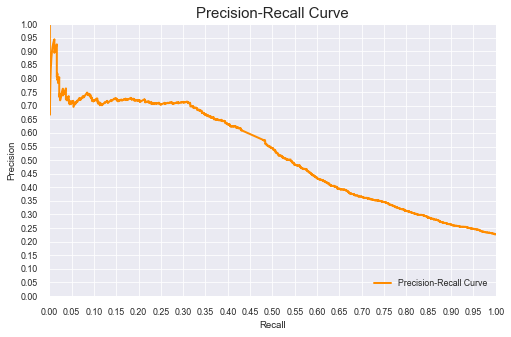

---------------------------------------------------------------------


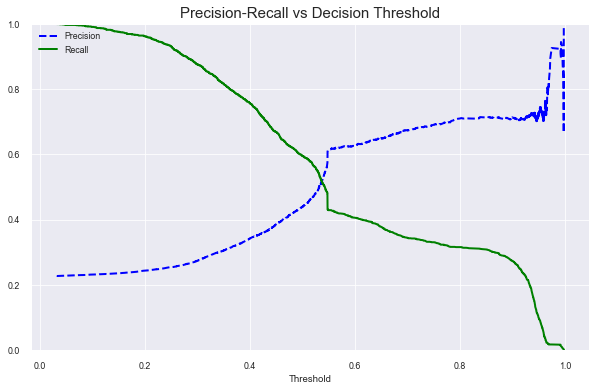

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      5067
           1       0.44      0.59      0.51      1474

    accuracy                           0.74      6541
   macro avg       0.65      0.69      0.66      6541
weighted avg       0.77      0.74      0.75      6541

---------------------------------------------------------------------
Normalized confusion matrix


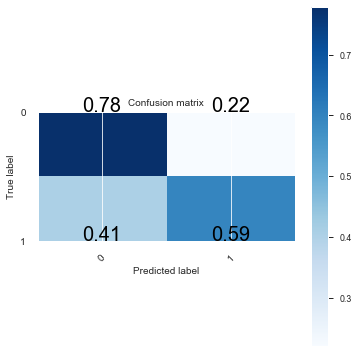

In [110]:
#Again, convert cat to dummies, split the data then run SMOTE and SelectFromModel
cat_columns = ['sex', 'education', 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'score_3mo', 'score_6mo']
cf_columns = ['age','limit_bal','limit_used_sep', 'bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
              'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr']

selected, X_train_selected, X_test_selected, y_train, y_test = func.feature_selection_Logistic(df, cat_columns, cf_columns)

#Create an instance of LogisticRegression
logregGS = LogisticRegression()

#Create hyperparameter options
param_grid = dict(C=[0.1, 0.25, 0.5, 1, 10, 100, 1000, 10000, 100000], penalty=['l1', 'l2'])

#Run GridSearchCV
cv_results_top10, best_model = func.run_GridSearchCV(X_train_selected, X_test_selected, y_train, y_test, logregGS, param_grid, scoring = "f1_weighted", cv = 10)

In [111]:
cv_results_top10

rank_test_score                          params  mean_train_score  \
6                 1       {'C': 1, 'penalty': 'l1'}          0.720061   
7                 2       {'C': 1, 'penalty': 'l2'}          0.719973   
9                 3      {'C': 10, 'penalty': 'l2'}          0.720253   
8                 4      {'C': 10, 'penalty': 'l1'}          0.720222   
4                 5     {'C': 0.5, 'penalty': 'l1'}          0.719799   
15                6   {'C': 10000, 'penalty': 'l2'}          0.720274   
17                6  {'C': 100000, 'penalty': 'l2'}          0.720267   
14                8   {'C': 10000, 'penalty': 'l1'}          0.720260   
13                9    {'C': 1000, 'penalty': 'l2'}          0.720263   
10               10     {'C': 100, 'penalty': 'l1'}          0.720256   

    std_train_score  mean_test_score  std_test_score  
6          0.002067         0.719892        0.021582  
7          0.002056         0.719867        0.021412  
9          0.002141         0.719724        0.021938  
8          0.002152         0.719631        0.021876  
4          0.002008         0.719540        0.021323  
15         0.002159         0.719469        0.021917  
17         0.002164         0.719469        0.021917  
14         0.002145         0.719437        0.021728  
13         0.002150         0.719436        0.021876  
10         0.002130         0.719435        0.021805

In [121]:
i = 2
results.name[i] = "logreg gridsearchcv #1"
results.type[i] = "logistic, {'C': 1, 'penalty': 'l1'}"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.75
results.f1_class_1[i] = 0.51
results.precision_recall_auc[i] = 0.52
results.recall[i] = 0.59
results

name                                               type  \
0          logreg model A  logistic, 18 features out of 58, default hyper...   
1          logreg model B  logistic, manually selected features, default ...   
2  logreg gridsearchcv #1                logistic, {'C': 1, 'penalty': 'l1'}   
3                     NaN                                                NaN   
4                     NaN                                                NaN   
5                     NaN                                                NaN   
6                     NaN                                                NaN   
7                     NaN                                                NaN   
8                     NaN                                                NaN   
9                     NaN                                                NaN   

  baseline f1_weighted f1_class_1 precision_recall_auc recall  
0     0.66        0.75       0.51                 0.52    0.6  
1     0.66         0.8       0.53                 0.52   0.51  
2     0.66        0.75       0.51                 0.52   0.59  
3      NaN         NaN        NaN                  NaN    NaN  
4      NaN         NaN        NaN                  NaN    NaN  
5      NaN         NaN        NaN                  NaN    NaN  
6      NaN         NaN        NaN                  NaN    NaN  
7      NaN         NaN        NaN                  NaN    NaN  
8      NaN         NaN        NaN                  NaN    NaN  
9      NaN         NaN        NaN                  NaN    NaN

---------------------------------------------------------------------
F1 score:  0.5053298761163929
Precision-Recall AUC: 0.5214569785380057


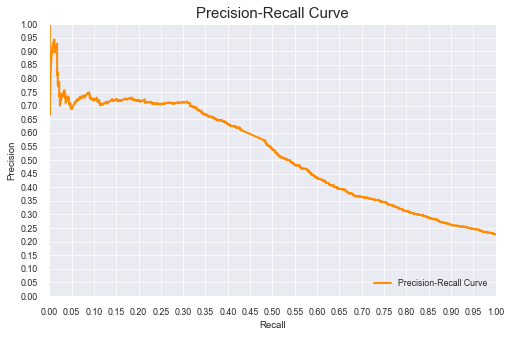

---------------------------------------------------------------------


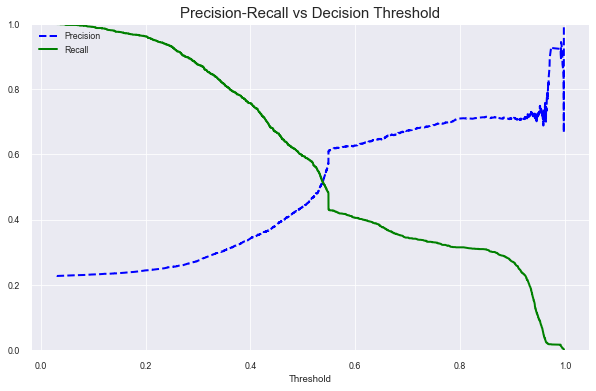

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      5067
           1       0.44      0.59      0.51      1474

    accuracy                           0.74      6541
   macro avg       0.65      0.69      0.66      6541
weighted avg       0.77      0.74      0.75      6541

---------------------------------------------------------------------
Normalized confusion matrix


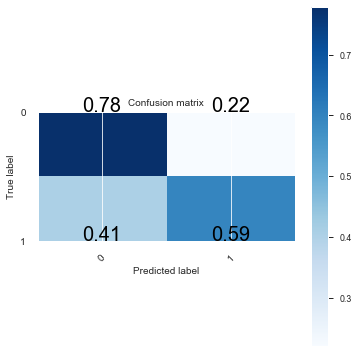

In [114]:
func.run_logistic(X_train_selected, X_test_selected, y_train, y_test,  C=10, penalty = 'l2')

In [122]:
i = 3
results.name[i] = "logreg gridsearchcv #3"
results.type[i] = "logistic, {'C': 10, 'penalty': 'l2'}"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.75
results.f1_class_1[i] = 0.51
results.precision_recall_auc[i] = 0.52
results.recall[i] = 0.59
results

name                                               type  \
0          logreg model A  logistic, 18 features out of 58, default hyper...   
1          logreg model B  logistic, manually selected features, default ...   
2  logreg gridsearchcv #1                logistic, {'C': 1, 'penalty': 'l1'}   
3  logreg gridsearchcv #3               logistic, {'C': 10, 'penalty': 'l2'}   
4                     NaN                                                NaN   
5                     NaN                                                NaN   
6                     NaN                                                NaN   
7                     NaN                                                NaN   
8                     NaN                                                NaN   
9                     NaN                                                NaN   

  baseline f1_weighted f1_class_1 precision_recall_auc recall  
0     0.66        0.75       0.51                 0.52    0.6  
1     0.66         0.8       0.53                 0.52   0.51  
2     0.66        0.75       0.51                 0.52   0.59  
3     0.66        0.75       0.51                 0.52   0.59  
4      NaN         NaN        NaN                  NaN    NaN  
5      NaN         NaN        NaN                  NaN    NaN  
6      NaN         NaN        NaN                  NaN    NaN  
7      NaN         NaN        NaN                  NaN    NaN  
8      NaN         NaN        NaN                  NaN    NaN  
9      NaN         NaN        NaN                  NaN    NaN

#### Findings

After running GridSearchCV, our best model is the one that uses L1 norm and C = 1.

Top 10 models yielded similar mean F1 weighted scores.  We tried using L2 norm with C = 10 and got similar results. We ignored the higher C as these models are less regularized.

It's worth noting that the scores are very similar to our logreg model A (hyperparameters set to default, C = 1, penalty = l2).

#### Support Vector Classification. In this section, we will:

- Preprocess the datase:
    - Determine the categorical and continuous features then convert categorical to dummy variables.
    - Split the dataset into train and test.  Use SMOTE to deal with the class imbalance.
- Create a baseline model.
- Use GridSearchCV to tune the hyperparamaters.
- Select the best model and do sanity checks.

In [127]:
#Create X column header lists
X_columns = ['sex', 'education', "age", 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
             'limit_bal','limit_used_sep', 'score_3mo', 'score_6mo', 'bill_amt_sep', 'bill_amt_aug','bill_amt_jul',
             'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
             'pay_amt_may', 'pay_amt_apr']

X = df[X_columns]
y = df[["default_payment_next_month"]]

#Convert cat to dummies, split the data then run SMOTE
X, X_train_rs, X_test, y_train_rs, y_test = func.split_resample(X,y)
X_train_scaled, X_test_scaled = func.scale_X(X_train_rs, X_test)

split done
original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
scaling done


In [129]:
#Create a baseline model
svc = SVC()
baseline = cross_val_score(svc, X_train_scaled, y_train_rs, cv=5, scoring = "f1_weighted")
mean_score = np.mean(baseline)
print(f"Mean Cross Validation Score: {mean_score :.2%}")

Mean Cross Validation Score: 70.27%


---------------------------------------------------------------------
F1 score:  0.5143242332322211
Precision-Recall AUC: 0.5139681820838902


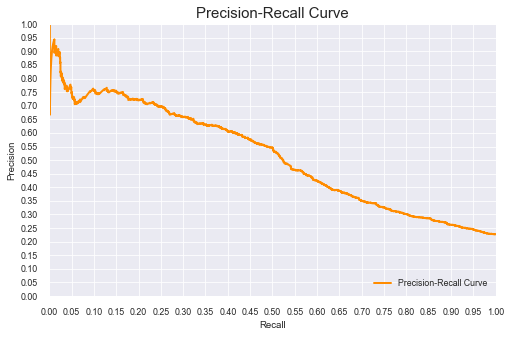

---------------------------------------------------------------------


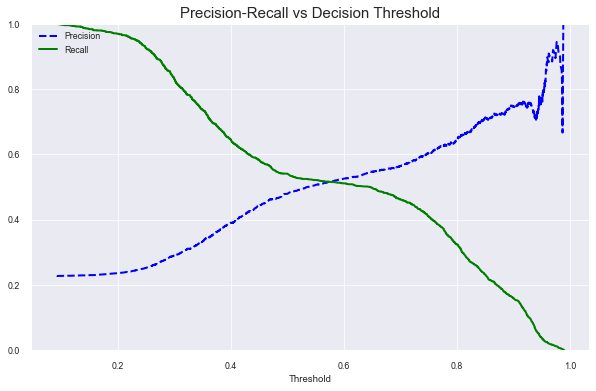

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5067
           1       0.51      0.52      0.51      1474

    accuracy                           0.78      6541
   macro avg       0.69      0.69      0.69      6541
weighted avg       0.78      0.78      0.78      6541

---------------------------------------------------------------------
Normalized confusion matrix


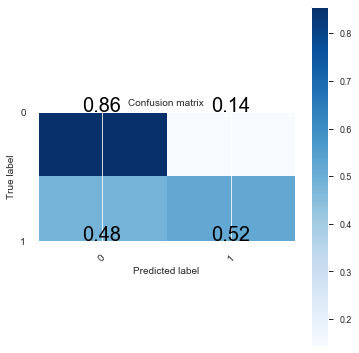

In [130]:
svc = SVC(max_iter=100000,probability=True)
svc.fit(X_train_scaled, y_train_rs)
func.get_scores(svc, X_train_scaled, X_test_scaled, y_train_rs, y_test)

In [204]:
i = 7
results.name[i] = "svc model A"
results.type[i] = "svm, hyperparameters set to default"
results.baseline[i] = 0.70
results.f1_weighted[i] = 0.78
results.f1_class_1[i] = 0.51
results.precision_recall_auc[i] = 0.52
results.recall[i] = 0.52
results

name  \
0              logreg model A   
1              logreg model B   
2      logreg gridsearchcv #1   
3      logreg gridsearchcv #3   
4          pca logreg model A   
5  pca logreg gridsearchcv #1   
6  pca logreg gridsearchcv #2   
7                 svc model A   
8                         NaN   
9                         NaN   

                                                type baseline f1_weighted  \
0  logistic, 18 features out of 58, default hyper...     0.66        0.75   
1  logistic, manually selected features, default ...     0.66         0.8   
2                logistic, {'C': 1, 'penalty': 'l1'}     0.66        0.75   
3               logistic, {'C': 10, 'penalty': 'l2'}     0.66        0.75   
4                pca logreg, default hyperparameters     0.66        0.77   
5            pca logreg {'C': 0.25, 'penalty': 'l1'}     0.66        0.77   
6             pca logreg {'C': 0.5, 'penalty': 'l2'}     0.66        0.77   
7                svm, hyperparameters set to default      0.7        0.78   
8                                                NaN      NaN         NaN   
9                                                NaN      NaN         NaN   

  f1_class_1 precision_recall_auc recall  
0       0.51                 0.52    0.6  
1       0.53                 0.52   0.51  
2       0.51                 0.52   0.59  
3       0.51                 0.52   0.59  
4       0.52                 0.53   0.57  
5       0.52                 0.53   0.57  
6       0.52                 0.53   0.57  
7       0.51                 0.52   0.52  
8        NaN                  NaN    NaN  
9        NaN                  NaN    NaN

#### Findings

The above model, where we did not define C and gamma, (let's call it SVC model A) gave better results than the baseline model.

We will now try to tune the hyperparameters C and gamma and get the best model.

split done
original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
scaling done
running gridsearch...
done!
---------------------------------------------------------------------
Best Parameters: {'C': 1, 'gamma': 1}
---------------------------------------------------------------------
F1 score:  0.5246142542248347
Precision-Recall AUC: 0.5142565435821829


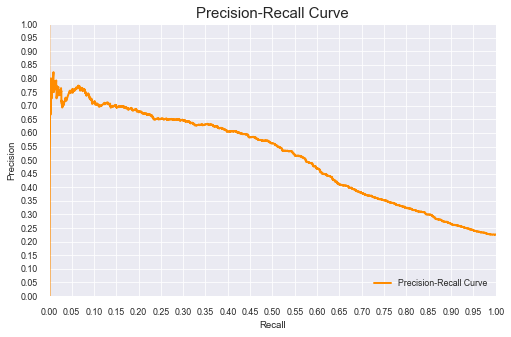

---------------------------------------------------------------------


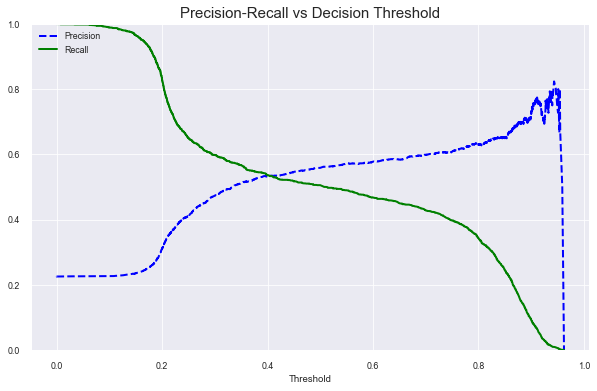

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      5067
           1       0.57      0.48      0.52      1474

    accuracy                           0.80      6541
   macro avg       0.71      0.69      0.70      6541
weighted avg       0.79      0.80      0.80      6541

---------------------------------------------------------------------
Normalized confusion matrix


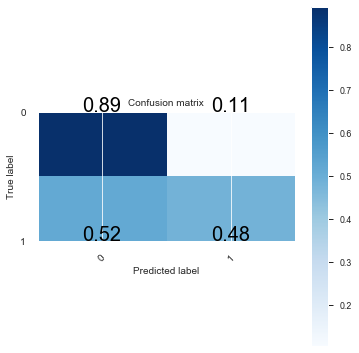

In [131]:
#Create X column header lists
X_columns = ['sex', 'education', "age", 'marital_status','pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
             'limit_bal','limit_used_sep', 'score_3mo', 'score_6mo', 'bill_amt_sep', 'bill_amt_aug','bill_amt_jul',
             'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
             'pay_amt_may', 'pay_amt_apr']

X = df[X_columns]
y = df[["default_payment_next_month"]]

#Convert cat to dummies, split the data then run SMOTE
X, X_train_rs, X_test, y_train_rs, y_test = func.split_resample(X,y)
X_train_scaled, X_test_scaled = func.scale_X(X_train_rs, X_test)

#Create an instance of LogisticRegression
svcGS = SVC(max_iter=100000,probability=True)

#Create hyperparameter options
param_grid = dict(C = [10**i for i in range(-1,1)], gamma = [10**i for i in range(-1,1)])


#Run GridSearchCV
cv_results_top10, best_model = func.run_GridSearchCV(X_train_scaled, X_test_scaled, y_train_rs, y_test,
                                                     svcGS, param_grid, scoring = "f1_weighted", cv = 5)

In [203]:
cv_results_top10

rank_test_score                    params  mean_train_score  \
3                1      {'C': 1, 'gamma': 1}          0.811278   
1                2    {'C': 0.1, 'gamma': 1}          0.767954   
2                3    {'C': 1, 'gamma': 0.1}          0.752970   
0                4  {'C': 0.1, 'gamma': 0.1}          0.701748   

   std_train_score  mean_test_score  std_test_score  
3         0.018113         0.793453        0.069310  
1         0.012062         0.759995        0.051981  
2         0.014410         0.744753        0.043298  
0         0.008025         0.697660        0.014115

In [205]:
i = 8
results.name[i] = "svc gridsearchcv #1"
results.type[i] = "svm {'C': 1, 'gamma': 1}"
results.baseline[i] = 0.70
results.f1_weighted[i] = 0.80
results.f1_class_1[i] = 0.52
results.precision_recall_auc[i] = 0.51
results.recall[i] = 0.48
results

name  \
0              logreg model A   
1              logreg model B   
2      logreg gridsearchcv #1   
3      logreg gridsearchcv #3   
4          pca logreg model A   
5  pca logreg gridsearchcv #1   
6  pca logreg gridsearchcv #2   
7                 svc model A   
8         svc gridsearchcv #1   
9                         NaN   

                                                type baseline f1_weighted  \
0  logistic, 18 features out of 58, default hyper...     0.66        0.75   
1  logistic, manually selected features, default ...     0.66         0.8   
2                logistic, {'C': 1, 'penalty': 'l1'}     0.66        0.75   
3               logistic, {'C': 10, 'penalty': 'l2'}     0.66        0.75   
4                pca logreg, default hyperparameters     0.66        0.77   
5            pca logreg {'C': 0.25, 'penalty': 'l1'}     0.66        0.77   
6             pca logreg {'C': 0.5, 'penalty': 'l2'}     0.66        0.77   
7                svm, hyperparameters set to default      0.7        0.78   
8                           svm {'C': 1, 'gamma': 1}      0.7         0.8   
9                                                NaN      NaN         NaN   

  f1_class_1 precision_recall_auc recall  
0       0.51                 0.52    0.6  
1       0.53                 0.52   0.51  
2       0.51                 0.52   0.59  
3       0.51                 0.52   0.59  
4       0.52                 0.53   0.57  
5       0.52                 0.53   0.57  
6       0.52                 0.53   0.57  
7       0.51                 0.52   0.52  
8       0.52                 0.51   0.48  
9        NaN                  NaN    NaN

GridSearchCV's best model yielded almost similar result as SVC model A, however recall dropped to 0.48.

Let's try using rank 2's params {'C': 0.1, 'gamma': 1}.

---------------------------------------------------------------------
F1 score:  0.5222790357925493
Precision-Recall AUC: 0.514943154856513


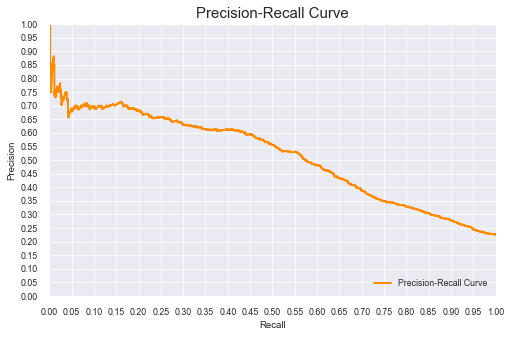

---------------------------------------------------------------------


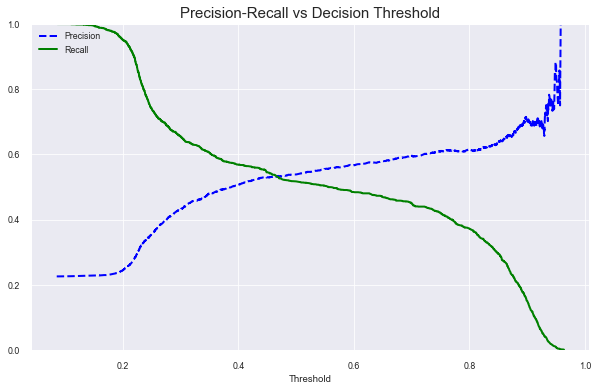

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      5067
           1       0.57      0.49      0.52      1474

    accuracy                           0.80      6541
   macro avg       0.71      0.69      0.70      6541
weighted avg       0.79      0.80      0.79      6541

---------------------------------------------------------------------
Normalized confusion matrix


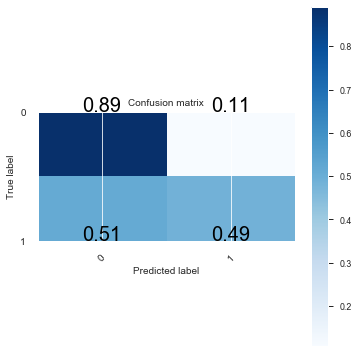

In [206]:
svc = SVC(max_iter=100000,probability=True, C = 0.1, gamma = 1)
svc.fit(X_train_scaled, y_train_rs)
func.get_scores(svc, X_train_scaled, X_test_scaled, y_train_rs, y_test)

In [207]:
i = 9
results.name[i] = "svc gridsearchcv #2"
results.type[i] = "svm {'C': 0.1, 'gamma': 1}"
results.baseline[i] = 0.70
results.f1_weighted[i] = 0.79
results.f1_class_1[i] = 0.52
results.precision_recall_auc[i] = 0.51
results.recall[i] = 0.49
results

name  \
0              logreg model A   
1              logreg model B   
2      logreg gridsearchcv #1   
3      logreg gridsearchcv #3   
4          pca logreg model A   
5  pca logreg gridsearchcv #1   
6  pca logreg gridsearchcv #2   
7                 svc model A   
8         svc gridsearchcv #1   
9         svc gridsearchcv #2   

                                                type baseline f1_weighted  \
0  logistic, 18 features out of 58, default hyper...     0.66        0.75   
1  logistic, manually selected features, default ...     0.66         0.8   
2                logistic, {'C': 1, 'penalty': 'l1'}     0.66        0.75   
3               logistic, {'C': 10, 'penalty': 'l2'}     0.66        0.75   
4                pca logreg, default hyperparameters     0.66        0.77   
5            pca logreg {'C': 0.25, 'penalty': 'l1'}     0.66        0.77   
6             pca logreg {'C': 0.5, 'penalty': 'l2'}     0.66        0.77   
7                svm, hyperparameters set to default      0.7        0.78   
8                           svm {'C': 1, 'gamma': 1}      0.7         0.8   
9                         svm {'C': 0.1, 'gamma': 1}      0.7        0.79   

  f1_class_1 precision_recall_auc recall  
0       0.51                 0.52    0.6  
1       0.53                 0.52   0.51  
2       0.51                 0.52   0.59  
3       0.51                 0.52   0.59  
4       0.52                 0.53   0.57  
5       0.52                 0.53   0.57  
6       0.52                 0.53   0.57  
7       0.51                 0.52   0.52  
8       0.52                 0.51   0.48  
9       0.52                 0.51   0.49

GridSearchCV did not produce a better model with the small range of hyperparameters.

Unfortunately, we wont be able to optimise this model as defining a wider range for C and gamma will take much longer i.e. computationally intensive.

NOTE: There was an attempt to run for several values of C and gamma and 3 different kernels but it was unsuccessful.

#### Principal Component Analysis. In this section, we will:

- Preprocess the datase:
    - Determine the categorical and continuous features.
    - Run PCA on the continuous features with high correlation.
    - Convert categorical to dummy variables.
    - Split the dataset into train and test.  Use SMOTE to deal with the class imbalance.
- Run a Logistic Regression model.
- Use GridSearchCV to tune the hyperparamaters.
- Select the best model and do sanity checks.

In [57]:
#Create a new df X_PCA that will have all the cf that are similar / highly correlated based on the heatmap above
X_PCA = df[['bill_amt_sep', 'bill_amt_aug','bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr','pay_amt_sep',
            'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun','pay_amt_may', 'pay_amt_apr']]

#Also create dfs for y and categorical and cf that are not part of the PCA
y = df[["default_payment_next_month"]]
X_cat = df[['sex', 'education','marital_status', 'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may','pay_apr']]
X_cf = df[['limit_bal', 'age', 'limit_used_sep', 'score_3mo', 'score_6mo']]

In [58]:
#Scale X_PCA and X_cf
X_cf_scaled = MinMaxScaler().fit_transform(X_cf)
X_cf_scaled = pd.DataFrame(X_cf_scaled, index=X_cf.index, columns = list(X_cf.columns))
X_PCA_scaled = MinMaxScaler().fit_transform(X_PCA)

In [59]:
#Run PCA on the X_PCA_scaled
fitpca = PCA()
pca = fitpca.fit_transform(X_PCA_scaled)

In [60]:
#Check the percentage of variance explained by each cf selected for PCA.
pd.Series(data = fitpca.explained_variance_ratio_, index = range(1, 13))

1     0.670292
2     0.102714
3     0.042986
4     0.039050
5     0.037658
6     0.035870
7     0.029988
8     0.027385
9     0.006803
10    0.003431
11    0.002136
12    0.001688
dtype: float64

#### Findings

We will be using the first 2 principal components as these explained 77% of the variation.

In [61]:
#Turn the pca array into df
pca = pd.DataFrame(pca[:, :2], index=X_PCA.index)
pca.rename(columns={0:'c1',1:'c2'}, inplace=True)
pca

c1        c2
0     -0.300588 -0.089960
1     -0.283685 -0.060421
2     -0.157840 -0.040847
3      0.013985 -0.089498
4     -0.107010  0.213014
...         ...       ...
26156 -0.282439 -0.081922
26157  0.351540 -0.037074
26158  0.749493 -0.046686
26159 -0.266536  0.000567
26160  0.018275 -0.091184

[26161 rows x 2 columns]

In [62]:
#Check the component
vects = fitpca.components_[:2]

In [63]:
pd.DataFrame(data = vects, columns = X_PCA.columns, index = pca.columns).T

c1        c2
bill_amt_sep  0.465604 -0.136046
bill_amt_aug  0.389255 -0.090171
bill_amt_jul  0.416111 -0.077392
bill_amt_jun  0.404624 -0.042549
bill_amt_may  0.393579 -0.023419
bill_amt_apr  0.335229 -0.014862
pay_amt_sep   0.082805  0.415333
pay_amt_aug   0.058536  0.304821
pay_amt_jul   0.064442  0.419235
pay_amt_jun   0.070174  0.435887
pay_amt_may   0.069811  0.435091
pay_amt_apr   0.057516  0.379887

#### Findings

c1's high component are the bill_amt columns while c2's pay_amt columns

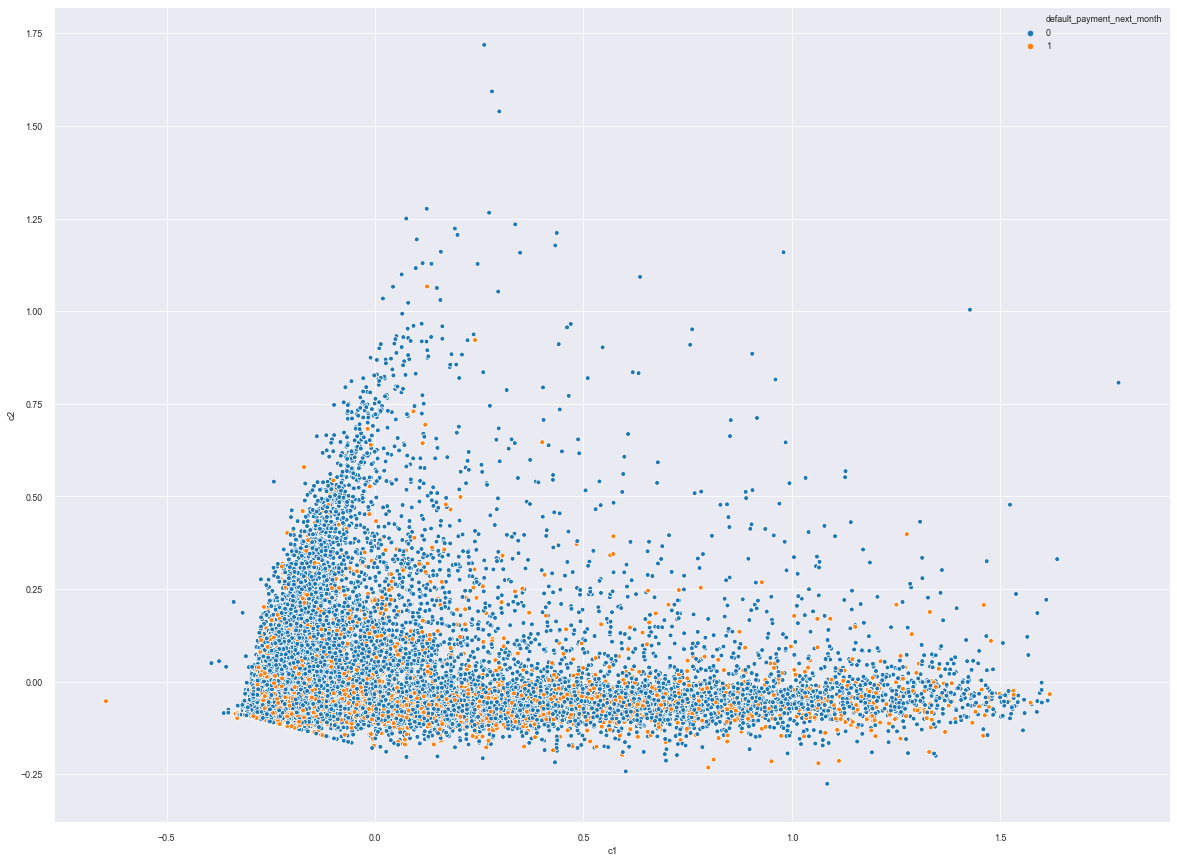

In [65]:
X_pca = pd.concat([pca, X_cf_scaled, X_cat], axis = 1)
df_pca = pd.concat([X_pca, y], axis = 1)
plt.figure(figsize = (20, 15))
sns.scatterplot(data = df_pca, x = "c1", y = "c2", hue = "default_payment_next_month");

#### Findings

The above does not show any clustering so adding c1 and c2 may not improve our model.

We will still try to run a Logistic regression and see if it will yield a better result that our best model above.

In [66]:
#Convert the categorical columns to dummy variables
X_pca = pd.get_dummies(X_pca, columns = list(X_cat.columns), drop_first=True, dtype=float)
X_pca

c1        c2  limit_bal       age  limit_used_sep  score_3mo  \
0     -0.300588 -0.089960   0.018519  0.071429        0.226551        0.6   
1     -0.283685 -0.060421   0.203704  0.119048        0.134507        0.4   
2     -0.157840 -0.040847   0.148148  0.309524        0.295187        0.4   
3      0.013985 -0.089498   0.074074  0.380952        0.621787        0.4   
4     -0.107010  0.213014   0.074074  0.857143        0.214170        0.2   
...         ...       ...        ...       ...             ...        ...   
26156 -0.282439 -0.081922   0.000000  0.523810        0.590132        0.4   
26157  0.351540 -0.037074   0.129630  0.309524        0.604346        0.8   
26158  0.749493 -0.046686   0.388889  0.428571        0.578795        0.4   
26159 -0.266536  0.000567   0.259259  0.523810        0.128596        0.2   
26160  0.018275 -0.091184   0.074074  0.595238        0.631761        0.4   

       score_6mo  sex_2  education_2  education_3  marital_status_2  \
0            0.6    1.0          1.0          0.0               0.0   
1            0.4    1.0          1.0          0.0               1.0   
2            0.4    1.0          1.0          0.0               1.0   
3            0.4    1.0          1.0          0.0               0.0   
4            0.2    0.0          1.0          0.0               0.0   
...          ...    ...          ...          ...               ...   
26156        0.2    0.0          0.0          1.0               0.0   
26157        0.8    0.0          1.0          0.0               1.0   
26158        0.4    0.0          0.0          1.0               0.0   
26159        0.2    0.0          0.0          1.0               1.0   
26160        0.4    0.0          1.0          0.0               0.0   

       marital_status_3  pay_sep_-1  pay_sep_0  pay_sep_1  pay_sep_2  \
0                   0.0         0.0        0.0        0.0        1.0   
1                   0.0         1.0        0.0        0.0        0.0   
2                   0.0         0.0        1.0        0.0        0.0   
3                   0.0         0.0        1.0        0.0        0.0   
4                   0.0         1.0        0.0        0.0        0.0   
...                 ...         ...        ...        ...        ...   
26156               0.0         0.0        1.0        0.0        0.0   
26157               0.0         0.0        0.0        0.0        1.0   
26158               0.0         0.0        1.0        0.0        0.0   
26159               0.0         1.0        0.0        0.0        0.0   
26160               0.0         0.0        1.0        0.0        0.0   

       pay_sep_3  pay_aug_-1  pay_aug_0  pay_aug_1  pay_aug_2  pay_aug_3  \
0            0.0         0.0        0.0        0.0        1.0        0.0   
1            0.0         0.0        0.0        0.0        1.0        0.0   
2            0.0         0.0        1.0        0.0        0.0        0.0   
3            0.0         0.0        1.0        0.0        0.0        0.0   
4            0.0         0.0        1.0        0.0        0.0        0.0   
...          ...         ...        ...        ...        ...        ...   
26156        0.0         0.0        1.0        0.0        0.0        0.0   
26157        0.0         0.0        0.0        0.0        1.0        0.0   
26158        0.0         0.0        1.0        0.0        0.0        0.0   
26159        0.0         1.0        0.0        0.0        0.0        0.0   
26160        0.0         0.0        1.0        0.0        0.0        0.0   

       pay_jul_-1  pay_jul_0  pay_jul_1  pay_jul_2  pay_jul_3  pay_jun_-1  \
0             1.0        0.0        0.0        0.0        0.0         1.0   
1             0.0        1.0        0.0        0.0        0.0         0.0   
2             0.0        1.0        0.0        0.0        0.0         0.0   
3             0.0        1.0        0.0        0.0        0.0         0.0   
4             1.0        0.0        0.0        0.0        0.0         0.

In [73]:
#We will now run a Logistic Regression model using the above X_pca
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

#Run SMOTE to handle the class imbalance
smote = SMOTE(sampling_strategy = "not majority", random_state = 42)
X_train_rs, y_train_rs = smote.fit_sample(X_train, y_train)
print('original class distribution:')
print(y["default_payment_next_month"].value_counts())
print('synthetic sample class distribution:')
print(pd.Series(y_train_rs).value_counts()) 

#Run SelectFromModel for feature selection
selector = SelectFromModel(LogisticRegression(fit_intercept=True))
selector.fit(X_train_rs, y_train_rs)
selected_feat = list(X_pca.columns[(selector.get_support())])
selected = dict(zip((list(X_pca.columns)), list(selector.get_support())))
X_train_selected = selector.transform(X_train_rs)
X_test_selected = selector.transform(X_test)
print(sum(selector.get_support())," features selected out of ", len(list(X_pca.columns)))
selected_list = [key for key, value in selected.items() if value == True]

original class distribution:
0    20256
1     5905
Name: default_payment_next_month, dtype: int64
synthetic sample class distribution:
1    15189
0    15189
dtype: int64
10  features selected out of  40


['c2',
 'limit_bal',
 'limit_used_sep',
 'score_3mo',
 'pay_sep_-1',
 'pay_sep_1',
 'pay_sep_2',
 'pay_sep_3',
 'pay_aug_1',
 'pay_jun_3']

---------------------------------------------------------------------
F1 score:  0.5225000000000001
Precision-Recall AUC: 0.5296452842946267


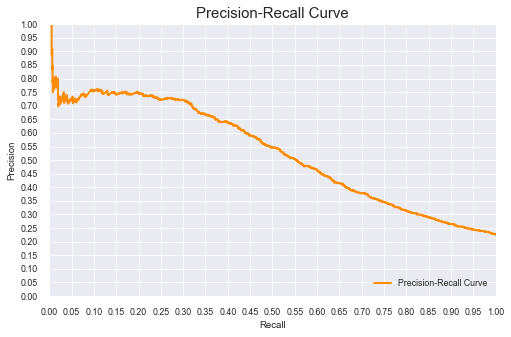

---------------------------------------------------------------------


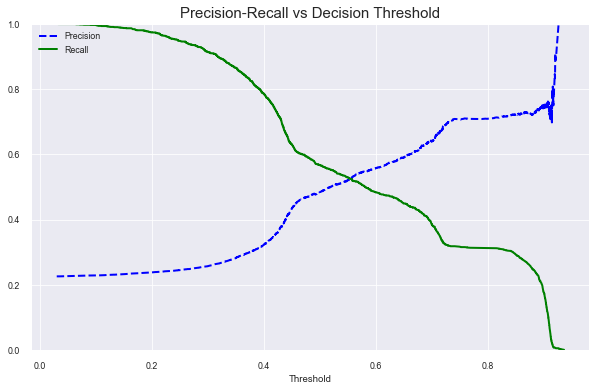

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      5067
           1       0.48      0.57      0.52      1474

    accuracy                           0.77      6541
   macro avg       0.68      0.70      0.68      6541
weighted avg       0.78      0.77      0.77      6541

---------------------------------------------------------------------
Normalized confusion matrix


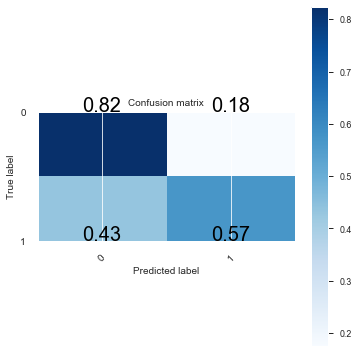

In [74]:
func.run_logistic(X_train_selected, X_test_selected, y_train_rs, y_test)

In [123]:
i = 4
results.name[i] = "pca logreg model A"
results.type[i] = "pca logreg, default hyperparameters"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.77
results.f1_class_1[i] = 0.52
results.precision_recall_auc[i] = 0.53
results.recall[i] = 0.57
results

name                                               type  \
0          logreg model A  logistic, 18 features out of 58, default hyper...   
1          logreg model B  logistic, manually selected features, default ...   
2  logreg gridsearchcv #1                logistic, {'C': 1, 'penalty': 'l1'}   
3  logreg gridsearchcv #3               logistic, {'C': 10, 'penalty': 'l2'}   
4      pca logreg model A                pca logreg, default hyperparameters   
5                     NaN                                                NaN   
6                     NaN                                                NaN   
7                     NaN                                                NaN   
8                     NaN                                                NaN   
9                     NaN                                                NaN   

  baseline f1_weighted f1_class_1 precision_recall_auc recall  
0     0.66        0.75       0.51                 0.52    0.6  
1     0.66         0.8       0.53                 0.52   0.51  
2     0.66        0.75       0.51                 0.52   0.59  
3     0.66        0.75       0.51                 0.52   0.59  
4     0.66        0.77       0.52                 0.53   0.57  
5      NaN         NaN        NaN                  NaN    NaN  
6      NaN         NaN        NaN                  NaN    NaN  
7      NaN         NaN        NaN                  NaN    NaN  
8      NaN         NaN        NaN                  NaN    NaN  
9      NaN         NaN        NaN                  NaN    NaN

#### Findings

Precision-recall AUC is higher by 0.01 but recall is relatively lower than the previous logreg models.

running gridsearch...
done!
---------------------------------------------------------------------
Best Parameters: {'C': 0.25, 'penalty': 'l1'}
---------------------------------------------------------------------
F1 score:  0.5229903034094464
Precision-Recall AUC: 0.5258967995541205


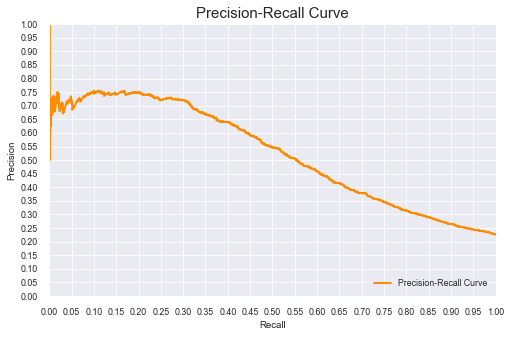

---------------------------------------------------------------------


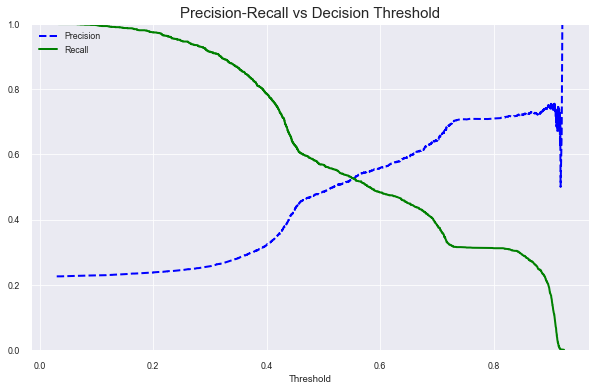

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      5067
           1       0.49      0.57      0.52      1474

    accuracy                           0.77      6541
   macro avg       0.68      0.70      0.68      6541
weighted avg       0.78      0.77      0.77      6541

---------------------------------------------------------------------
Normalized confusion matrix


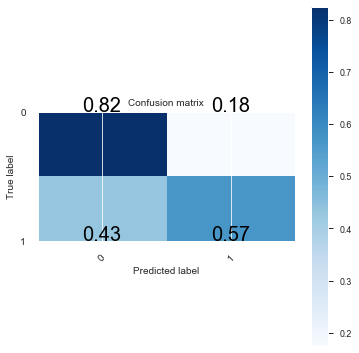

In [75]:
#Create an instance of LogisticRegression
logregGS = LogisticRegression()

#Create hyperparameter options
param_grid = dict(C=[0.1, 0.25, 0.5, 1, 10, 100, 1000, 10000, 100000, 1000000], penalty=['l1', 'l2'])

#Run GridSearchCV
cv_results_top10, best_model = func.run_GridSearchCV(X_train_selected, X_test_selected, y_train_rs, y_test, logregGS, param_grid, scoring = "f1_weighted", cv = 10)

In [76]:
cv_results_top10

rank_test_score                           params  mean_train_score  \
2                 1     {'C': 0.25, 'penalty': 'l1'}          0.681548   
5                 2      {'C': 0.5, 'penalty': 'l2'}          0.681437   
12                3     {'C': 1000, 'penalty': 'l1'}          0.681587   
4                 4      {'C': 0.5, 'penalty': 'l1'}          0.681598   
19                5  {'C': 1000000, 'penalty': 'l2'}          0.681590   
17                5   {'C': 100000, 'penalty': 'l2'}          0.681590   
16                5   {'C': 100000, 'penalty': 'l1'}          0.681586   
15                5    {'C': 10000, 'penalty': 'l2'}          0.681586   
8                 5       {'C': 10, 'penalty': 'l1'}          0.681587   
18                5  {'C': 1000000, 'penalty': 'l1'}          0.681598   

    std_train_score  mean_test_score  std_test_score  
2          0.000552         0.681641        0.005732  
5          0.000587         0.681448        0.005782  
12         0.000674         0.681407        0.005965  
4          0.000683         0.681377        0.005542  
19         0.000674         0.681372        0.006005  
17         0.000674         0.681372        0.006005  
16         0.000676         0.681372        0.006005  
15         0.000674         0.681372        0.006005  
8          0.000676         0.681372        0.006005  
18         0.000674         0.681372        0.006005

In [125]:
i = 5
results.name[i] = "pca logreg gridsearchcv #1"
results.type[i] = "pca logreg {'C': 0.25, 'penalty': 'l1'}"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.77
results.f1_class_1[i] = 0.52
results.precision_recall_auc[i] = 0.53
results.recall[i] = 0.57
results

name  \
0              logreg model A   
1              logreg model B   
2      logreg gridsearchcv #1   
3      logreg gridsearchcv #3   
4          pca logreg model A   
5  pca logreg gridsearchcv #1   
6                         NaN   
7                         NaN   
8                         NaN   
9                         NaN   

                                                type baseline f1_weighted  \
0  logistic, 18 features out of 58, default hyper...     0.66        0.75   
1  logistic, manually selected features, default ...     0.66         0.8   
2                logistic, {'C': 1, 'penalty': 'l1'}     0.66        0.75   
3               logistic, {'C': 10, 'penalty': 'l2'}     0.66        0.75   
4                pca logreg, default hyperparameters     0.66        0.77   
5            pca logreg {'C': 0.25, 'penalty': 'l1'}     0.66        0.77   
6                                                NaN      NaN         NaN   
7                                                NaN      NaN         NaN   
8                                                NaN      NaN         NaN   
9                                                NaN      NaN         NaN   

  f1_class_1 precision_recall_auc recall  
0       0.51                 0.52    0.6  
1       0.53                 0.52   0.51  
2       0.51                 0.52   0.59  
3       0.51                 0.52   0.59  
4       0.52                 0.53   0.57  
5       0.52                 0.53   0.57  
6        NaN                  NaN    NaN  
7        NaN                  NaN    NaN  
8        NaN                  NaN    NaN  
9        NaN                  NaN    NaN

---------------------------------------------------------------------
F1 score:  0.5236158898967783
Precision-Recall AUC: 0.5291779829479953


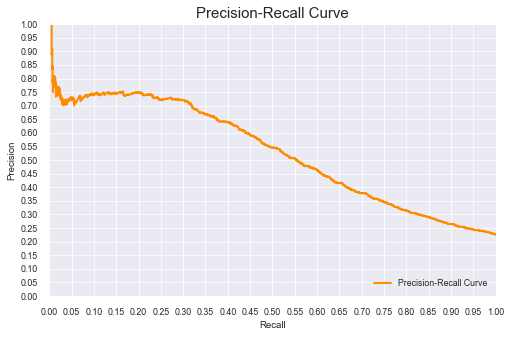

---------------------------------------------------------------------


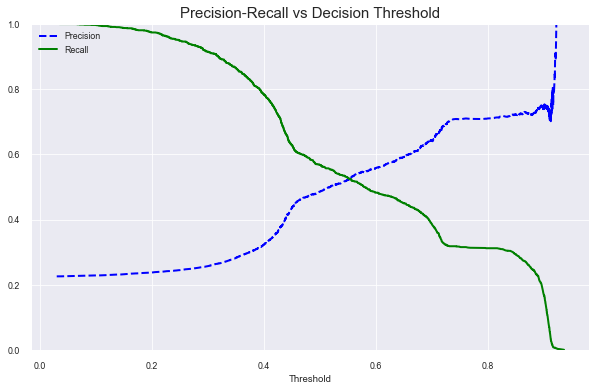

---------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      5067
           1       0.49      0.57      0.52      1474

    accuracy                           0.77      6541
   macro avg       0.68      0.70      0.68      6541
weighted avg       0.78      0.77      0.77      6541

---------------------------------------------------------------------
Normalized confusion matrix


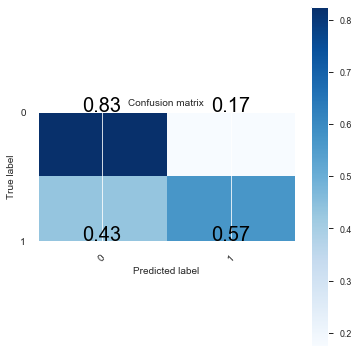

In [77]:
func.run_logistic(X_train_selected, X_test_selected, y_train_rs, y_test, penalty = 'l2', C = 0.5)

In [208]:
i = 6
results.name[i] = "pca logreg gridsearchcv #2"
results.type[i] = "pca logreg {'C': 0.5, 'penalty': 'l2'}"
results.baseline[i] = 0.66
results.f1_weighted[i] = 0.77
results.f1_class_1[i] = 0.52
results.precision_recall_auc[i] = 0.53
results.recall[i] = 0.57
results

name  \
0              logreg model A   
1              logreg model B   
2      logreg gridsearchcv #1   
3      logreg gridsearchcv #3   
4          pca logreg model A   
5  pca logreg gridsearchcv #1   
6  pca logreg gridsearchcv #2   
7                 svc model A   
8         svc gridsearchcv #1   
9         svc gridsearchcv #2   

                                                type baseline f1_weighted  \
0  logistic, 18 features out of 58, default hyper...     0.66        0.75   
1  logistic, manually selected features, default ...     0.66         0.8   
2                logistic, {'C': 1, 'penalty': 'l1'}     0.66        0.75   
3               logistic, {'C': 10, 'penalty': 'l2'}     0.66        0.75   
4                pca logreg, default hyperparameters     0.66        0.77   
5            pca logreg {'C': 0.25, 'penalty': 'l1'}     0.66        0.77   
6             pca logreg {'C': 0.5, 'penalty': 'l2'}     0.66        0.77   
7                svm, hyperparameters set to default      0.7        0.78   
8                           svm {'C': 1, 'gamma': 1}      0.7         0.8   
9                         svm {'C': 0.1, 'gamma': 1}      0.7        0.79   

  f1_class_1 precision_recall_auc recall  
0       0.51                 0.52    0.6  
1       0.53                 0.52   0.51  
2       0.51                 0.52   0.59  
3       0.51                 0.52   0.59  
4       0.52                 0.53   0.57  
5       0.52                 0.53   0.57  
6       0.52                 0.53   0.57  
7       0.51                 0.52   0.52  
8       0.52                 0.51   0.48  
9       0.52                 0.51   0.49

#### Findings

Scores of the above pca logreg models are very similar to the logreg models.

#### Random Forest

Please refer **Mahima's working notebook.ipynb**

#### Conclusion

The best model was Logistic, it yielded a recall of 0.59 and an f1 score of 0.51. Overall none of the models were found to be very good in predicting defaulters or clients to likely to default.

We would need to revisit this project with more samples and features such as:
- income, monthly expenses
- related accounts such as savings, loans, other credit cards
- longer payment history (12 or 24 months)